# Introduction to Algorithm Analysis and Big O

https://nbviewer.jupyter.org/github/jmportilla/Python-for-Algorithms--Data-Structures--and-Interviews/tree/master/

An algorithm is simply a procedure or formula for solving a problem. Some problems are famous enough that the algorithms have names, as well as some procdures being common enough that the algorithm associated with it also has a name.

We can compare algorithms by the time spent:

%timeit function

In [6]:
def sum1(n):
    final_sum = 0
    for x in range(n+1): 
        final_sum += x
    return final_sum

def sum2(n):
    return (n*(n+1))/2

In [7]:
%timeit sum1(4)
%timeit sum2(4)

363 ns ± 4.44 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
99.6 ns ± 0.924 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


But using only timeit is not an objective measurement since it is dependent on hardware. So we should use another method called the <b>Big-O notation</b>.

This Big-O notation is a relative representation of the complexity of an algorithm.

Firstly, we will compare <u>the number of assignments</u> each algorithm makes.

- For sum1(), its variable final_sum will be assigned n+1 times. In other words, it will take n+1 steps. Since its runtime grows linearly with input size, its notation is <b>O(n)</b>.

Big-O notation describes <i>how quickly runtime will grow relative to the input as the input gets arbitrarily large</i>. There are three important points:

1) We want to compare how quickly runtime grows, not compare exact runtimes since those are dependent on hardware.

2) Since we want to compare for a variety of input sizes, we are only concerned with runtime growth RELATIVE to the input. This is why we use <b>n</b> for notation.

3) As n gets arbitrarily large, we only worry about terms that will grow the fastest as n gets large. To this point, Big-O analysis is also known as <b>asymptotic analysis</b>.

And here is a table of common Big-O functions:

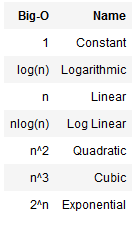

Text(0.5, 0, 'n')

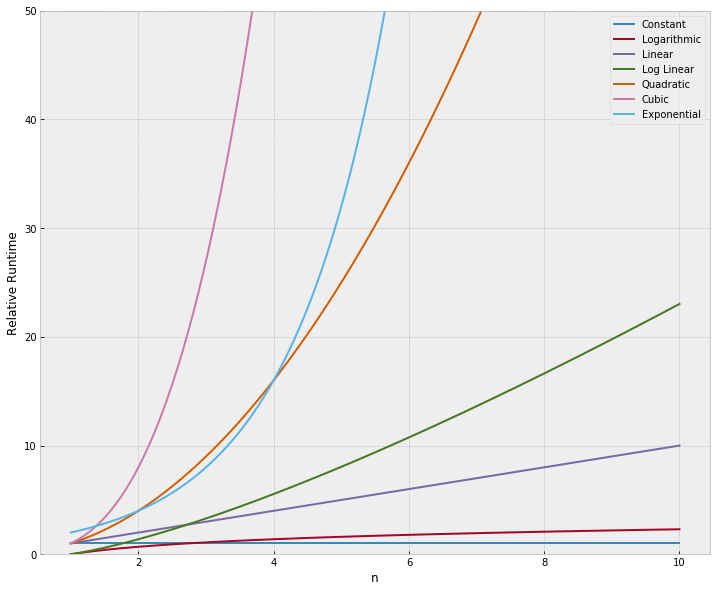

In [8]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

## Big-O Examples

The below are just some examples of Big-O notations.

In [32]:
# O(1) Constant. Runtime will be the same regardless of size of n, since it is just printing the first value from a list. A list of n values will print just 1 item.

def func_constant(values):
    print(values[0])
lst = [1,2,3,4,5,6]
func_constant(lst)

# O(n) Linear. The number of operations scale lienarly with n. A list of n values will print n times.

def func_lin(lst):
    for val in lst:
        print(val)
func_lin(lst)

def func_lin2(lst): # O(2n) but this is actually O(n) as approaching infinity, the constant will be negligible. 2 times infinity is still infinity.
    for val in lst:
        print(val)
    for val in lst:
        print(val)

# O(n^2) Quadratic. With nested loops, for a list of n items, we will have
# to perform n operations for every item in that list. In total, we will
# perform n*n times, which is quadratic. This takes up a lot more resources.

def func_quad(lst):
    for item_1 in lst:
        for item_2 in lst: # a second cursor on first element
            print(item_1, item_2)
lst = [1,2,3]
func_quad(lst)

1
1
2
3
4
5
6
1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


The below is just to show you as n approaches infinity, all constants and multipliers can be dropped.

In [21]:
def comp(lst):
    
    print(lst[0]) # O(1)
    
    ### O(n/2) ... O(1/2 * n), because we are going only until n/2 in the loop.
    midpoint = len(lst)/2
    
    for val in lst[:midpoint]:
        print(val)
    
    ###
    
    for x in range(10): # O(10)
        print('hello world')

lst = [1,2,3,4,5,6,7,8,9,10]

# Therefore, the Big-O = O(1 + n/2 + 10) = O(n) as approaching infinity 
# as constants and fractions disappear.

The below is to remind you that the worst case and best case scenarios may have different Big-O times. In interviews need to remember this. But we usually refer to the worst case scenario (the maximum time / space).

In [26]:
def matcher(lst, match):
    
    for item in lst:
        if item == match:
            return True
    return False

print(matcher(lst, 1), matcher(lst, 11))

# In the above algorithm, there is a "best case" scenario, where the best
# case is if there's a match. The best case is O(1) because you just
# need to check the first element. However if there is no match, you need
# to check all the elements, so O(n).

# Take note that in interviews, usually Big-O means worst case or average case.

True False


Earlier we only mentioned about measuring time. But we can also measure space or memory. This is called <b>space complexity</b> as opposed to earlier's time complexity.

In [33]:
# The below's space complexity is just O(n) as the space scales in terms of n.

def create_list(n):
    new_list = []
    for num in range(n):
        new_list.append('new')
    return new_list

create_list(5)

# For time complexity, it is O(n). For space complexity, since we assign 
# the 'hello world!' variable only once and not every time we print it,
# it is just O(1).

def printer(n):
    for x in range(n):
        print('Hello world!')
printer(5)

Hello world!
Hello world!
Hello world!
Hello world!
Hello world!


## Big O for Python Data Structures

For <b>lists</b>, list indexing and assigning to an index position is just O(1). If you compare using + vs .append() vs list comprehension vs range(), the fastest method is using range().

<table>
<tr>
<th>Operation </th>
<th>Big-O Efficiency</th>
</tr>

<tr>
<td>index []</td>
<td>O(1)</td>
</tr>
<tr>

<td>index assignment</td>
<td>O(1)</td>
</tr>
<tr>
<td>append</td>
<td>O(1)</td>
</tr>
<tr>
<td>pop()</td>
<td>O(1)</td>
</tr>
<tr>
<td>pop(i)</td>
<td>O(n)</td>
</tr>
<tr >
<td>insert(iitem)</td>
<td>O(n)</td>
</tr>
<tr>
<td>del operator</td>
<td>O(n)</td>
</tr>
<tr>
<td>iteration</td>
<td>O(n)</td>
</tr>
<tr>
<td>contains (in)</td>
<td>O(n)</td>
</tr>
<tr>
<td>get slice [x:y]</td>
<td>O(k)</td>
<tr>
<tr>
<td>del slice</td>
<td>O(n)</td>
</tr>
<tr>
<td>set slice</td>
<td>O(n+k)</td>
</tr>
<tr>
<td>reverse</td>
<td>O(n)</td>
</tr>
<tr>
<td>concatenate</td>
<td>O(k)</td>
</tr>
<tr>
<td>sort</td>
<td>O(n log n)</td>
</tr>
<tr>
<td>multiply</td>
<td>O(nk)</td>
</tr>
<table>



For <b>dictionaries</b> which are just hash tables, operate with keys and values.

<table border=\1\>
    <thead valign=\bottom\>
    <tr class=\row-odd\><th class=\head\>Operation</th>
    <th class=\head\>Big-O Efficiency</th>
    </tr>
    </thead>
    <tbody valign=\top\>
    <tr class=\row-even\><td>copy</td>
    <td>O(n)</td>
    </tr>
    <tr class=\row-odd\><td>get item</td>
    <td>O(1)</td>
    </tr>
    <tr class=\row-even\><td>set item</td>
    <td>O(1)</td>
    </tr>
    <tr class=\row-odd\><td>delete item</td>
    <td>O(1)</td>
    </tr>
    <tr class=\row-even\><td>contains (in)</td>
    <td>O(1)</td>
    </tr>
    <tr class=\row-odd\><td>iteration</td>
    <td>O(n)</td>
    </tr>
    </tbody>
    </table>

That is the end for now. But do check https://www.bigocheatsheet.com/ for more info!
    
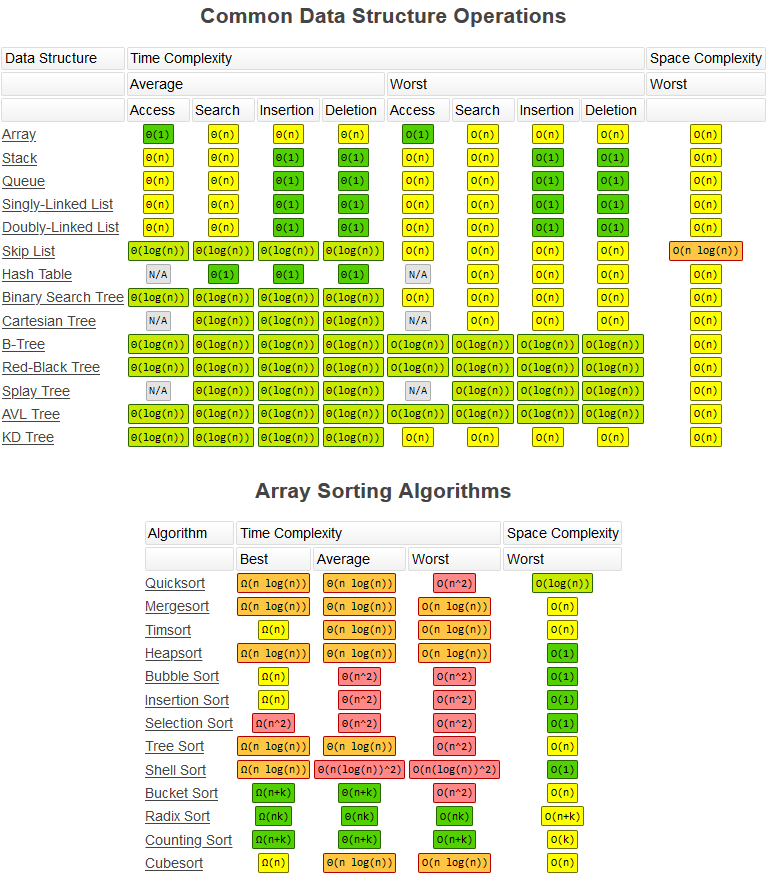

# Array Sequences

In Python, an array is a sequence. It includes lists [1,2,3], tuples (1,2,3), and string '123'. All support indexing.

## Low-Level Arrays

We must first learn the basics of <b>low-level computer architecture</b>. The memory of a computer is stored in bits, where 8 bits is a <b>byte</b>, and this is the typical unit. 

To keep track of what information is stored in which byte, the computer uses an abstraction known as a <b>memory address</b>. This means each byte of memory is associated with a unique address. For example, there can be Byte #2144 that stores something and Byte #2147 that stores another.

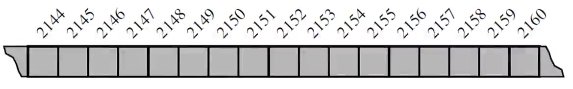

In theory, the computer hardware is designed so any byte can be accessed efficiently and equally - this implies random access memory (RAM). Each individual byte of memory can be stored or retrieved in O(1) time / constant.

A programming language keeps track of the association between an identifier and the memory address. Furthermore, if the data can be grouped to point to one identifier, that is better. Basically this is saying each variable points to one memory address, and each variable can store one or many info. When such a group of related variables are stored into such a representation, it is an <b>array</b>. For example, a text string is stored as an ordered sequence of individual characters. On a side note, Python internally represents each Unicode character with 16 bits = 2 bytes.

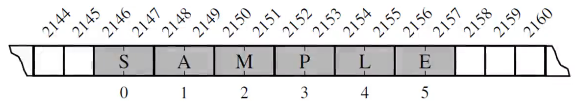

The above is an array of 6 characters, with each location within an array is a cell, and the integer index describes its location. Thus, the cell of the array at index 4 is 'L', and is stored in bytes #2154 and #2155 of memory.

One thing important to note is that <b><u>each cell of an array must use the same number of bytes</b></u>. This allows any randomly chosen cell to be <u>accessed in constant time</u> based on its index. So if you know the starting memory address and the number of bytes per element (here is 2 bytes per unicode char) and the desired index within the array, then the appropriate memory address can be computed using something like <b>start + (cellsize)(index)</b>. For example, cell 4 begins at 2146 + 2 * 4 = 2154. Take note that in interviews, we won't really care about these bytes stuff. We just care about indices.

But let's move on to <b>referential arrays</b>.

Imagine you want to store 100 student names with ID numbers. But remember that each cell of the array needs to have the same number of bytes, despite each name having different lengths. Instead of wasting space in setting max possible length cells, we can use an array of object <b>References</b>.

<div>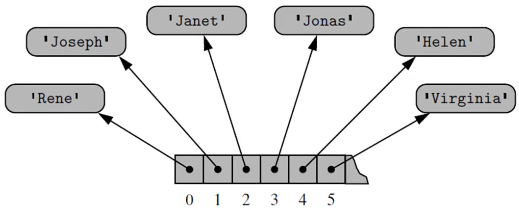</div>

Basically, each element is a <b>reference</b> to the object. Index 0 references object string 'Rene' etc., so we have now a list of names where the index is referencing an object. Although the relative size of the individual elements may vary, the number of bits used to store the memory address of each element is fixed. This way, O(1). Used in lists or tuples.

A single list instance may include multiple references to the same object as elements of the list, and it is possible for a single object to be an element of two or more lists, ie we can have two lists storing references back to the same object. For example when you slice a list, the result is a new list instance, but that new list actually has references to the same elements that are in the original list.

<div>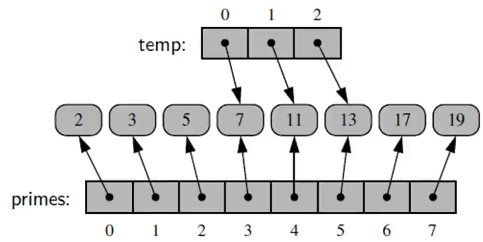</div>

Even if you do reassignment, since the elements of the list (integers) are immutable objects, then all is simpler. With the new reassignment below, you are just changing the existing reference and you are not changing the integer object, aka you are not changing the "13", but rather pointing the index to another object "15".

<div>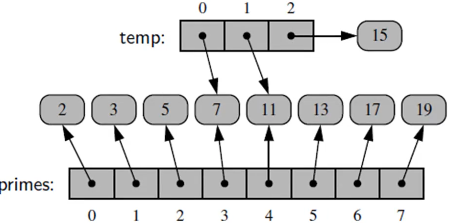</div>

Basically, the point of the lesson is that for lists, when you copy a list, you are merely just making <b>shallow copies</b> that reference the same elements as the original list. However, if the contents of the list were of a mutable type (you are referencing a list of lists), a <b>deep copy</b> (a new list with NEW elements) can be produced by using the deepcopy function from the copy module.

Let us show another example. If counters = [0] * 8, then all eight cells reference the same object! This is especially so since the referenced integer is immutable. So even if you do counters[2] += 1, you do not technically change that value of the existing integer instance; you are just computing a new integer with value 0 + 1 and then set cell number two to reference the newly computed value.

<div>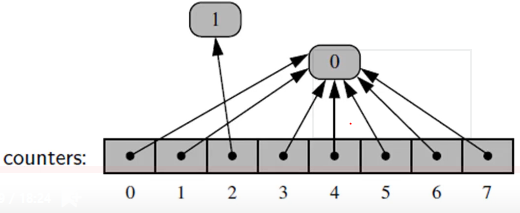</div>

The main takeaway is that <b>when making copies, you may just be making new copies of the references but not new objects themselves</b>.

Let's reiterate again. If for example you use primes.extend(extras), the extended list does not receive copies of those elements, instead it is receiving the references to those elements. Therefore, you can have multiple lists with multiple cells, but all referencing the same object.

<div>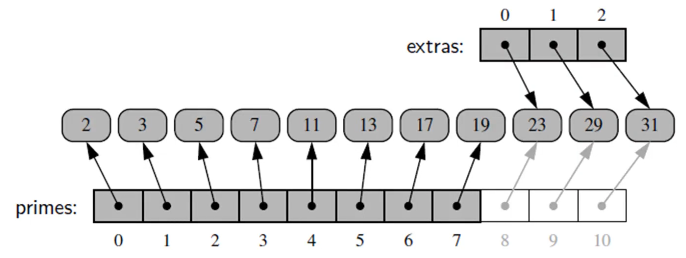</div>

## Dynamic Arrays

In Python, you don't have to initially state out the size of your arrays - they are dynamic. Inside, what actually happens is that when you create a list, it actually has a far greater capacity to hold more elements than initialised with. But if you keep adding to it, eventually that extra space will run out. Python will then update the max memory size when a jump is required.

In [9]:
import sys

n = 10
data = []

for i in range(n):
    a = len(data) # number of elements
    b = sys.getsizeof(data) # actual size in bytes
    print(f'Length: {a: 3d}; Size in bytes: {b:4d}')
    data.append(n) # increase length by 1

Length:   0; Size in bytes:   64
Length:   1; Size in bytes:   96
Length:   2; Size in bytes:   96
Length:   3; Size in bytes:   96
Length:   4; Size in bytes:   96
Length:   5; Size in bytes:  128
Length:   6; Size in bytes:  128
Length:   7; Size in bytes:  128
Length:   8; Size in bytes:  128
Length:   9; Size in bytes:  192


For starters, we need to understand the theory of implementing a dynamic array. You can refer to the below picture. Note that the common rule when choosing the size of B is to be double that of A. The math will be shown later.

<div>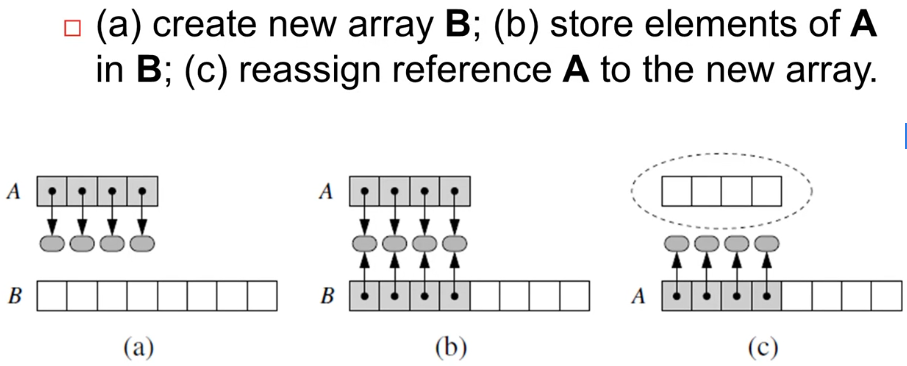</div>

### Dynamic Array Exercise

In this exercise, we wil create our own Dynamic Array class. We will be using a built-in library called <b>ctypes</b>, where basically it is used here as a raw array holder.

Note: remember that for public vs private methods, we use an underscore _ before the method name to keep it non-public. For example:

In [1]:
class M(object):
    def public(self):
        print("Use Tab to see me!")
    def _private(self):
        print("You won't be able to Tab to see me!")

#### Quick Sidetrack on Underscores in Python OOP

https://dbader.org/blog/meaning-of-underscores-in-python

Take note that in Python:

- Names with a leading underscore are simply to indicate to other programmers that the attribute or method is intended to be private. It is merely a convention and nothing is done to the name. When someone does <u>"from M import *" (wildcard imports)</u>, such objects are not imported (unless the module defines an __all__ list that overrides this behaviour). Note that regular imports (import my_module) are not affected by the single underscore naming convention - aka not private. In any case, the single leading underscore is to prevent users from being able to call them.
<br><br>
- Names with two leading underscores (and max one trailing underscore) have real meaning: they are replaced with _classname__foo as a way to ensure that the name will not overlap with a similar name in another class. The technical term is <b>name mangling</b> to prevent accidental access. It protects the variable from getting overridden in subclasses.
<br><br>
- Names with two leading AND trailing underscores are reserved for built-in methods or variables. This is a method that Python is meant to call, not you. These are <b>magic methods</b>.

In [4]:
import ctypes

class DynamicArray(object):
    
    '''
    DYNAMIC ARRAY CLASS (similar to Python List)
    '''
    
    def __init__(self):
        self.n = 0 # count of actual elements
        self.capacity = 1 # to accept 1 element only by default
        self.A = self.make_array(self.capacity) # see below
        
    def __len__(self):
        return self.n
    
    def __getitem__(self,k): # return elements at index k
        if not 0 <= k < self.n: # if k is not between 0 and count
            return IndexError('K is out of bounds!')
        return self.A[k]
    
    def append(self,ele):
        if self.n == self.capacity:
            self._resize(2*self.capacity) # 2x if capacity not enough
        self.A[self.n] = ele
        self.n += 1
        
    def _resize(self, new_cap): # where new_cap = 2 * self.capacity
        B = self.make_array(new_cap)
        for k in range(self.n):
            B[k] = self.A[k]
        self.A = B
        self.capacity = new_cap
    
    def make_array(self, new_cap):
        return (new_cap*ctypes.py_object)() # don't worry what this does lol

In [33]:
arr = DynamicArray()
print(len(arr))

arr.append(1)
print(len(arr))

arr.append(2)
print(len(arr))

print(arr[0], arr[1], arr[2])
###################################

from ctypes import sizeof
arr = DynamicArray()
n = 10
for i in range(n):
    a = len(arr) # number of elements
    b = ctypes.sizeof(arr.A) # actual size in bytes
    print(f'Length: {a: 3d}; Size in bytes: {b:4d}')
    arr.append(n) # increase length by 1

0
1
2
1 2 K is out of bounds!
Length:   0; Size in bytes:    8
Length:   1; Size in bytes:    8
Length:   2; Size in bytes:   16
Length:   3; Size in bytes:   32
Length:   4; Size in bytes:   32
Length:   5; Size in bytes:   64
Length:   6; Size in bytes:   64
Length:   7; Size in bytes:   64
Length:   8; Size in bytes:   64
Length:   9; Size in bytes:  128


### Amortisation

For this section, we want to deal with <b>amortised analysis</b> of dynamic arrays.

The above method of replacing an array with a new larger array might at first seem slow because a single append operation may require O(n) time to perform. Our new array allows us to add n new elements before the array must be replaced again.

Hence, we want to use an algorithmic design pattern called <b>amortisation</b> to show that performing a sequence of such operations on a dynamic array is actually quite efficient.

<div>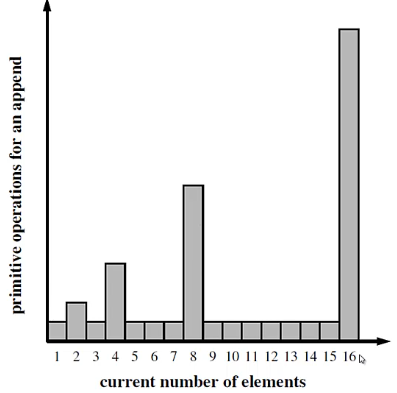</div>

From the image, you can see that append is usually O(1). But when we need to double the capacity, it will be O(n).

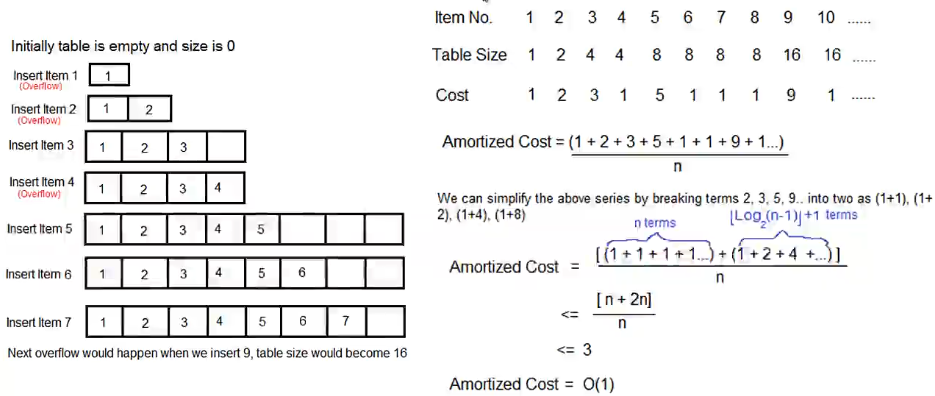

Note that <b>overflow</b> means to fill the array fully. In summary, this just means as the array gets larger, the entire complexity would be O(1). For more details, check out http://www.cs.cmu.edu/afs/cs/academic/class/15451-s10/www/lectures/lect0203.pdf.

## Arrays Interview 1: Anagram Check

Given two strings, check to see if they are anagrams. An anagram is when the two strings can be written using the same exact letters (so you can just rearrange the letters ot get a different phrase or word).

For example:

>"public relations" is an anagram of "crap built on lies"<br>
>"clint eastwood" is an anagram of "old west action"

**Note: ignore spaces and capitalisation. So "d go" is an anagram of "God", "dog", and "o d g".**

### Solution

There are 2 ways to think about this problem.

Firstly, if 2 strings have the same frequency of letters / elements, meaning each shows up the same number of times in both strings, then they are anagrams of each other. Hence, if two strings are equal to each other once they are sorted, then they are also anagrams of each other.

In [38]:
def anagram(s1,s2):
    # cannot use strip here as strip only operates on both ends
    s1 = s1.replace(' ', '').lower()
    s2 = s2.replace(' ', '').lower()
    return sorted(s1) == sorted(s2)

In [40]:
print(anagram('dog', 'god'),
anagram('clint eastwood', 'old west action'),
anagram('aa', 'bb'))

True True False


Secondly, in interview settings, they are more likely to test your understanding of hash tables.

In [43]:
def anagram2(s1,s2):
    s1 = s1.replace(' ', '').lower()
    s2 = s2.replace(' ', '').lower()
    
    # Edge Case Check (do they have same no. of letters?)
    if len(s1) != len(s2):
        return False
    
    # Actual Solution
    count = {}
    
    for letter in s1:
        if letter in count:
            count[letter] += 1
        else:
            count[letter] = 1
    
    for letter in s2:
        if letter in count:
            count[letter] -= 1
        else:
            count[letter] = 1 
            
    for k in count:
        if count[k] != 0:
            return False
        
    return True

In [44]:
print(anagram('dog', 'god'),
anagram('clint eastwood', 'old west action'),
anagram('aa', 'bb'))

True True False


## Arrays Interview 2: Array Pair Sum

Given an integer array, output all the **_unique_** pairs that sum up to a specific value k.

Hence, the input:

```
pair_sum([1,3,2,2], 4)
```

would return 2 pairs:

```
(1,3)
(2,2)
```

### Solution

The O(n) algorithm uses the set data structure. We perform a linear pass from the beginning and for each element, we check if k-element _(read: k minus element)_ is in the set of seen numbers. If it is, then we found a pair of sum k and add it to the output. If not, this element does not belong to a pair yet, and we add it to the set of seen elements.

The algorithm is really simple once we figure out using a set. The complexity is O(n) because we do a single linear scan of the array, and for each element we just check whether the corresponding number to form a pair is in the set or add the current element to the set. Insert and find operations of a set are both average O(1), so the algorithm is O(n) in total.

In [53]:
def pair_sum(arr, k):
    
    # Edge Case Check
    if len(arr) < 2:
        return
    
    # Sets for Tracking
    ## note that using a set for tracking is really good at converting
    ## problems that are O(n^2) to just O(n). Good interview method.
    seen = set()
    output = set()
    
    for num in arr:
        target = k - num
        if target not in seen:
            seen.add(num)
        else:
            output.add((min(num,target), max(num,target)))
            
    #return len(output), output
    print('\n'.join(map(str,list(output)))) # take the output and convert into a list, then mapping the str function to every element in that list, and then joining them with new lines in between
    

In [58]:
pair_sum([1,3,2,2],4)

(1, 3)
(2, 2)


## Arrays Interview 3: Missing Element

Consider an array of non-negative integers. A second array is formed by shuffling the elements of the first array and deleting a random element. Given these two arrays, find which element is missing in the second array.

Here is an example input. The first array is shuffled and the number 5 is removed to construct the second array.

Input:
```
finder([1,2,3,4,5,6,7],[3,7,2,1,4,6])
```
Output:
```
5 is the missing number
```

### Solution

The naive solution is to go through every element in the second array and check if it appears in the first array. note that there may be duplicate elements in the arrays so we should pay attention to it. The complexity of this approach is O(N^2), since we would need two for loops.

A more efficient is to sort the first array, so while checking whether an element in the first array appears in the second, we can do binary search. But we should still be careful about duplicate elements. The complexity is O(NlogN).

If we don't want to deal with the special case of duplicate numbers we can sort both arrays and iterate over them simultaneously. Once two iterators have different values we can stop. The value of the first iterator is the missing element. This solution is also O(NlogN). Here is the solution for this approach:

In [65]:
def finder(arr1, arr2):
    
    arr1.sort()
    arr2.sort()
    
    for num1, num2 in zip(arr1, arr2):
        if num1 != num2:
            return num1
        
    return arr1[-1] # remember arr1 is the longer one. zip() will only do until the max length of the shorter array.

In [66]:
tuple(zip([1,2,3],[4,5,6])) # to demonstrate zip

((1, 4), (2, 5), (3, 6))

In [67]:
arr1 = [1,2,3,4,5,6,7]
arr2 = [3,7,2,1,4,6]
finder(arr1,arr2)

5

Alternatively, you can use hash tables to solve it. Note that **defaultdict** from the **collections** module is just a dictionary in Python where if the key isn't already in the dictionary, it will automatically add it for you.

In [68]:
import collections

def finder2(arr1, arr2):
    
    d = collections.defaultdict(int) # d uses defaultdict that only accepts integers. All this does is if key doesn't exist, it will not throw up an error, but just add to it.
    
    for num in arr2:
        d[num] += 1
    
    for num in arr1:
        if d[num] == 0:
            return num
        else:
            d[num] -= 1

In [69]:
arr1 = [1,2,3,4,5,6,7]
arr2 = [3,7,2,1,4,6]
finder2(arr1,arr2)

5

There are other interesting methods too to solve this question. We can **sum both arrays and take the difference** - that is the missing value. But this method can be problematic if arrays are too long or the numbers very large. You can end up getting an overflow when summing up the numbers or if the numbers are really small and have a ton of decimal places, you may lose some information.

A clever trick approach that achieves a linear time in constant space complexity without any problem. We initialise a variable to 0 and then do an exclusive-or (XOR) of every element in the first and second arrays with that variable.

XOR means give a 1 if both inputs are different. Hence, 00 and 11 both give 0, but 01 and 10 both give a 1.

Therefore, the XOR approach would highlight where two elements differ.

In [78]:
def finder3(arr1,arr2):
    
    result = 0
    
    for num in arr1+arr2:
        result ^= num
        print(result)
        
    return result

In [81]:
arr1 = [1,2,3,4,5,6,7]
arr2 = [3,7,2,1,4,6]
finder3(arr1,arr2)

1
3
0
4
1
7
0
3
4
6
7
3
5


5

## Arrays Interview 4: Largest Continuous Sum

Given an array of integers (positive and negative), find the largest continuous sum. Also report back the start and end points of the sum.

### Solution

If the array is all positive, then the result is simply the sum of all numbers. The negative numbers in the array will cause us to begin checking sequences.

The algorithm is, we start summing up the numbers and store in a current sum variable. After adding each element, we check whether the current sum is larger than maximum sum encountered so far. If it is, we update the maximum sum. As long as the current sum is positive, we keep adding the numbers. When the current sum becomes negative, we start with a new current sum, because a negative current sum will only decrease the sum of a future sequence. Note that we don't reset the current sum to 0 because the array can contain all negative integers. Then the result would be the largest negative number (most positive).

In [8]:
word = "happy"
for char in range(len(word)-1,-200,-1):
    print(word[char])

y
p
p
a
h
y
p
p
a
h


IndexError: string index out of range

In [29]:
def large_cont_sum(arr):
    
    if len(arr) == 0:
        return 0
    
    max_sum = current_sum = arr[0]
    
    for num in arr[1:]: # for all the numbers after the first one
        current_sum = max(current_sum + num, num)
        max_sum = max(current_sum, max_sum)
        print(current_sum, max_sum)
        
    return max_sum

In [30]:
large_cont_sum([1,2,-1,3,4,10,10,-10,-1])

3 3
2 3
5 5
9 9
19 19
29 29
19 29
18 29


29

In [31]:
large_cont_sum([-300,400,20,-6000,8000,-250,600,-1000,10000])

400 400
420 420
-5580 420
8000 8000
7750 8000
8350 8350
7350 8350
17350 17350


17350

## Arrays Interview 5: Sentence Reversal

Given a string of words, reverse all the words. For example:

```
'This is the best'
'best the is This'
```

For this exercise, you should remove all leading and trailing whitespace.

### Solution

Can use Python's **split()** and some slicing, or use **reversed**:

In [36]:
def rev_word1(s):
    return " ".join(reversed(s.split()))
    
# OR

def rev_word2(s):
    return " ".join(s.split()[::-1])

In [42]:
print(rev_word1('Hi John,     are you ready to    go?'))
print(rev_word2('Hi John,     are you ready to    go?'))

go? to ready you are John, Hi
go? to ready you are John, Hi


While these are valid solutions, in an interview setting you'll have to work out the basic algorithm that is used. In this case what we want to do is loop over the text and extract words from the string ourselves. Then we can push the words to a "stack" and then reverse all.

In [47]:
def rev_word3(s):
    
    words = []
    length = len(s)
    spaces = [' ']
    
    i = 0
    
    while i < length:
        if s[i] not in spaces: # or if s[i] != spaces. If it is letter, execute below. If it is a space, skip.
            word_start = i
            while i < length and s[i] not in spaces:
                i += 1
            words.append(s[word_start:i])
            
        i += 1
    
    return " ".join(reversed(words))

In [46]:
print(rev_word3('     Hi John,     are you ready to    go?'))

go? to ready you are John, Hi


## Arrays Interview 6: String Compression

Given a string in the form 'AAAABBBBCCCCCDDEEEE' compress it to become 'A4B4C5D2E4'. For this problem, you can falsely "compress" strings of single or double betters, i.e. 'AAB' can return as 'A2B1' even though this technically takes more space.

The function should also be case-sensitive, so that 'AAAAaaa' returns 'A3a3'.

### Solution

Since Python strings are immutable, we'll need to work off of a list of characters, and at the end convert that list back into a string with a join statement.

The solution below should yield us with a Time and Space complexity of O(n). It is also known as **compression without checking**, or **run length compression algorithm**. Let's take a look with careful attention to the explanatory comments:

In [71]:
def compress(s):
    
    r = "" # r for run
    l = len(s)
    
    # Edge Cases
    if l == 0:
        return ""
    
    if l == 1:
        return s+"1"
    
    # Actual
    
    last = s[0]
    cnt = 1
    i = 1
    
    while i < l:
        if s[i] == s[i-1]: # if the letter is same as the one before it
            cnt += 1
        else:
            r = r + s[i-1] + str(cnt)
            cnt = 1
        i += 1
    
    r = r + s[i-1] + str(cnt)
    
    return r

In [72]:
print(f'{compress("AABCCCC")} \n{compress("AAAAaaaAAaaBBBb....bCCCccZX")}')

A2B1C4 
A4a3A2a2B3b1.4b1C3c2Z1X1


## Arrays Interview 7: Unique Characters in String

Given a string, determine if it is comprised of all unique characters. For example, 'abcde' returns True while 'aabcde' should return False.

In [105]:
# Set Method
def uni_char(s):
    return len(set(s)) == len(s)

In [106]:
uni_char('abcdea')

False

In [111]:
def uni_char2(s):
    char = set()
    
    for let in s:
        if let in char:
            return False
        else:
            char.add(let)
    
    return True

In [112]:
uni_char2('abcdea')

False

# Stacks, Queues, and Deques

These are linear structures that are similar to arrays, but each of these structures differ by how it adds and removes items.

## Stacks

A **stack** is an ordered collection of items where the addition of new items and the removal of existing items always take place at the same end. This end is usually called the **"top"**, while the opposite end is the **"base"**. Think of it as a stack of books on a table.

The base of the stack is significant since items stored in the stack that are closer to the base represent those that have been in the stack the longest. The most recently added item is the one that is in position to be removed first. This follows the **LIFO** method, which provides an ordering based on length of time in the collection: newer items are near the top while older items are near the base.

<div>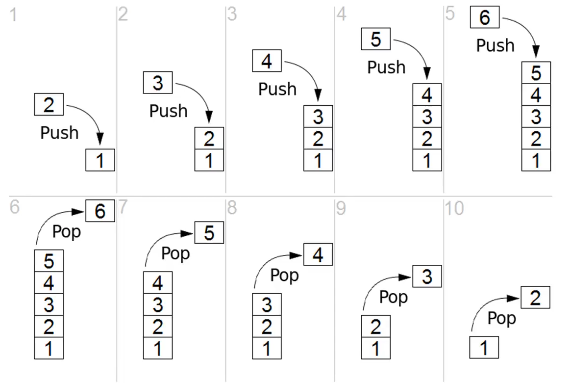</div>

Hence, the first items **pushed** to the stack begin at the base, and last items are **popped** out. Stacks are fundamentally important as they can be used to reverse the order of items. The order of insertion is the reverse of the order of removal.

Application: when you navigate from web page to web page, those pages are placed on a stack (the URLs are going on the stack). The current page that you are viewing is on the top and the first page you looked at is at the base. If you click on the Back button, you begin to move in reverse order through the pages.

<ins>Some Attributes</ins>
- Stack() creates a new empty instance.
- push(item) adds a new item on top. Returns nothing.
- pop() removes the top item. Returns the item. Stack is modified.
- peek() returns top item but not remove it. Stack not modified.
- isEmpty() tests if it is empty. Returns boolean.
- size() returns no. of items. Returns integer.

In [132]:
class Stack(object):
    
    def __init__(self):
        self.items = []
        
    def isEmpty(self):
        return self.items == []
    
    def push(self,item):
        self.items.append(item)
        
    def pop(self):
        return self.items.pop()
    
    def peek(self):
#         return self.items[len(self.items)-1]
        return self.items[-1]
    
    def size(self):
        return len(self.items)

In [134]:
s = Stack()

print(s.isEmpty())

s.push(1)
s.push('two')

print(s.peek())

s.push(True)

print(s.size())
print(s.isEmpty())

print(s.pop(), s.peek())
print(s.pop(), s.peek())
print(s.pop())
print(s.isEmpty())
print(s.items)

True
two
3
False
True two
two 1
1
True
[]


## Queues

A **queue** is an ordered collection of items where the addition of new items happens at one end called the **"rear"** and the removal of existing items occurs at the other end called the **"front"**. As an element enters the queue, it starts at the rear and makes its way toward the front, waiting until that time when it is the next element to be removed. This follows the **FIFO** method.

<div>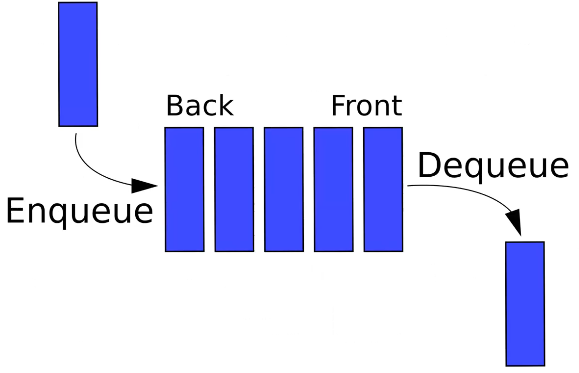</div>

**Enqueue** means adding a new item to the rear of the queue, while **dequeue** means removing the front item from the queue.

<div>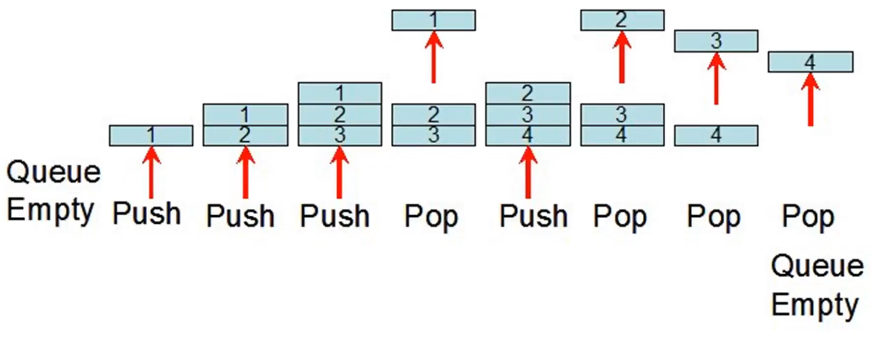</div>

<ins>Some Attributes</ins>
- Queue() creates an empty queue.
- enqueue(item) adds new item to rear of queue. 
- dequeue() removes front item from queue. Returns item. Queue is modified.
- isEmpty() tests if empty. Returns boolean.
- size() returns no. of items. Returns integer.

In [135]:
class Queue(object):
    
    def __init__(self):
        self.items = []
        
    def isEmpty(self):
        return self.items == []
    
    def enqueue(self,item):
        self.items.insert(0, item) # index, item
        
    def dequeue(self):
        return self.items.pop()
    
    def size(self):
        return len(self.items)

In [146]:
q = Queue()

print(q.size(), q.isEmpty())

q.enqueue(1)
q.enqueue(2)
print(q.dequeue())
print(q.items)

0 True
1
[2]


## Deques

A **deque** is a double-ended queue, where it is an ordered collection of items similar to the queue. It has two ends, a front and a rear, and the items remain positioned in the collection. The difference is that new items can be added to either the front or the rear, and removal can be done at either ends as well.

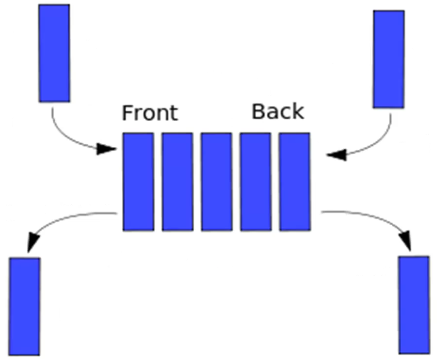

<ins>Some Attributes</ins>
- Deque() creates an empty deque.
- addFront(item) adds item at front.
- addRear(item) adds it at the rear.
- removeFront() is pops at the front. Deque is modified.
- removeRear() pops at the end. Deque is modified.
- isEmpty() checks if empty.
- size() gets the size.

In [147]:
class Deque(object):
    
    def __init__(self):
        self.items = []
        
    def isEmpty(self):
        return self.items == []
    
    def addFront(self, item): # we shall call the Front as the end
        self.items.append(item)
        
    def addRear(self, item):
        self.items.insert(0, item)
        
    def removeFront(self):
        return self.items.pop()
    
    def removeRear(self):
        return self.items.pop(0)
    
    def size(self):
        return len(self.items)

In [150]:
d = Deque()

d.addFront('hello')
d.addRear('world')

print(d.size())
print(d.removeFront() + ' ' + d.removeRear())
print(d.size(), d.isEmpty())

2
hello world
0 True


## SQD Interview 1: Implement a Stack

A very common interview question is to begin by just implementing a Stack. Should have the methods:
- Check if empty
- Push a new item
- Pop an item
- Peek at top item
- Return the size

## SQD Interview 2: Implement a Queue

Another very common question. Should be able to:
- Check if Queue is empty
- Enqueue
- Dequeue
- Return size of the Queue

## SQD Interview 3: Implement a Deque

Should be able to:
- Check if empty
- Add to both front and rear
- Remove from Front and Rear
- Check size

## SQD Interview 4: Balanced Parentheses Check

Given a string of opening and closing parentheses, check whether it is balanced. We have 3 types of parentheses: round brackets (), square brackets [], and curly brackets {}. Assume that the string doesn't contain other characters, no spaces nor words or numbers. As a reminder, a balanced parentheses require every opening parenthesis to be closed in the reverse order opened, i.e. ([]) is balanced but ([)] is not. AKA inside every bracket-pair must have matched pairs.

Assume the input has no spaces.

### Solution

This is a very common interview question and is one of the main ways to check your knowledge of using Stacks! We will start our solution logic as such:

First we will scan the string from left to right, and every time we see an opening parenthesis we push it to a stack, because we want the last opening parenthesis to be closed first. (Remember the FILO structure of a stack!)

Then, when we see a closing parenthesis we check whether the last opened one is the corresponding closing match, by popping an element from the stack. If it’s a valid match, then we proceed forward, if not return false.

Or if the stack is empty we also return false, because there’s no opening parenthesis associated with this closing one. In the end, we also check whether the stack is empty. If so, we return true, otherwise return false because there were some opened parenthesis that were not closed.

Here's an example solution:

In [191]:
def balance_check(s):
    
    if len(s)%2 != 0 or len(s) == 0:
        return False # if length is not even, then definitely false
    
    opening = set('([{') # set of opening brackets
    matches = set([  ('(',')'),   ('[',']'),   ('{','}')  ]) # matching pairs
    stack = []
    
    for paren in s:
        if paren in opening:
            stack.append(paren)
       
        else:
            if len(stack) == 0: # check if got parentheses in stack
                return False
            
            last_open = stack.pop()
            
            if (last_open,paren) not in matches:
                return False
    
    return len(stack) == 0

In [192]:
set('([{')
set([  ('(',')'),   ('[',']'),   ('{','}')   ])

{('(', ')'), ('[', ']'), ('{', '}')}

In [193]:
print(
balance_check('[]'), # True
balance_check('[](){([[[]]])}'), # True
balance_check('()(){]}'), # False
balance_check('[](){([[[]]])}('), # False
balance_check('[{{{(())}}}]((()))'), # True
balance_check('[[[]])]'), # False
balance_check(' '), # False
balance_check('')) # False

True True False False True False False False


## SQD Interview 5: Implement a Queue with Two Stacks

Given the Stack class below, implement a Queue class using two stacks. This is a "classic" interview problem. Use a Python list data structure as your Stack.

### Solution

The key insight is that a stack reverses order (while a queue doesn't). A sequence of elements pushed on a stack comes back in reversed order when popped. Consequently, two stacks chained together will return elements in the same order, since reversed order reversed again is original order.

We use an in-stack that we fill when an element is enqueued and the dequeue operation takes elements from an out-stack. If the out-stack is empty we pop all elements from the in-stack and push them onto the out-stack.

In [196]:
class Queue2Stacks(object):
    
    def __init__(self):
        # Use lists instead of your own Stack class.
        self.instack = []
        self.outstack = []

    def enqueue(self,element):
        self.instack.append(element)
        
    def dequeue(self):
        if not self.outstack: # if outstack empty (not-False = True)
            while self.instack: # execute if instack has things
                self.outstack.append(self.instack.pop()) # pop ALL elements since we use "while"
        return self.outstack.pop()

In [199]:
q = Queue2Stacks()

for i in range(5):
    q.enqueue(i)
    
for i in range(5):
    print(q.dequeue()) # should come out in order 01234

0
1
2
3
4


# Linked Lists

## Singly Linked Lists

A **singly linked list** is in its simplest form, a collection of **nodes** that collectively form a linear sequence. Each node stores a reference to an object that is an element of the sequence, as well as a reference to the next node of the list also called a **pointer**.

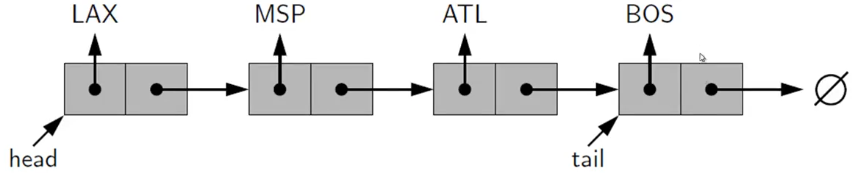

_Each of those two squares is a **node**. Each node contains a data field and a reference / link to the next node. The words are just USA airport names._

The list instance maintains a member named **head** that identifies the first node of the list. In some applications, another member named **tail** identifies the last node of the list. The tail is identified as such because it points to **None** as its next reference. 

This process is commonly known as **traversing** the linked list. Because the next reference of a node can be viewed as a **link** or **pointer** to another node, the process of traversing a list is also known as **link hopping** or **pointer hopping**. We will just call it "traversing".

Each node is represented as a unique object, with that instance storing a reference to its element and da reference to the next node (or None).

### Inserting an Element at the Head

An important property of a linked list is that it does not have a predetermined fixed size. It uses space proportionally to its current number of elements. 

To insert a new element at the head of the list:
- We create a new node
- Set its element to the new element
- Set its next link to refer to the current head
- Then set the list's head to point to the new node

### Inserting an Element at the Tail

- Create a new node
- Assign its next reference to None
- Set the next reference of the old tail node to point to this new node
- Update the tail reference itself to this new node

### Removing an Element at the Head

This is just the opposite of inserting one so.

- Link out the old head.
- Set list's head to point to the new head node.

### Removing an Element at the Tail

We cannot easily delete the last node of a singly linked list. Even if we maintain a tail reference directly to the last node of the list, we must be able to access the node _before_ the last node in order to remove the last node. But we cannot reach the node before the tail by following next links from the tail. If we want to support such an operation efficiently, we will need to make our list **doubly linked**.

### Pros & Cons

Linked lists have **constant time insertions and deletions O(1)**, whereas arrays always require linear or O(n) time to do the same thing. Linked lists can also continue to expand without having to specify their size ahead of time, since they are just nodes that we can keep inserting.

However, to access an element of a linked list, it takes O(k) time to go from the head of the list to the Kth element. In contrast, arrays have constant time operations to access the element.

### Implementation

Remember that a singly linked list is an ordered list of items as individual Nodes that have pointers to other nodes.

In [206]:
class Node(object):
    
    def __init__(self,value):
        self.value = value # for eg, airport codes
        self.nextnode = None

In [207]:
a = Node(1)
b = Node(2)
c = Node(3)

# Link them together:
a.nextnode = b
b.nextnode = c

# Check them out
a.value, a.nextnode.value, b.value, b.nextnode.value, c.value, c.nextnode

(1, 2, 2, 3, 3, None)

## Doubly Linked Lists

In a doubly linked list, we define a linked list in which each node keeps an explicit reference to the node before it **and** a reference to the node after it. These lists allow a greater variety of **O(1) - time** update operations, including insertions and deletions.

We continue to use the term "next" for the reference to the node that follows another, and "prev" for the reference to the node that precedes it.

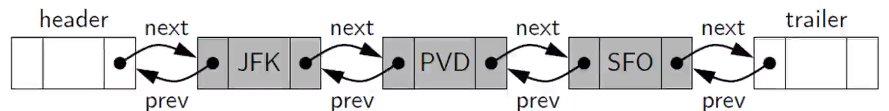

Note the above picture, where there are **special nodes** at both ends of the list: a **header** node at the beginning and a **trailer** node at the end. These "dummy" nodes are known as **sentinels / guards**, i.e. the header sentinel and the trailer sentinel.

### Insertion and Deletion

Every insertion into the doubly linked list representation will take place between a pair of existing nodes. When a new element is inserted at the front of the sequence, we will simply add the new node **between** the header and the node that is currently after the header.

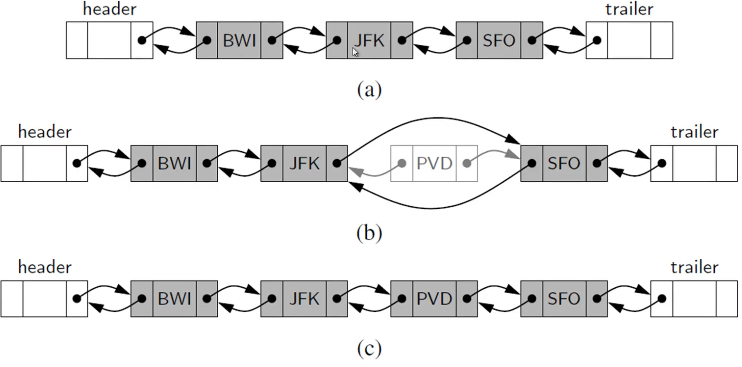
_To insert PVD, the next pointer of JFK will repoint to PVD, and the previous pointer of SFO will repoint to PVD._

For **deletions**, the two neighbours will be directly linked to each other. As a result, that node will no longer be considered part of the list and it can be reclaimed by the system. Because of sentinels, the same implementation can be used when deleting the first or the last element of the sequence.

### Implementation

In [208]:
class DNode(object):
    
    def __init__(self,value):
        self.value = value
        self.next_node = None
        self.prev_node = None

In [211]:
a = DNode(1) # header
b = DNode(2)
c = DNode(3) # trailer

a.next_node = b
b.prev_node = a
b.next_node = c
c.prev_node = b

## Linked List Interview 1: Singly Linked List Cycle Check

Given a singly linked list, write a function which takes in the first node in a singly linked list and returns a boolean indicating if the linked list contains a "cycle".

A cycle is when the "last" node's next point actually points back to a previous node in the list. This is sometimes also known as a **circularly linked list**.

You are given the below Linked List Node class code:

In [212]:
class Node(object):
    
    def __init__(self,value):
        self.value = value
        self.nextnode = None

### Solution

To solve this problem, we will have two markers traversing through the list, **marker1** and **marker2**. We will have both markers begin at the first node of the list and traverse through the linked list. However the second marker marker2 will move two nodes ahead for every one node that marker1 moves.

By this logic, we can imagine that the markers are "racing" through the linked list, with marker2 moving faster. If the linked list has a cycle and is circularly connected, we will have the analogy of a track: in this case the marker2 will eventually be "lapping" around the marker1 and they will equal each other.

If the linked list has no cycle, then marker2 should be able to continue on until the very end, never equalling the first marker.

In [213]:
def cycle_check(node):
    
    marker1 = node
    marker2 = node
    
    while marker2 != None and marker2.nextnode != None: # while marker2 not reached tail AND marker2 is not about to finish
        
        marker1 = marker1.nextnode
        marker2 = marker2.nextnode.nextnode # double speed
        
        if marker2 == marker1:
            return True
        
    return False

In [218]:
# CREATE CYCLE LIST
a = Node(1)
b = Node(2)
c = Node(3)

a.nextnode = b
b.nextnode = c
c.nextnode = a # Cycle Here!

# CREATE NON CYCLE LIST
x = Node(1)
y = Node(2)
z = Node(3)

x.nextnode = y
y.nextnode = z

# Test
print(cycle_check(a),
      cycle_check(b),
      cycle_check(c),
      cycle_check(x),
      cycle_check(y),
      cycle_check(z))

True True True False False False


## Linked List Interview 2: Linked List Reversal

Write a function to reverse a Linked List in place. The function will take in the head of the list as input and return the new head of the list. You are given the below:

In [219]:
class Node(object):
    
    def __init__(self,value):
        self.value = value
        self.nextnode = None

### Solution

Since we want to do this in place, we want to make the function operate in O(1) space, meaning we don't want to create a new list, so we will simply use the current nodes! Time wise, we can perform the reversal in O(n) time aka in linear time.

We can reverse the list by changing the next pointer of each node. Each node's next pointer should point to the previous node. In one pass from head to tail of our input list, we will point each node's next pointer to the previous element.

Make sure to copy current.next_node into next_node **before** setting current.next_node to previous.

In [224]:
def reverse(head):
    
    current = head
    previous = None
    nextnode = None
    
    while current: # aka go through the whole list
        nextnode = current.nextnode
        current.nextnode = previous 
        
        # Prepare for next iteration
        previous = current
        current = nextnode
    
    return previous

In [230]:
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)

a.nextnode = b
b.nextnode = c
c.nextnode = d

print(a.nextnode.value)
print(b.nextnode.value)
print(c.nextnode.value)

reverse(a)

print(d.nextnode.value)
print(c.nextnode.value)
print(b.nextnode.value)

2
3
4
3
2
1


## Linked List Interview 3: Linked List Nth to Last Node

Write a function that takes a head node and an integer value **n** and then returns a single node which is the nth to last node. So if n = 1, then that would return the last node; if n = 2, then it would return the second last node.

### Solution

One approach to this problem is this:

Imagine you have a bunch of nodes and a "block" which is n-nodes wide. We could walk this "block" all the way down the list, and once the front of the block reached the end, then the other end of the block would be a the Nth node!

So to implement this "block" we would just have two pointers a left and right pair of pointers. Let's mark out the steps we will need to take:

- Walk one pointer **n-1** nodes from the head, this will be the right_point
- Put the other pointer at the head, this will be the left_point
- Walk/traverse the block (both pointers) towards the tail, one node at a time, keeping a distance **n** between them.
- Once the right_point has hit the tail, we know that the left point is at the target.

Let's see the code for this!

In [231]:
def nth_to_last_node(n,head):
    
    left_pointer = head
    right_pointer = head
    
    for i in range(n-1):
        if not right_pointer.nextnode: # edge case - if not enough nodes
            raise LookupError('Error: n is larger than the linked list')
            
        right_pointer = right_pointer.nextnode # after all the iterations, it will now be there
        
    while right_pointer.nextnode: # while not reached the end yet
        left_pointer = left_pointer.nextnode
        right_pointer = right_pointer.nextnode
        
    return left_pointer

In [236]:
a = Node(1)
b = Node(2)
c = Node(3)
d = Node(4)
e = Node(5)

a.nextnode = b
b.nextnode = c
c.nextnode = d
d.nextnode = e

nth_to_last_node(3,a).value

3

## Linked List Interview 4: Implement Both Types (OOP)

See implementation as above. These are common interview questions.

# Recursion

There are two main instances of recursion:
1. Recursion used as a technique where a function makes one or more calls to itself. This is the more common interview question.
2. Data structure uses smaller instances of the exact same type of data structure when it represents itself.

Recursion provides a powerful alternative for performing repeititons of tasks in which a loop is not ideal. It serves as a great tool for building out particular data structures.

## Example with Factorials

We will create the factorial function to exemplify recursion. The factorial function is denoted with an exclamation point, and is defined as the **product of the integers from 1 to n**:

    n! = n x (n-1) x (n-2) x ... x 3 x 2 x 1.
    If n = 0, then n! = 1.
    
    4! = 4 x 3 x 2 x 1 = 24
       = 4 x (3 x 2 x 1)
       = 4 x 3!
    
    n! = n x (n-1)!
    
If you see the pattern, we can keep making recursive calls to this factorial function. We will also need the concept of **base case**, which occurs once n = 0, and so n! = 0.

When we formulate a recursive function, there are two parts:
1. A base case, where it is a result that the function can return immediately.
2. A recursive case, where the function calls itself to break the current problem down to a simpler level.

Another way of seeing it is a recursive function is a function that calls itself until a "base condition" is true, and execution stops. While false, we will keep placing executions contexts on top, just like a stack. This will continue to happen until we have a **stack overflow**, where we run out of memory to hold items in the stack.

See [here](https://medium.com/@daniel.oliver.king/getting-started-with-recursion-f89f57c5b60e) and [here](https://www.freecodecamp.org/news/recursion-is-not-hard-858a48830d83/).

Therefore, whenever you are trying to develop a recursive solution, it is very important to think about the base case, as your solution will need to return the base case once all the recursive cases have been worked through.

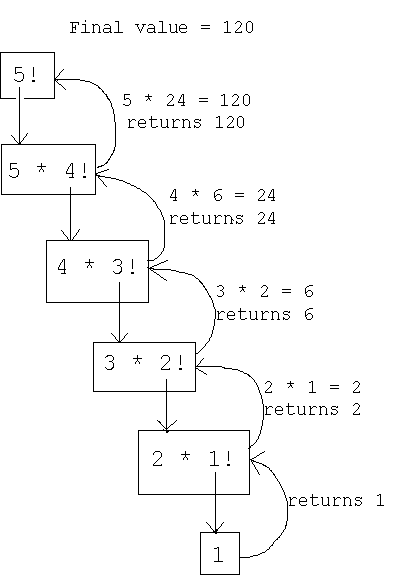
_This picture is very reminiscent of how recursion functions work. Always go down all the way to base case, then return all the way to the top._

In [237]:
def fact(n):
    
    # Start out with base case
    if n == 0:
        return 1
    
    # Most of the parts
    else:
        return n * fact(n-1)

In [238]:
fact(5)

120

## Recursion Problems

### Problem 1

**Write a recursive function which takes an integer and computes the cumulative sum of 0 to that integer.**

**For example, if n=4 , return 4+3+2+1+0, which is 10.**

This problem is very similar to the factorial problem presented during the introduction to recursion. Remember, always think of what the base case will look like. In this case, we have a base case of n = 0. (Note, you could have also designed the cut off to be 1).

In this case, we have: n + (n-1) + (n-2) + .... + 0

In [242]:
def rec_sum(n):
    
    # Base case
    if n == 0:
        return 0
    
    # Others
    else:
        return n + rec_sum(n-1) 

In [243]:
rec_sum(4)

10

### Problem 2

**Given an integer, create a function which returns the sum of all the individual digits in that integer. For example: if n = 4321, return 4+3+2+1.**

Hint: you will need to use modulo.

    4321 % 10 = 1
    4321 // 10 = 432
    
Need to think of this function recursively by knowing that:

    4502 % 10 + sum_func(4502/10)

In [256]:
def sum_func(n):
    
    # Base case
    if len(str(n)) == 1:
        return n
    
    # Others
    else:
#         print(n, n % 10, sum_func(n//10), n % 10 + sum_func(n//10))
        return n % 10 + sum_func(n//10)

In [257]:
sum_func(4321)

10

### Problem 3

_Note, this is a more advanced problem than the previous two! It aso has a lot of variation possibilities and we're ignoring strict requirements here._

Create a function called word_split() which takes in a string **phrase** and a set **list_of_words**. The function will then determine if it is possible to split the string into the words given in the list. You can assume the phrase will only contain words found in the dictionary, i.e. if it is not in the dictionary, then it does not exist and the whole function will return an empty list.

For example:

    word_split('themanran',['the','ran','man'])
    > ['the', 'man', 'ran']
    
    word_split('ilovedogsJohn',['i','am','a','dogs','lover','love','John'])
    > ['i', 'love', 'dogs', 'John']
    
    word_split('themanran',['clown','ran','man'])
    > []

In [258]:
def word_split(phrase, list_of_words, output = None):
    
    # We do this because we cannot initialise output as [] in the code, or else whenever we recursively call, we will reset it.
    # Only execute this once for the first time you run the recursion.
    if output is None:
        output = []
        
    # Others
    for word in list_of_words:
        if phrase.startswith(word):
            output.append(word)
            return word_split(phrase[len(word):], list_of_words, output) 
        
    return output

In [263]:
print(
word_split('themanran',['the','ran','man']),
word_split('ilovedogsJohn',['i','am','a','dogs','lover','love','John']),
word_split('themanran',['clown','ran','man']))

['the', 'man', 'ran'] ['i', 'love', 'dogs', 'John'] []


## Memoisation

In this lecture we will discuss **memoization** and **dynamic programming**. For your homework assignment, read the [Wikipedia](https://en.wikipedia.org/wiki/Memoization) article on Memoization, before continuing on with this lecture!

Memoization effectively refers to remembering ("memoization" -> "memorandum" -> to be remembered) results of method calls based on the method inputs and then returning the remembered result rather than computing the result again. You can think of it as a cache for method results. We'll use this in some of the interview problems as improved versions of a purely recursive solution.

A simple example for computing factorials using memoization in Python would be something like this:

In [268]:
# Create cache for known results
factorial_memo = {}

def factorial(k):
    
    if k < 2: 
        return 1
    
    if not k in factorial_memo:
        factorial_memo[k] = k * factorial(k-1)
        
    return factorial_memo[k]

factorial(4), factorial_memo

(24, {2: 2, 3: 6, 4: 24})

Note how we are now using a dictionary to store previous results of the factorial function! We are now able to increase the efficiency of this function by remembering old results!

Keep this in mind when working on the Coin Change Problem and the Fibonacci Sequence Problem.

We can also encapsulate the memoization process into a class:

In [327]:
class Memoize:
    def __init__(self, f):
        self.f = f # read f as function
        self.memo = {}
    def __call__(self, *args):
        if not args in self.memo:
            self.memo[args] = self.f(*args)
        return self.memo[args]

Then all we would have to do is:

In [328]:
def factorial(k):
    
    if k < 2: 
        return 1
    
    return k * factorial(k - 1)

factorialz = Memoize(factorial) # init is done

print(factorialz.memo, "\n",
      factorialz(4)) # call is done

{(4,): 24} 
 24


Try comparing the run times of the memoization versions of functions versus the normal recursive solutions!

## Recursion Interview 1: Reverse a String

Reverse a string using recursion.

### Solution

In order to reverse a string using recursion we need to consider what a base and recursive case would look like. Here we've set a base case to be when the length of the string we are passing through the function is length less than or equal to 1.

During the recursive case we grab the first letter and add it on to the recursive call.

<ins>Steps to Thinking on Solving</ins>
1. Know your base case.
2. Let's say you want 'abc' to become 'cba'. Hence, you want your recursive function to return: _'c' + function('ab')_.
 

In [12]:
def reverse(s):
    
    # Base Case
    if len(s) <= 1:
        return s

    # Recursion
    return reverse(s[1:]) + s[0] # take away the first element, then reverse the rest while they are in front

In [13]:
print(reverse('abc'),
      reverse('hello'),
      reverse('hello world'),
      reverse('123456789'))

cba olleh dlrow olleh 987654321


## Recursion Interview 2: String Permutation

Given a string, write a recursive function to output a list of all the possible permutations of that string. For example, 'abc' should return ['abc', 'acb', 'bac', 'bca', 'cab', 'cba'].

_Note: if a character is repeated, treat each occurrence as distinct. Therefore, 'xxx' would return a list with 6 versions of 'xxx'._

### Solution:

Let's think about what the steps we need to take here are:

- Iterate through the initial string – e.g., ‘abc’.
<p>&nbsp;</p>
- For each character in the initial string, set aside that character and get a list of all permutations of the string that’s left. So, for example, if the current iteration is on 'b', we’d want to find all the permutations of the string 'ac'.
<p>&nbsp;</p>
- Once you have the list from step 2, add each element from that list to the character from the initial string, and append the result to our list of final results. So if we’re on 'b' and we’ve gotten the list ['ac', 'ca'], we’d add 'b' to those, resulting in 'bac' and 'bca', each of which we’d add to our final results.
<p>&nbsp;</p>
- Return the list of final results.


In [42]:
def permute(s):
    
    out = []
    
    # Base case
    if len(s) == 1:
        out = [s]
    
    # Recursion
    else:
        for i,let in enumerate(s): # for every letter in string
            for perm in permute(s[:i] + s[i+1:]): # for every permutation resulting from Step 2 and 3
                out += [let+perm] # add it to output
                print(let,perm,out)
                
    return out

In [52]:
permute('abc') # super resource-heavy solution

b c ['bc']
c b ['bc', 'cb']
a bc ['abc']
a cb ['abc', 'acb']
a c ['ac']
c a ['ac', 'ca']
b ac ['abc', 'acb', 'bac']
b ca ['abc', 'acb', 'bac', 'bca']
a b ['ab']
b a ['ab', 'ba']
c ab ['abc', 'acb', 'bac', 'bca', 'cab']
c ba ['abc', 'acb', 'bac', 'bca', 'cab', 'cba']


['abc', 'acb', 'bac', 'bca', 'cab', 'cba']

In [50]:
# Itertools without Recursion

from itertools import permutations
z = permutations('abc')
z = ["".join(i) for i in z]
print(z, len(z))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba'] 6


In [51]:
[i for i in enumerate('abc')]

[(0, 'a'), (1, 'b'), (2, 'c')]

## Recursion Interview 3: Fibonnaci Sequence

Implement a [Fibonnaci Sequence](https://en.wikipedia.org/wiki/Fibonacci_number) in 3 different ways:
1. Recursively
2. Dynamically (using memoisation to store results)
3. Iteratively

Remember that a fibonacci sequence: 0, 1, 1, 2, 3, 5, 8, 13, 21,... starts off with a base case checking to see if n = 0 or 1, with a formula of:

    F0 = 0, F1 = 1
    Fn = F(n-1) + F(n-2), for n > 1

Basically, the current number takes the sum of the previous two numbers.

Your function will accept a number **n** and return the **nth** number of the fibonacci sequence.

### Fibonacci Solution: Recursion

The recursive solution is exponential time O(2^n). However it is a simple and basic implementation to consider:

In [59]:
def fib_rec(n):
    
    # Base Case
    if n == 0 or n == 1:
        return n
    
    # Recursion
    else:
        return fib_rec(n-1) + fib_rec(n-2)

In [60]:
fib_rec(10)

55

### Fibonnaci Solution: Dynamically

In the form it is implemented here, the cache is set beforehand and is based on the desired **n** number of the Fibonacci Sequence. Note how we check it the cache[n] != None, meaning we have a check to know whether or not to keep setting the cache (and more importantly keep cache of old results!).

In [103]:
# Instantiate Cache
n = 10
cache = [None]*(n+1) # creates a list of n+1 Nones 

def fib_dyn(n):
    
    # Base Case
    if n == 0 or n == 1:
        cache[n] = n
    
    # Check Cache
    if cache[n] != None:
        return cache[n]
    
    # Keep Setting cache
    cache[n] = fib_dyn(n-1) + fib_dyn(n-2)
    
    print(cache)
    return cache[n]

In [104]:
fib_dyn(10)

[0, 1, 1, None, None, None, None, None, None, None, None]
[0, 1, 1, 2, None, None, None, None, None, None, None]
[0, 1, 1, 2, 3, None, None, None, None, None, None]
[0, 1, 1, 2, 3, 5, None, None, None, None, None]
[0, 1, 1, 2, 3, 5, 8, None, None, None, None]
[0, 1, 1, 2, 3, 5, 8, 13, None, None, None]
[0, 1, 1, 2, 3, 5, 8, 13, 21, None, None]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, None]
[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55]


55

### Fibonnaci Solution: Iteratively

In this solution we can take advantage of Python's tuple unpacking!

In [61]:
def fib_iter(n):
    
    # Set starting point
    a = 0
    b = 1
    
    # Follow algorithm
    for i in range(n):
        a, b = b, a+b
        
    return a

In [63]:
fib_iter(23)

28657

## Recursion Interview 4: Coin Change Problem

**Note: This problem has multiple solutions and is a classic problem in showing issues with basic recursion. There are better solutions involving memoization and simple iterative solutions.If you are having trouble with this problem (or it seems to be taking a long time to run in some cases) check out the Solution Notebook and fully read the conclusion link for a detailed description of the various ways to solve this problem!**

This problem is common enough that is actually has its own [Wikipedia Entry](https://en.wikipedia.org/wiki/Change-making_problem)! Let's check the problem statement again:

This is a classic recursion problem: Given a target amount **n** and a list (array) of distinct coin values, what's the fewest coins needed to make the change amount.

For example:

If n = 10 and coins = [1,5,10]. Then there are 4 possible ways to make change:

- 1+1+1+1+1+1+1+1+1+1
- 5 + 1+1+1+1+1
- 5+5
- 10

With 1 coin being the minimum amount.

### Solution

This is a classic problem to show the value of dynamic programming. We'll show a basic recursive example and show why it's actually not the best way to solve this problem.

In [107]:
def rec_coin(target,coins):
    
    # Default Value Set to Target
    min_coins = target
    
    # Base Case - check if target is in coin values list
    if target in coins:
        return 1
    
    # Recursion 
    else:
        # For every coin value that is <= target
        for i in [c for c in coins if c <= target]:
            # Add a coin count + recursive call
            num_coins = 1 + rec_coin(target-i,coins)
            # Reset minimum if the new num_coins < min_coins
            if num_coins < min_coins:
                min_coins = num_coins
                
    return min_coins

In [117]:
rec_coin(23,[2,7,10,20,22])

2

The problem with this approach is that it is very inefficient! It can take many, many recursive calls to finish this problem and its also inaccurate for non standard coin values (coin values that are not 1,5,10, etc.)

We can see the problem with this approach in the figure below:

In [118]:
from IPython.display import Image
Image(url='http://interactivepython.org/runestone/static/pythonds/_images/callTree.png')

Each node here corresponds to a call to the **rec_coin** function. The label on the node indicated the amount of change for which we are now computing the number of coins for. Note how we are recalculating values we've already solved! For instance 15 is called 3 times. It would be much better if we could keep track of function calls we've already made.
### Dynamic Programming Solution

This is the key to reducing the work time for the function. The better solution is to remember past results, that way before computing a new minimum we can check to see if we already know a result.

In [138]:
def rec_coin_dynam(target,coins,known_results):
    
    # Default output to target
    min_coins = target
    
    # Base Case
    if target in coins:
        known_results[target] = 1
        return 1
    
    # Return a known result
    elif known_results[target] > 0:
        return known_results[target]
    
    else:
        # For every coin value that is <= target
        for i in [c for c in coins if c <= target]:
            num_coins = 1 + rec_coin_dynam(target-i,coins,known_results)
            if num_coins < min_coins:
                min_coins = num_coins
                known_results[target] = min_coins # reset this known result
    
    return min_coins

In [139]:
target = 74
coins = [1,5,10,25]
known_results = [0]*(target+1)

rec_coin_dynam(target,coins,known_results)

8

# Trees

A **tree** data structure has a root, branches, and leaves. It has its root at the top and its leaves at the bottom. All the children of one node are independent of the children of another node. Each leaf node is unique. You can even more subtrees to a different node without affecting any other children of the same level.

A common example is the file system: your directories / folders are structured as a tree.

<div>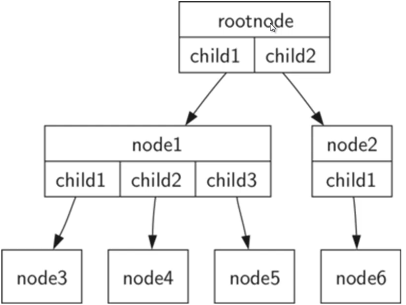</div>

## Tree Jargon

A **node "n"** is a fundamental part of a tree. It can have a name, which we call a **key**. It can also have additional information called **payload**. While this payload info is not central to many tree algorithms, it is often critical in applications that make use of trees.

An **edge** is another fundamental part. It connects two nodes to show that there is a relationship between them. Every node (except the root) is connected by exactly one incoming edge from another node, and it may have several outgoing edges.

The **root** is the highest level of the tree.

A **path** is an ordered list of nodes that are connected by edges. For example: Mammal -> Carnivora -> Felidae -> Felis is a path.

The set of nodes **c** that have incoming edges from the same node are said to be **children** of that node. Its on top is its **parent "p"**. Those children that share the same parent are then **siblings**. A **subtree** comprises of that parent and all its descendents.

The most bottom ending node is called the **leaf node**. They have no children.

The **level** of a node n is the number of edges on the path from the root node to n.

The **height** is the maximum level of any node in the tree.

If each node in the tree has a maximum of two children, then the tree is a **binary tree**.

There is a also a **recursive definition** of a tree. A tree is either empty or consists of a root and zero or more subtrees, each of which is also a tree. The root of each subtree is connected to the root of the parent tree by an edge.

<div>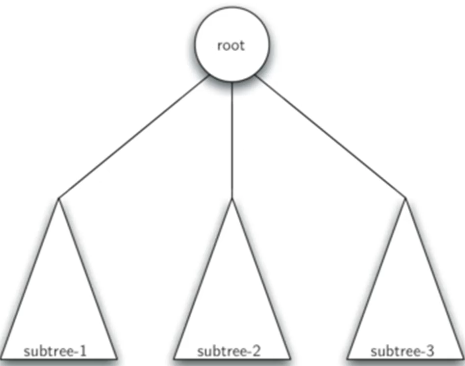</div>

## Tree Representation Implementation

### Tree as a List of Lists

For our tree, we will store the root node as the first element, then the left subtree as the second element, and the right subtree as the third.

<div>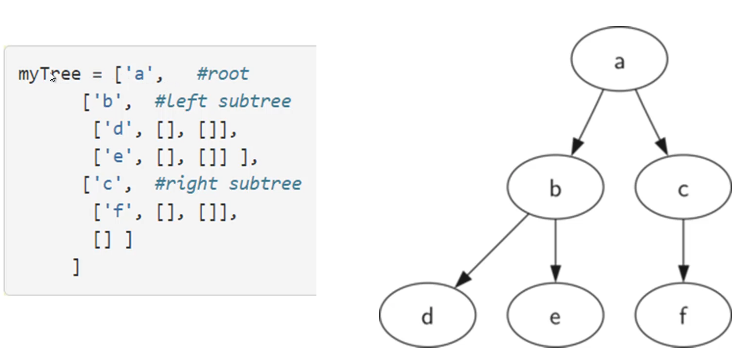</div>

In [140]:
def BinaryTree(r): # when you call this, return root node r and 2 empty sublists
    return [r,[],[]]

def insertLeft(root,newBranch): # splice a new node into the tree at any position
    t = root.pop(1) # pop out left subtree
    if len(t) > 1: # if this left subtree has something in it
        root.insert(1,[newBranch,t,[]]) # then in the root, insert a new node, and push the previous node down
    else:
        root.insert(1,[newBranch,[],[]])
    return root

def insertRight(root,newBranch): # same but right
    t = root.pop(2)
    if len(t) > 1:
        root.insert(2,[newBranch,[],t])
    else:
        root.insert(2,[newBranch,[],[]])
    return root

def getRootVal(root):
    return root[0]

def setRootVal(root,newVal):
    root[0] = newVal
    
def getLeftChild(root):
    return root[1]

def getRightChild(root):
    return root[2]

In [155]:
r = BinaryTree(3)
print(f'{r}\n{insertLeft(r,4)}\n{insertLeft(r,5)}\n{insertRight(r,6)}\n{insertRight(r,7)}')
l = getLeftChild(r)
print(l)
setRootVal(l,9) # remember that lists are mutable - any changes they will still have the same address id
print(r)
ll = getLeftChild(l)
print(ll)
setRootVal(ll,1234)
print(r)

[3, [], []]
[3, [4, [], []], []]
[3, [5, [4, [], []], []], []]
[3, [5, [4, [], []], []], [6, [], []]]
[3, [5, [4, [], []], []], [7, [], [6, [], []]]]
[5, [4, [], []], []]
[3, [9, [4, [], []], []], [7, [], [6, [], []]]]
[4, [], []]
[3, [9, [1234, [], []], []], [7, [], [6, [], []]]]


### Tree as Nodes and References 

<div>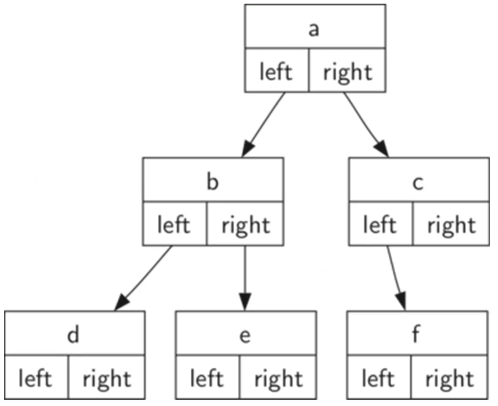</div>

In [156]:
class BinaryTree(object):
    
    def __init__(self, rootObj):
        self.key = rootObj
        self.leftChild = None
        self.rightChild = None
        
    def insertLeft(self, newNode):
        if self.leftChild == None:
            self.leftChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.leftChild = self.leftChild
            self.leftChild = t
    
    def insertRight(self, newNode):
        if self.rightChild == None:
            self.rightChild = BinaryTree(newNode)
        else:
            t = BinaryTree(newNode)
            t.rightChild = self.rightChild
            self.rightChild = t

    def getLeftChild(self):
        return self.leftChild
    
    def getRightChild(self):
        return self.rightChild
    
    def setRootVal(self,obj):
        self.key = obj
        
    def getRootVal(self):
        return self.key

In [164]:
r = BinaryTree('a')

print(r.getRootVal())
print(r.getLeftChild())
print(r.insertLeft('b'))
print(r.getLeftChild().getRootVal())

a
None
None
b


## Tree Traversals

There are 3 commonly used patterns to visit all the nodes in a tree. The difference between these patterns is the order in which each node is visited (a "traversal"). They are: **preorder, inorder, and postorder**.

In a **preorder** traversal, we visit the root node first, then recursively do a preorder traversal of the left subtree, followed by a recursive preorder traversal of the right subtree.

In an **inorder** traversal, we recursively do an inorder traversal on the left subtree, visit the root node, and finally do a recursive inorder traversal of the right subtree.

In a **postorder** traversal, we recursively do a postorder traversal of the left subtree and the right subtree followed by a visit to the root node.

<div>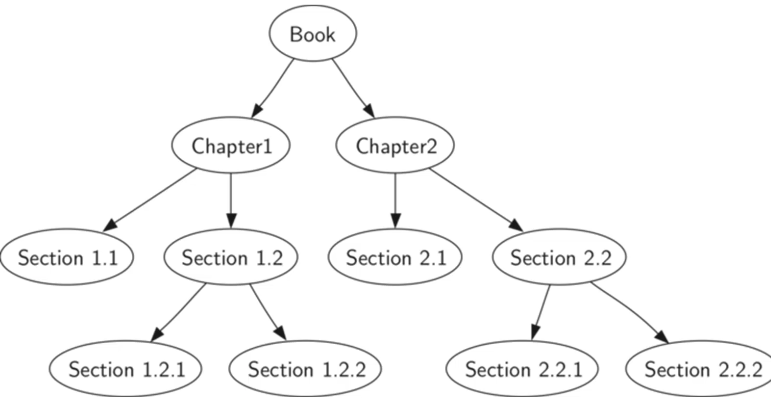</div>

Suppose you wanted to read this book from front to back, then the **preorder** traversal gives you that. You start the root of the tree (the Book node), and follow the preorder traversal instructions - you recursively call preorder on the left child (Chapter 1), then again recursively call preorder on the left child (Section 1.1). Since Section 1.1 has no children, do not make any additional recursive calls. When finished with it, move up tree to Chapter 1, then visit right subtree Section 1.2. Then you go to Section 1.2.1, then 1.2.2, and then return back to Chapter 1. Once that is done, return to Book node and follow the same procedure for Chapter 2.

There are 2 ways of implementing preorder - either by an external function, or a class method.

For the <ins>external recursive function</ins>, the base case is simply to check if the tree exists. If the tree parameter is None, then the function returns without taking any action.

<div>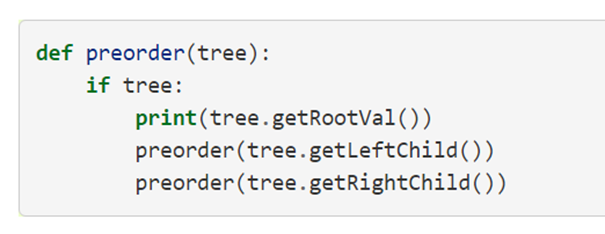</div>

For the <ins>class method implementation</ins>, must check for the existence of the left and right children BEFORE making the recursive call to preorder.

<div>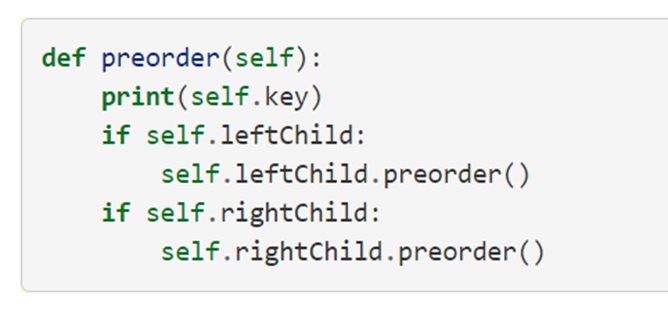</div>

In summary, implementing preorder as an external function is probably better. The reason is that you very rarely want to just traverse a tree - in most cases you are going to want to accomplish something else. This is the same reasoning for the rest of the traversals.

For a **postorder** traversal, it is nearly identical to the preorder except that we move the call to print to the end of the function.

<div>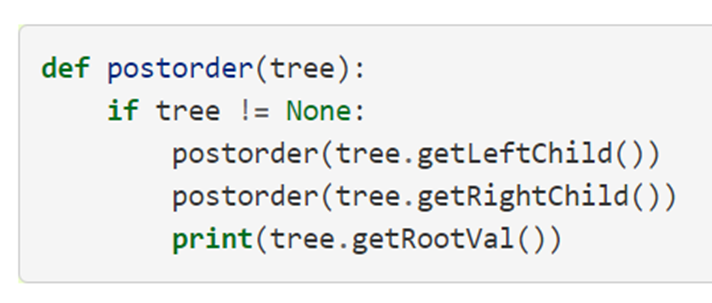</div>

While for an **inorder** traversal, we visit the left subtree, then the root, then the right subtree. 

<div>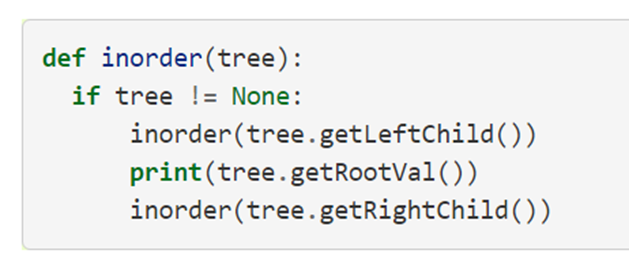</div>

Notice that in all 3 methods, we are simply changing the position of the print statement with respect to the two recursive function calls.

## Priority Queues with Binary Heaps

One important variation of a queue is called a **priority queue**. It acts like a queue in that you dequeue an item by removing it from the front, except that the logical order of items inside it is determined by their priority. The highest priority items are at the front while the lowest priority are at the back. When you enqueue an item, it may even move all the way to the front.

The classic way to implement one is to use the data structure called a **binary heap**, which allows us to both enqueue and dequeue items in O(logn). There are 2 variations: the **min heap** with the smallest key at the front or the **max heap** with the largest key value at the front.
<div>&nbsp;</div>
<div>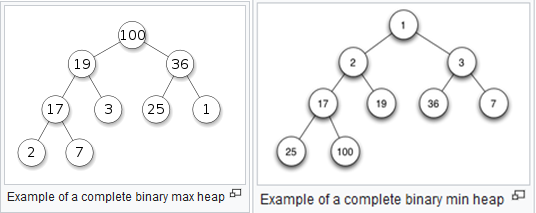</div>

### Implementation

The basic operations we will implement for our **min** [binary heap](https://en.wikipedia.org/wiki/Binary_heap) are as follows:

- BinaryHeap() creates a new, empty, binary heap.
- insert(k) adds a new item to the heap.
- findMin() returns the item with the minimum key value, leaving item in the heap.
- delMin() returns the item with the minimum key value, removing the item from the heap.
- isEmpty() returns true if the heap is empty, false otherwise.
- size() returns the number of items in the heap.
- buildHeap(list) builds a new heap from a list of keys.

To make our heap work efficiently, we want to take advantage of the **logarithmic nature of the binary tree** to represent our heap. In order to guarantee so, we must keep our tree balanced. This means it must have roughly the same number of nodes in the left and right subtrees of the root. We want to create a **complete binary tree**, which means each level has all of its nodes.

<div>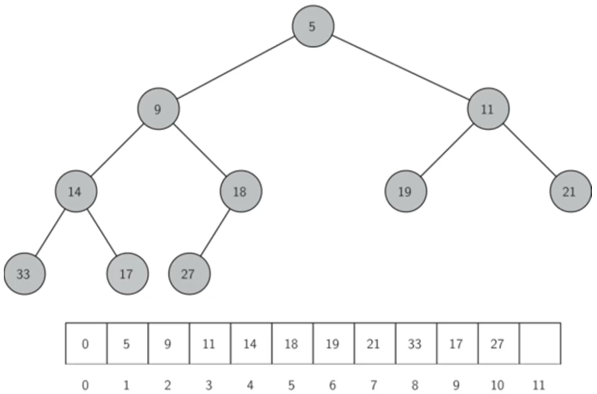</div>

This picture is a complete binary tree. It has an odd number of elements which is why there is a branch with only one node. 

On another note, a complete tree can also be represented using a single list; we do not need to use nodes and references as we showed earlier or even a list of lists. Because we know the tree is complete, the left child of parents P is the node that is found at position 2P in the list, while the right child is found at position 2P+1 in the list. Using this knowledge, we can use maths to make simple traversal throughout the tree, and also efficiently implement the binary heap.

Note how when we **percolate up** a new node, the siblings are not affected as they remain in the same level. We also restore the heap property between the new item and the parent.

Remember that inserting an item in the middle of the list requires O(n) operations to shift the rest of the list over to make room for the new key. If you want to insert n keys (a whole list of keys) into the heap, it would require a total of O(nlogn) operations. However, if we start with an entire list cleanly, we can build the whole heap in O(n) operations.

In any case, this is a pictorial sequence of how to create a heap from a list. This works because of a peculiar thing about binary trees, which is that **any nodes past the halfway point will always be leaves and therefore have no children**. This allows percDown() to work well and ensure that any large child is moved down the tree.
<div>&nbsp;</div>
<div>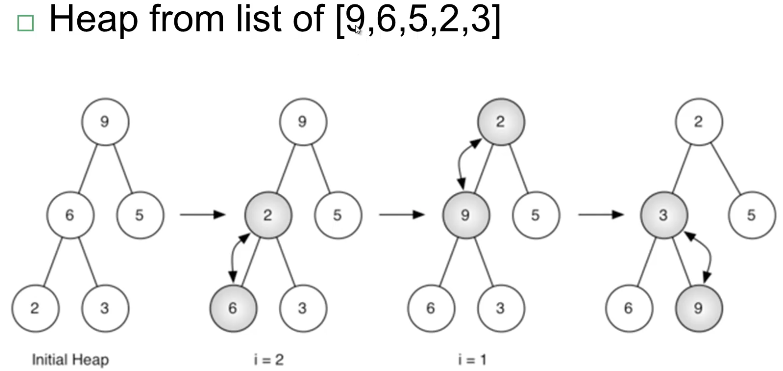</div>

_**Q:** How do you prove that building a heap takes O(n) / linear time? In general, logn factor is derived from the height of the tree. For most of the buildHeap() method, the tree is shorter than logn, and using the fact that you can build a heap from a list in linear time, the sorting algorithm uses a heap and sorts the list in nlogn time._

In [40]:
class BinHeap:
   
    def __init__(self):
        self.heapList = [0] # why not []? because can still do integer division with [0].
        self.currentSize = 0

    def percUp(self,i):
        while i // 2 > 0:
            if self.heapList[i] < self.heapList[i // 2]: # if child < parent
                tmp = self.heapList[i // 2] # temp save parent
                self.heapList[i // 2] = self.heapList[i] # parent takes on that new value 
                self.heapList[i] = tmp # child takes on parent's old value
            i = i // 2 # go to new parent's index and repeat

    def insert(self,k): # appending to the end of the list is the easiest, but also may violate the heap structure property.
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize) # exchange positions

    def percDown(self,i):
        while (i * 2) <= self.currentSize: # while left child exists
            mc = self.minChild(i) # returns smaller of left or right child
            if self.heapList[i] > self.heapList[mc]: # if current node bigger than that child
                tmp = self.heapList[i] # temp holder for current node
                self.heapList[i] = self.heapList[mc] # parent node takes child's smaller value
                self.heapList[mc] = tmp # child node takes parent's larger value
            i = mc # set index as the new child's

    def minChild(self,i):
        if i * 2 + 1 > self.currentSize: # if right child does not exists
            return i * 2 # return the left child
        else:
            if self.heapList[i*2] < self.heapList[i*2+1]: # if left child < right child
                return i * 2 # return left child
            else:
                return i * 2 + 1 # return right child

    def delMin(self): # deletes the root
        retval = self.heapList[1] # take the root
        self.heapList[1] = self.heapList[self.currentSize] # replace root w last node's number
        self.currentSize = self.currentSize - 1
        self.heapList.pop() # deletion of last node
        self.percDown(1)
        return retval # return the old root value that was deleted

    def buildHeap(self,alist): # build a heap from a list of keys
        i = len(alist) // 2
        self.currentSize = len(alist)
        self.heapList = [0] + alist[:]
        while (i > 0):
            self.percDown(i)
            i = i - 1

## Binary Search Trees

_**Q: What is binary search?** Binary search is an efficient algorithm for finding an item from a sorted list of items. It works by repeatedly dividing in half the portion of the list that could contain the item, until you've narrowed down the possible locations to just one._

Previously we have seen 2 ways to get key-value pairs in a collection. These collections implement the **map** abstract data type (ADT). The two implementations of a map ADT were binary search on a list and hash tables.

Now, we wil learn **[binary search trees](https://en.wikipedia.org/wiki/Binary_search_tree)** as another way to map a key to a value. In this case, we are not interested in the exact placement of items in the tree, but more of using the binary tree structure to provide for efficient searching.
<div>&nbsp;</div>
<div>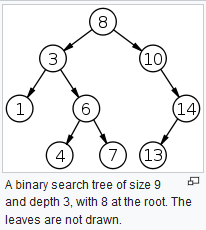</div>

A binary search tree relies on the property that keys that are less than the parents are found in the left subtree, and keys that are greater than the parent are found in the right subtree. We call this the **bst property**. 
<div>&nbsp;</div>
<div>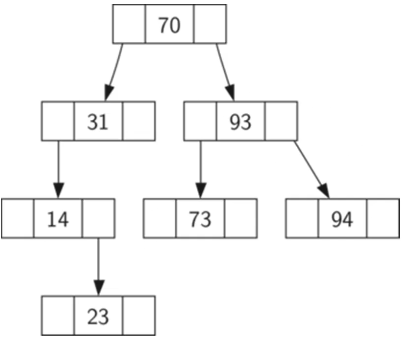</div>

Take the order of insertion: 70, 31, 93, 94, 14, 23, 73

Since 70 is the first key inserted into the tree, it is the root. Since 31 is smaller, it goes left child. Since 93 bigger, it goes right. 94 goes to right of 93. Then 14 goes left of 31. 23 is also less than 31, but there is no more space, so it compares against 14 and goes to its right child.

To implement the BST, we will use the nodes and references approach. However because we must be able to create and work with a binary search tree that is empty, we will have two classes. They are **TreeNode** and  **BinarySearchTree**. BST is like the shell while TN are the nodes.

In most cases, the external methods defined in the outer class is simply to check if the tree is empty. If there are nodes in the tree, the request is passed on to a private method defined in the BST class that takes the root as a parameter. OTOH, if the tree is empty or we want to delete the key at the root of the tree, we must take special action.

<ins>Notable Methods</ins>
- **put** is basically insert. It checks if tree already has a root. If not, then create a new TreeNode and install it as the root of the tree. If there is, then it will call the private recursive helper function **put** to search the tree in this algorithm:
    - Start at root of the tree, search the binary tree comparing the new key to the key in the current node.
    - If the new key is < current node, search the left subtree. If new key > current node, search the right subtree.
    - If no left nor right child to search, install the new node there by using TreeNode.
- You will see 2 put functions. The one without the underscore is just for code factoring / refactoring reasons (if not looks ugly). The one with underscore does the actual job.
- However, put lacks in implementing duplicate keys. It will simply be thrown to the right subtree of its earlier duplicate. This means that this new key will never be found during a search. A better way to handle inserting duplicates is for the value of the new key to replace the old value. For now, we will assume no duplicate keys.
- **get** is to retrieve values.
- **delete** is also hard to implement. It works like this:
    - If tree has more than 1 node, use the **\_get** method to find the TreeNode that needs to be removed. If only 1 node, still check if key of the root node matches the number. If so, delete. For both ways, if no key is found, an error is raised.
    - When a key-node is found, there are 3 cases to consider:
        - Node has **no children**. This is simple - just delete the node and remove the reference to this node in its parent.
        - Node has **one child**. Delete that node, and change references of its parent to match its child. If that current node is a LC, then its child will also be a LC. Same for RC. If that node has no parent, then it is the root - we shall then use **replaceNodeData** to replace that child to become a root.
        - Node has **two children**. Since there are 2 children, it is unlikely to just simply promote one of them to take the node's place. However, we can search the tree for a node that can be used to replace the one scheduled for deletion. We need a node that will preserve the BST relationships for both of the existing left and right subtrees. The node that wil do this is the node that has the next-largest key in the tree. We call this node the **successor**. This successor's value must be in between the LC and RC also, so that the relationships are maintained. Also, this successor must have not more than one child, so we can remove it using the above two ways. Once it has been removed, we simply put it in the deleted node's position. We use **findSuccessor** and **findMin** to find the successor. We also use **spliceOut** to remove the successor properly.
- **findSuccessor** uses the inorder traversal (left > root > right) so it prints out smallest to largest. There are also 3 cases:
    - The successor key must be between the LC and RC. Hence, we do not look at LC because all of LC is smaller than its amount. The successor amount must then be current <= RC.
    - If node has a RC, then the successor is the smallest key in the right subtree.
    - If node has no RC and is the LC of its parent, then the parent is the successor.
    - If node has no RC and is the RC of its parent, then the successor is the successor of its parent excluding this node (yes you read that right). So you do a recursive find of its parent's successor, assuming this node did not exist.

<div>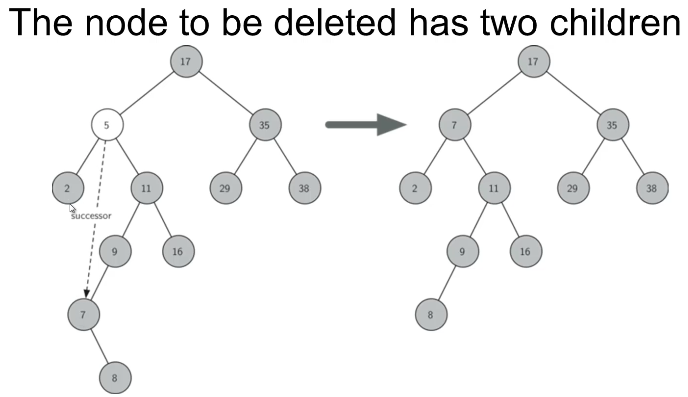</div>

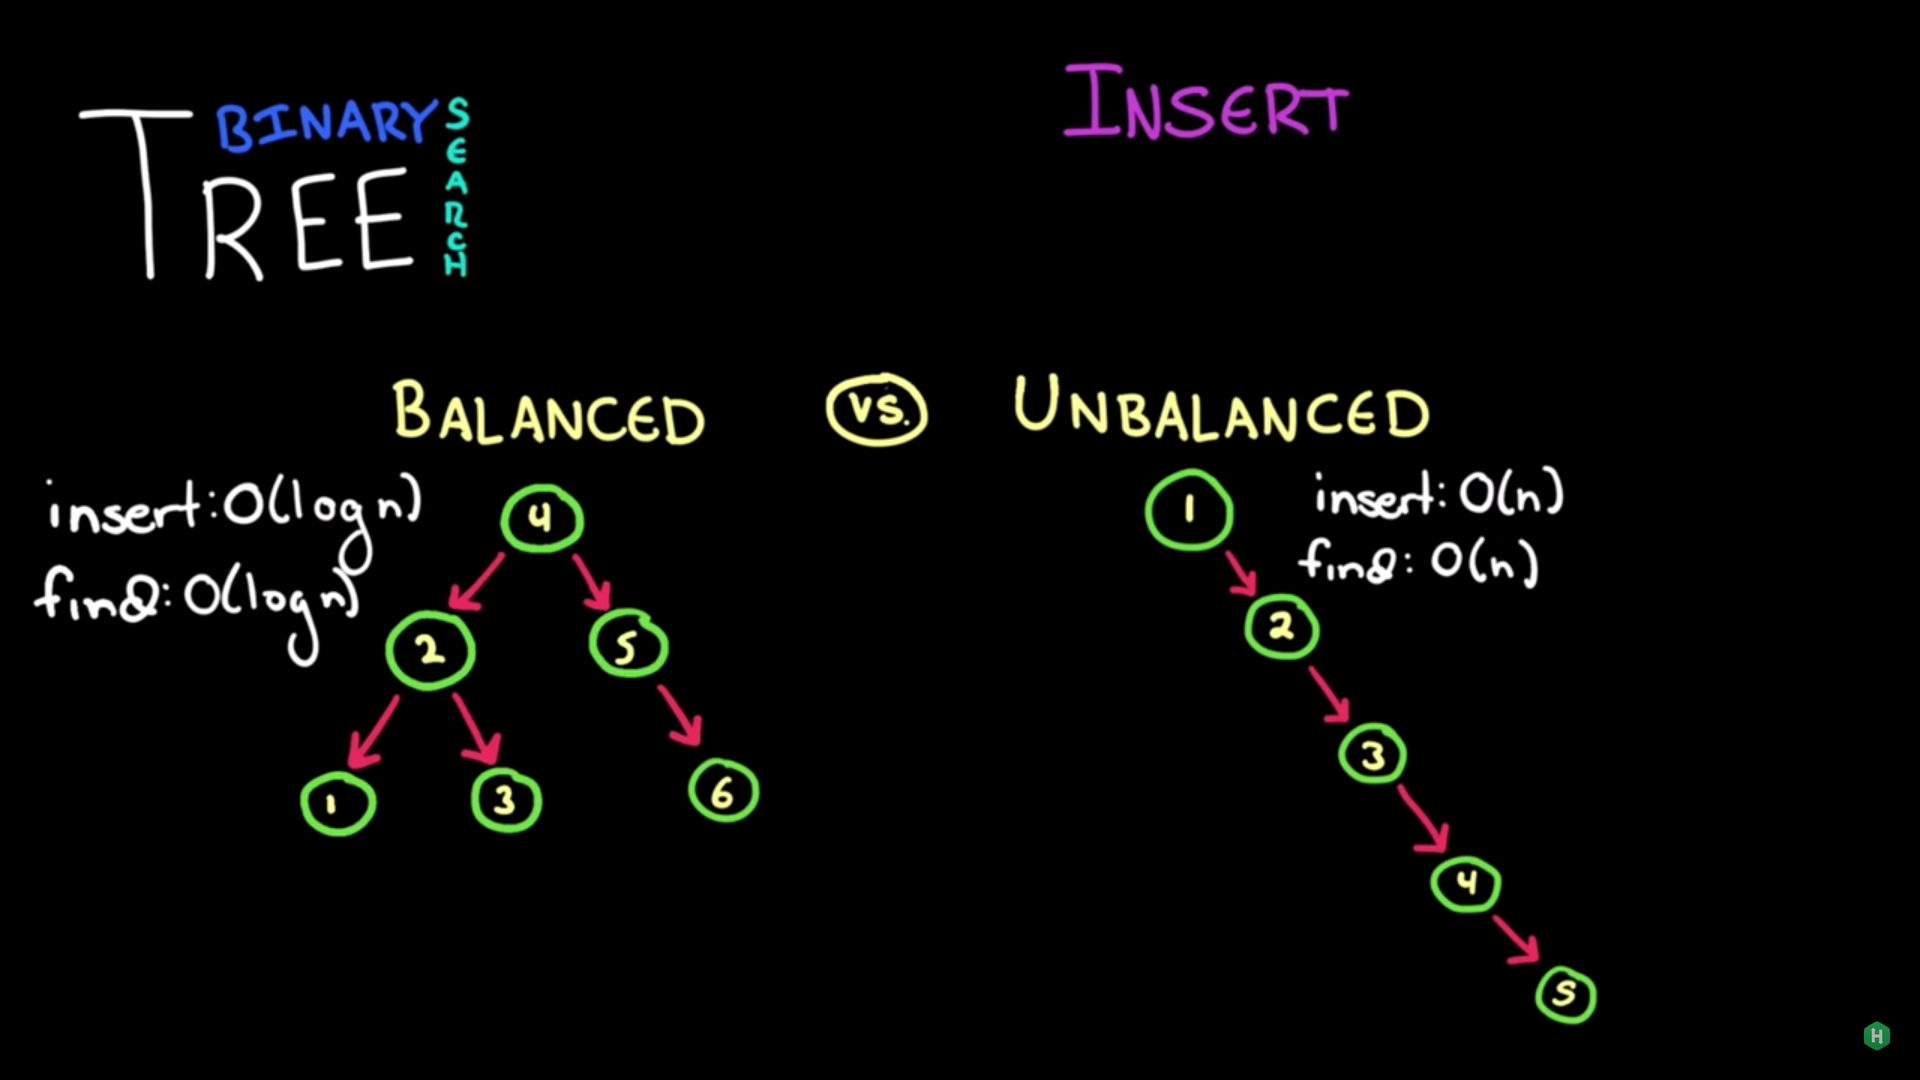

In [2]:
class TreeNode:
    
    def __init__(self,key,val,left=None,right=None,parent=None):
        self.key = key
        self.payload = val
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        return self.leftChild

    def hasRightChild(self):
        return self.rightChild

    def isLeftChild(self):
        return self.parent and self.parent.leftChild == self

    def isRightChild(self):
        return self.parent and self.parent.rightChild == self

    def isRoot(self):
        return not self.parent

    def isLeaf(self):
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        return self.rightChild or self.leftChild

    def hasBothChildren(self):
        return self.rightChild and self.leftChild

    def replaceNodeData(self,key,value,lc,rc):
        self.key = key
        self.payload = value
        self.leftChild = lc
        self.rightChild = rc
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self


class BinarySearchTree:

    def __init__(self):
        self.root = None
        self.size = 0

    def length(self):
        return self.size

    def __len__(self):
        return self.size

    def put(self,key,val):
        if self.root: # if a root node exists
            self._put(key,val,self.root) # do the below to create the new node
        else: # if no root node
            self.root = TreeNode(key,val) # become the root node
        self.size = self.size + 1

    def _put(self,key,val,currentNode):
        if key < currentNode.key: # if number < rootnode/currentnode's number
            if currentNode.hasLeftChild(): # if have left child
                   self._put(key,val,currentNode.leftChild) # repeat this process in its left child
            else: # if no left child
                   currentNode.leftChild = TreeNode(key,val,parent=currentNode) # create at left child
        else: # if number > rootnode/currentnode's number
            if currentNode.hasRightChild(): # if got right child
                   self._put(key,val,currentNode.rightChild) # repeat this process in its right child
            else: # if no right child
                   currentNode.rightChild = TreeNode(key,val,parent=currentNode) # set as its right child

    def __setitem__(self,k,v): # basically to call put
        self.put(k,v)

    def get(self,key): # to retrieve the value
        if self.root: # if root node exists
            res = self._get(key,self.root) # returns leftchild or rightchild
            if res: # if LC or RC exists
                return res.payload # return its payload / value
            else: # if node doesn't exist, return None
                return None
        else: # if root node doesn't exist, return None
            return None

    def _get(self,key,currentNode):
        if not currentNode: # node doesn't exist
            return None
        elif currentNode.key == key: # if same keys
            return currentNode
        elif key < currentNode.key: # retrieve leftchild
            return self._get(key,currentNode.leftChild)
        else: # retrieve rightchild
            return self._get(key,currentNode.rightChild)

    def __getitem__(self,key): # basically to call get
        return self.get(key)

    def __contains__(self,key): # to check if key-node exists or not
        if self._get(key,self.root):
            return True
        else:
            return False

    def delete(self,key):
        if self.size > 1:
            nodeToRemove = self._get(key,self.root) # start from root, find the node you wanna remove
            if nodeToRemove: # if it exists, remove it. If not, error.
                self.remove(nodeToRemove)
                self.size = self.size-1
            else:
                raise KeyError('Error, key not in tree')
        elif self.size == 1 and self.root.key == key: # if you wanna delete the root node
            self.root = None
            self.size = self.size - 1
        else: # key does not exist
            raise KeyError('Error, key not in tree')

    def __delitem__(self,key): # basically to trigger delete
        self.delete(key)

    def spliceOut(self):
        if self.isLeaf(): # if it's a leaf node, then just remove references from its parent
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild # if it is a LC + has LC, join parent and its LC together
                else:
                    self.parent.rightChild = self.leftChild # if it is a RC + has LC, join parent and its LC
                    self.leftChild.parent = self.parent
        else:
            if self.isLeftChild():           
                self.parent.leftChild = self.rightChild # if it is a LC + has RC only, join parent and its RC
            else:
                self.parent.rightChild = self.rightChild # if it is a RC + has RC only, join parent and its RC
                self.rightChild.parent = self.parent

    def findSuccessor(self): # see above
        succ = None
        if self.hasRightChild(): # if have RC, then find the smallest key in its RC subtree
            succ = self.rightChild.findMin()
        else:
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent # if no RC + have parent + is LC, then parent is successor
                else: # if no children + have parents + is RC, repeat this process on its parent  
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ

    def findMin(self): # finds minimum key, which is basically the most LC leaf node
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current

    def remove(self,currentNode):
        if currentNode.isLeaf(): #leaf - if it's a leaf, then just remove any references from it from its parent
            if currentNode == currentNode.parent.leftChild:
                currentNode.parent.leftChild = None
            else:
                currentNode.parent.rightChild = None
        elif currentNode.hasBothChildren(): #interior - if have 2 children, find successor, splice it out, and itself with successor
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.key = succ.key
            currentNode.payload = succ.payload
        else: # this node has one child
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild(): # if has LC + is LC, join parent and LC
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild(): # if has LC + is RC, join parent and LC
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                else: # if it is root node, replace itself
                    currentNode.replaceNodeData(currentNode.leftChild.key,
                                    currentNode.leftChild.payload,
                                    currentNode.leftChild.leftChild,
                                    currentNode.leftChild.rightChild)
            else:
                if currentNode.isLeftChild(): # if has RC + is LC, join those together
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild(): # if has RC + is RC, join those together
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else: # if it is root node, replace itself
                    currentNode.replaceNodeData(currentNode.rightChild.key,
                                    currentNode.rightChild.payload,
                                    currentNode.rightChild.leftChild,
                                    currentNode.rightChild.rightChild)

    def __iter__(self): # an inorder iterator. Note that the dunder overrides the 'for x in'. So it is in fact recursive
        if self:
            if self.hasLeftChild():
                for elem in self.leftChild:
                    yield elem
            yield self.key
            if self.hasRightChild():
                for elem in self.rightChild:
                    yield elem

In [212]:
mytree = BinarySearchTree()
mytree[3]="red"
mytree[4]="blue"
mytree[6]="yellow"
mytree[2]="at"

print(mytree[6])
print(mytree[2])
print(mytree.get(4))
print(mytree.delete(4))
print(mytree.get(4))
mytree[4]="value"
print(mytree.get(4))

yellow
at
blue
None
None
value


## BST Interview 1: BST Check

Given a binary tree, check whether it is a binary search tree or not.

### Solution

Here is a simple solution- If a tree is a binary search tree, then traversing the tree inorder should lead to sorted order of the values in the tree. So, we can perform an inorder traversal and check whether the node values are sorted or not.

In [3]:
mytree = BinarySearchTree()
mytree[3]="red"
mytree[4]="blue"
mytree[6]="yellow"
mytree[2]="at"
mytree[5]="green"

newtree=BinarySearchTree()
newtree[7]="seven"
newtree[10]="ten"
newtree[11]="eleven"
newtree[2]="two"
newtree[5]="five"
newtree[1]="one"

In [7]:
tree_vals = []

def inorder(tree):
    if tree != None:
        inorder(tree.leftChild)
        tree_vals.append(tree.key)
        inorder(tree.rightChild)
        
def sort_check(tree_vals):
    return tree_vals == sorted(tree_vals)

inorder(mytree.root)
print(tree_vals)
print(sort_check(tree_vals))

tree_vals = []
newtree.root.leftChild.key = 9
inorder(newtree.root)
print(tree_vals)
print(sort_check(tree_vals))

[2, 3, 4, 5, 6]
True
[1, 9, 5, 7, 10, 11]
False


Another classic solution is to keep track of the minimum and maximum values a node can take. And at each node we will check whether its value is between the min and max values it’s allowed to take. The root can take any value between negative infinity and positive infinity. At any node, its left child should be smaller than or equal than its own value, and similarly the right child should be larger than or equal to. So during recursion, we send the current value as the new max to our left child and send the min as it is without changing. And to the right child, we send the current value as the new min and send the max without changing.

In [8]:
class Node:
    def __init__(self, k, val):
        self.key = k
        self.value = val
        self.left = None
        self.right = None

def tree_max(node): # find the max key of all levels below it
    if not node:
        return float("-inf")
    maxleft  = tree_max(node.left)
    maxright = tree_max(node.right)
    return max(node.key, maxleft, maxright)

def tree_min(node): # find the min key of all levels below it
    if not node:
        return float("inf")
    minleft  = tree_min(node.left)
    minright = tree_min(node.right)
    return min(node.key, minleft, minright) # if it is a leaf, it'd be min(key, None, None).

def verify(node):
    if not node:
        return True
    if (tree_max(node.left) <= node.key <= tree_min(node.right) and
        verify(node.left) and verify(node.right)):
        return True
    else:
        return False

root= Node(10, "Hello")
root.left = Node(5, "Five")
root.right= Node(30, "Thirty")

print(verify(root)) # prints True, since this tree is valid

root = Node(10, "Ten")
root.right = Node(20, "Twenty")
root.left = Node(5, "Five")
root.left.right = Node(15, "Fifteen")

print(verify(root)) # prints False, since 15 is to the left of 10

True
False


## BST Interview 2: Tree Level Order Print

Given a binary tree of integers, print it in level order. The output will contain space between the numbers in the same level, and new line between different levels. For example, if the tree is:

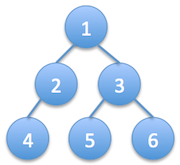

The output should be:

    1
    2 3
    4 5 6
    
### Solution

It won’t be practical to solve this problem using recursion, because recursion is similar to depth first search, but what we need here is breadth first search. So we will use a queue as we did previously in breadth first search. First, we’ll push the root node into the queue. Then we start a while loop with the condition queue not being empty. Then, at each iteration we pop a node from the beginning of the queue and push its children to the end of the queue. Once we pop a node we print its value and space.

To print the new line in correct place we should count the number of nodes at each level. We will have 2 counts, namely current level count and next level count. Current level count indicates how many nodes should be printed at this level before printing a new line. We decrement it every time we pop an element from the queue and print it. Once the current level count reaches zero we print a new line. Next level count contains the number of nodes in the next level, which will become the current level count after printing a new line. We count the number of nodes in the next level by counting the number of children of the nodes in the current level. Understanding the code is easier than its explanation:

In [61]:
class Node:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val =  val 

def levelOrderPrint(tree):
    if not tree:
        return
    nodes=collections.deque([tree])
    currentCount, nextCount = 1, 0
    while len(nodes)!=0:
        currentNode=nodes.popleft()
        currentCount-=1
        print(currentNode.val, end= " ")
        if currentNode.left:
            nodes.append(currentNode.left)
            nextCount+=1
        if currentNode.right:
            nodes.append(currentNode.right)
            nextCount+=1
        if currentCount==0:
            #finished printing current level
            print(''),
            currentCount, nextCount = nextCount, currentCount

In [63]:
import collections

root = Node(1)
l = root.left = Node(2)
r = root.right = Node(3)

l.left = Node(4)
l.right = Node(8)

r.left = Node(3)
r.right = Node(float('-inf'))
r = r.right

r.right = Node(27)

levelOrderPrint(root)

1 
2 3 
4 8 3 -inf 
27 


The time complexity of this solution is O(N), which is the number of nodes in the tree, so it’s optimal. Because we should visit each node at least once. The space complexity depends on maximum size of the queue at any point, which is the most number of nodes at one level. The worst case occurs when the tree is a complete binary tree, which means each level is completely filled with maximum number of nodes possible. In this case, the most number of nodes appear at the last level, which is (N+1)/2 where N is the total number of nodes. So the space complexity is also O(N). Which is also optimal while using a queue.

Again, this is a very common tree interview question!

## BST Interview 3: Trim a Binary Search Tree

Given the root of a BST and 2 numbers min and max, trim the tree such that all the numbers in the new tree are between min and max (inclusive). The resulting tree should still be a valid BST.

If given the left tree and min = 5 and max = 13, the result should be:

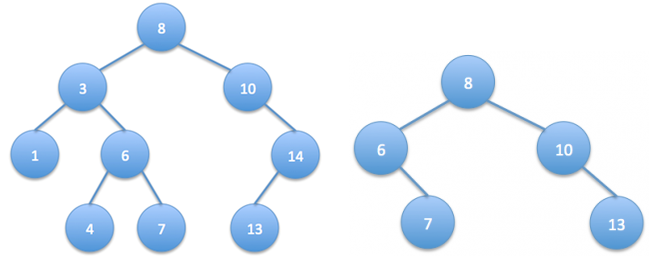

### Solution

We can do this by performing a post-order (left > right > root) traversal of the tree. We first process the left children, then right children, and finally the node itself. So we form the new tree bottom up, starting from the leaves towards the root. As a result while processing the node itself, both its left and right subtrees are valid trimmed binary search trees (may be NULL as well).

At each node we’ll return a reference based on its value, which will then be assigned to its parent’s left or right child pointer, depending on whether the current node is left or right child of the parent. If current node’s value is between min and max (min<=node<=max) then there’s no action need to be taken, so we return the reference to the node itself. If current node’s value is less than min, then we return the reference to its right subtree, and discard the left subtree. Because if a node’s value is less than min, then its left children are definitely less than min since this is a binary search tree. But its right children may or may not be less than min we can’t be sure, so we return the reference to it. Since we’re performing bottom-up post-order traversal, its right subtree is already a trimmed valid binary search tree (possibly NULL), and left subtree is definitely NULL because those nodes were surely less than min and they were eliminated during the post-order traversal. Remember that in post-order traversal we first process all the children of a node, and then finally the node itself.

Similar situation occurs when node’s value is greater than max, we now return the reference to its left subtree. Because if a node’s value is greater than max, then its right children are definitely greater than max. But its left children may or may not be greater than max. So we discard the right subtree and return the reference to the already valid left subtree. The code is easier to understand:

In [2]:
def trimBST(tree, minVal, maxVal): 
    
    if not tree: 
        return 
    
    tree.left=trimBST(tree.left, minVal, maxVal) # left first
    tree.right=trimBST(tree.right, minVal, maxVal) # then right
    
    if minVal<=tree.val<=maxVal: # then center
        return tree 
    
    if tree.val<minVal: # if val < min, then left definitely not, so return any surviving right trees OR None
        return tree.right 
    
    if tree.val>maxVal: # if val > max, then right definitely not, so return any surviving left trees OR None
        return tree.left 

The complexity of this algorithm is O(N), where N is the number of nodes in the tree. Because we basically perform a post-order traversal of the tree, visiting each and every node one. This is optimal because we should visit every node at least once. This is a very elegant question that demonstrates the effectiveness of recursion in trees.

# Searching

In Python when we do "element **in** list", we are doing searching. But we want to know what goes on algorithmically.

## Sequential Search

This **sequential searching** is a basic searching technique which sequentially goes through the data structure, comparing elements as you go along.
<div>&nbsp;</div>
<div>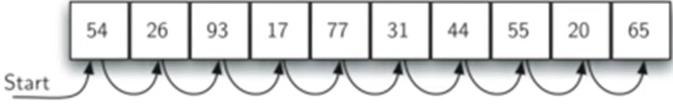</div>

If the list is ordered, we know we only have to search until we reach an element which is a match (it exists), or we reach an element which is greater than our search target (not exist) and then stop.
<div>&nbsp;</div>
<div>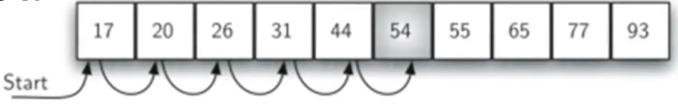</div>

<div>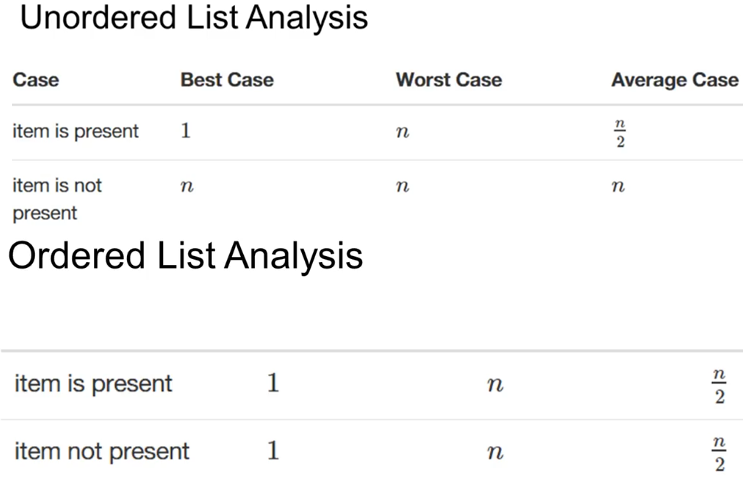</div>

In [13]:
# for both types of lists
def seq_search(arr,ele):
    
    pos = 0 # position
    found = False

    while pos < len(arr) and not found:
        if arr[pos] == ele:
            found = True
        else:
            pos += 1
    
    return found

# for Ordered lists
def ordered_seq_search(arr,ele):
    
    pos = 0 # position
    found = False
    stopped = False

    while pos < len(arr) and not found and not stopped:
        if arr[pos] == ele:
            found = True
        else:
            if arr[pos] > ele:
                stopped = True
            else:
                pos += 1
    
    return found

In [28]:
arr = [3,5,6,2,4,1,9,8]
print(seq_search(arr,6), seq_search(arr,11))

ord_arr = sorted(arr)
print(ordered_seq_search(arr,6), ordered_seq_search(arr,11))
print(ordered_seq_search(ord_arr,6), ordered_seq_search(ord_arr,11))
%timeit seq_search(arr,6) # 3rd, true
%timeit seq_search(arr,11) # all, false
%timeit ordered_seq_search(arr,6) # 3rd, true
%timeit ordered_seq_search(arr,11) # all, false
%timeit ordered_seq_search(ord_arr,6) # 6th, true
%timeit ordered_seq_search(ord_arr,3) # 3rd, true
%timeit ordered_seq_search(ord_arr,11) # all, false

True False
True False
True False
389 ns ± 4.58 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
849 ns ± 6.78 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
449 ns ± 0.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.07 µs ± 7.81 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
822 ns ± 21.5 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
447 ns ± 1.07 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.07 µs ± 9.72 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Binary Search

A **binary search** takes advantage of the ordered list: instead of searching it sequentially, it will start by examining the middle item.
- If the middle is that item, you found it.
- If item > middle, then you know it is in the top half. The entire lower half of the list including the middle can be eliminated.
- If item < middle, then opposite.

Hence, it can be said that binary search uses **divide and conquer**. Each comparison eliminates about half of the remaining items from consideration. Then, the max number of comparisons this algorithm will require to check the entire list is:
<div>&nbsp;</div>
<div>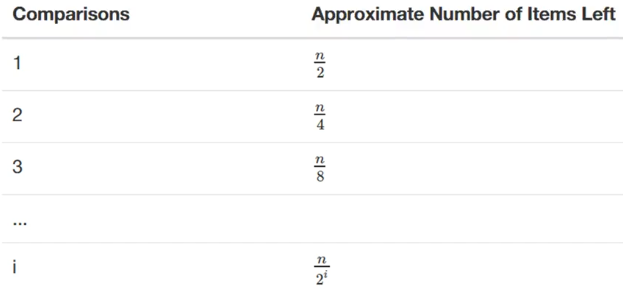</div>

There are 2 ways: **reiterative** and **recursive** binary searches.

In [41]:
# Reiterative Binary Search
def binary_search(arr,ele):
    
    first = 0
    last = len(arr)-1
    found = False
    
    while first <= last and not found:
        mid = (first+last)//2
        if arr[mid] == ele: # if ele = middle
            found = True
        else:
            if ele < arr[mid]: # if ele < middle
                last = mid-1
            else: # if ele > middle
                first = mid+1
                
    return found

# Recursive Binary Search
def rec_bin_search(arr,ele):
    # Base Case
    if len(arr) == 0:
        return False
    # Recursive
    else:
        mid = len(arr)//2
        if arr[mid] == ele:
            return True
        else:
            if ele < arr[mid]:
                return rec_bin_search(arr[:mid],ele)
            else:
                return rec_bin_search(arr[mid+1:],ele)

In [42]:
# remember binary search is for SORTED arrays
arr = [1,2,3,4,5,6,7,8,9,10,11]
print(binary_search(arr,4), binary_search(arr,13))
print(rec_bin_search(arr,4), rec_bin_search(arr,13))

True False
True False


## Hashing

Previously, we learnt how to improve search by knowing about those structures. But **hashing** is when we build a data structure that can be searched in constant O(1) time.

A **hash table** is a collection of items which are stored in such a way as to make it easier to find later. Each position of the hash table is called **slots**, can hold an item and is named by an integer value starting at 0. For example, we have a slot named 0, a slot named 1, a slot named 2 etc. When first implemented, the hash table contains no items so every slot is empty.

We can implement a hash table by using a list with each element initialised to the special Python value **None**. For example, below is an empty hash table with size m = 11.

<div>&nbsp;</div>
<div>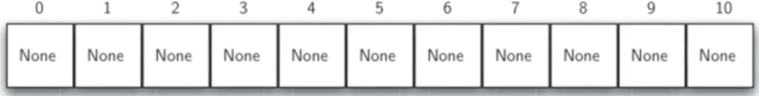</div>

The mapping between an item and its slot in the hash table is called the **hash function**. It takes any item in the collection and returns an integer in the range of slot names, between 0 and m-1.

One hash function we can use is the **remainder method**. When presented with an item, the hash function is the item divided by the table size, then this is its slot number. 

<ins>Example</ins>

Assume you have a set of integers: 54, 26, 93, 17, 77, 31. We have a preassigned empty hash table of m = 11. Our remainder hash function is then: **h(item) = item % 11**. Hence:

    Item: Hash Value
    54 : 10
    26 : 4
    93 : 5
    17 : 6
    77 : 0
    31 : 9
    
We are then ready to occupy 6 out of the 11 slots. This is referred to as the **load factor**, and is commonly denoted as $\lambda$ = $\frac{number of items}{table size}$. For this example, $\lambda$ = $\frac{6}{11}$.

<div>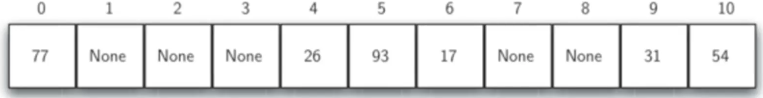</div>

From the hash function, it gives you the positions as you can see above.

When we want to search for an item, we simply use the hash function to compute the slot name for the item, and then check the hash table to see if it is present. This search operation is O(1), since a constant amount of time is required to compute the hash value and then index the hash table at that location.

But what if we have a **collision / clash**, e.g. 44%11 and 77%11 are the same. We will learn how to deal with them later.

In summary, a **hash function** that maps each item into a unique slot is referred to as a **perfect hash function**. Our goal is to create such a hash function that minimises the number of collisions, is easy to compute, and evenly distributes the items in the hash table.

### Hash Functions - Folding Method

Another method of the hash function is called the **folding method**, which begins by dividing the item into equal-sized pieces (the last piece may not be equal size). These pieces are then added together to give the resulting hash value.

If our item was 436-555-4601, we would:
1. Take the digits and divide them into groups of 2: (43, 65, 55, 46, 01).
2. Sum these numbers 43 + 65 + 55 + 46 + 01 = 210.
3. Assume hash table has 11 slots. Then do a modulus: 210 % 11 = 1. So the phone number 436-555-4601 hashes to slot 1.

### Hash Functions - Mid Square Method

For the **mid-squared method**, we first square the item, then extract some portion of the resulting digits.

If our item was 44, we would:
1. Computer 44 ^ 2 = 1936.
2. Extract the middle two digits 93, and modulo it: 93 % 11 = 5.

### Non-Integer Elements

We can also handle strings. For Python, we can easily convert each alphabet into its **ordinal value**. Just type _ord('c')_ and you will get the value 99.

1. ord('each_letter')
2. Sum all ordinal values, and modulo it.

### Collision Resolution

One method for resolving collisions looks into the hash table and tries to find another open slot to hold the item. We could start at the original hash value position and then move in a sequential manner through the slots until we encounter the first slot that is empty. This process is called **open addressing** in that it tries to find the next open slot or address in the hash table. By systematically visting each slot one at a time, we are performing an open addressing technique called **linear probing**.

So assume you have to add 44, 55, and 20 into the first table. Remember that the first two % 11 = 0, while 20 % 11 = 9. You will follow those steps and result in the bottom table.

<div>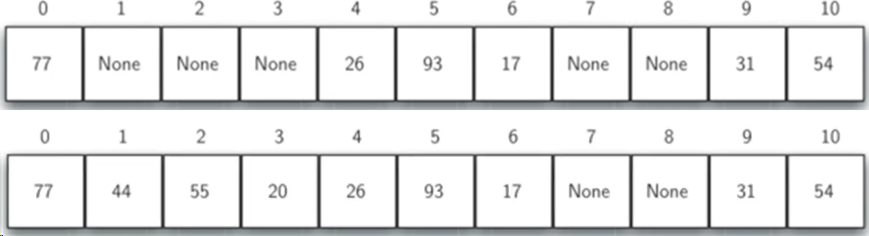</div>

However, note that the 3 numbers all **cluster** at the front. One way to deal with clustering is to skip slots, thereby creating more evenly distributed items.
<div>&nbsp;</div>
<div>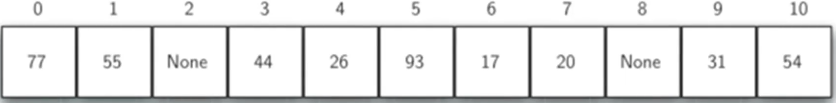</div>

The general name for the process of looking for another slot after a collision is **rehashing**. A variation of the linear probing idea is called **quadratic probing**, where instead of using a constant "skip" value (here it's 1), we use a rehash function that increments the hash value by 1, 3, 5, 7, 9 and so on. This means that if the first hash value is h, then the successive values are h+1, h+4, h+9, h+16 and so on.

**ALTERNATIVELY**, we can handle collisions by allowing each slot to hold a reference to a collection / chain of items. **Chaining** allows many items to exist at the same location in the hash table. When collisions happen, the item is still placed in the proper slot of the hash table.

<div>&nbsp;</div>
<div>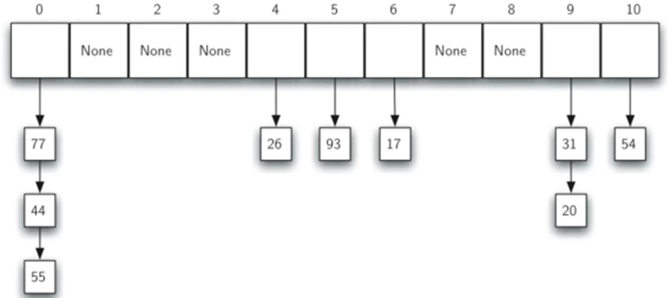</div>

### Map

The idea of a dictionary used as a hash table to get and retrieve items using **keys** is often referred to as **mapping**. We have:
- **HashTable()** that creates a new empty map. Returns an empty map collection.
- **put(key,val)** adds a new key-value pair to the map. If the key already exists, then replace the old value with the new value.
- **get(key)** returns the value stored in the map or None.
- **del** deletes a key-value pair from the map with: _del map[key]_.
- **len()** returns the number of key-value pairs stored.
- **in**: returns True for a statement of the form **"key in map"** if the given key is in this map.

In [53]:
class HashTable(object):
    
    def __init__(self,size):
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self,key,data):
        hashvalue = self.hashfunction(key,len(self.slots)) # use the modulo to get the hashvalue
        if self.slots[hashvalue] == None: # if empty, then use it
            self.slots[hashvalue] = key
            self.data[hashvalue] = data
        else: # if slot not empty
            if self.slots[hashvalue] == key: # the value inside is same as key, replace its data
                self.data[hashvalue] = data
            else: # if both values not the same find next slot
                nextslot = self.rehash(hashvalue,len(self.slots)) # just jumps to next slot on the right
                while self.slots[nextslot] != None and self.slots[nextslot] != key: # if that slot not empty AND the value inside is != as key
                    nextslot = self.rehash(nextslot,len(self.slots)) # jump to next slot
                if self.slots[nextslot] == None: # but if that slot is empty, use it
                    self.slots[nextslot] = key
                    self.data[nextslot] = data
                else: # if that slot is not empty, but value inside = key (like 77 and 77), replace data
                    self.data[nextslot] = data
        
    def hashfunction(self,key,size): # using remainder method (modulo)
        return key % size

    def rehash(self,oldhash,size):
        return (oldhash+1) % size
    
    def get(self,key):
        startslot = self.hashfunction(key,len(self.slots)) # start from where it'd have normall been if no collision
        data = None
        stop = False
        found = False
        position = startslot
        while self.slots[position] != None and not found and not stop: # repeat if there is something, and/or found, and/or stopped
            if self.slots[position] == key: # once you find the matching keys
                found = True # terminate loop
                data = self.data[position] # retrieve the data from this key's position
            else: # if not
                position = self.rehash(position,len(self.slots)) # jump to next position
                if position == startslot: # but if you've gone through the entire length and cannot find (aka doesn't exist)
                    stop = True # stop searching
        return data
    
    def __getitem__(self,key):
        return self.get(key)
    
    def __setitem__(self,key,data):
        self.put(key,data)
        
# NOTE, these special dunder methods allow us to use the brackets! mytable[x]
# You can mess around with rehash() to try the other methods.
# IRL, you don't need to implement your own hash tables since Python has dicts and other stuff.

In [55]:
h = HashTable(5)

h[1] = 'one'
h[2] = 'two'
h[3] = 'three'
print(h[1], h[2], h[3], h[6], h.size)
h[1] = 'new_one'
print(h[1], h[2], h[3], h[6], h.size)

one two three None 5
new_one two three None 5


# Sorting

There are 6 main algorithms for sorting: bubble, selection, insertion, shell, merge, and quick.

Common interview questions consist of implementing a sorting algorithm. IRL, you don't have to implement your own ones since the best ones already exist, but you will want to be able to explain verbally, visually, and fully implement one anyway.

https://www.toptal.com/developers/sorting-algorithms

https://visualgo.net/en


## 1. Bubble Sort

The **bubble sort** makes multiple passes through a list. It compares adjacent items and exchanges those that are out of order. Each pass through the list places the next largest value in its proper place = each item "bubbles" up to the location where it belongs.

Basically, compare two items, and the larger one goes right. The first pass n items to sort so there are n-1 pairs of comparisons, while the second pass has n-1 items to sort so there are n-2 pairs of comparisons etc. Therefore, we do this entire iteration **n-1 times** and for each iteration, there is **n-k times** of comparisons, i.e. we need to compare pairs and shift the larger one n-k times, and this happens n-1 times.

In [38]:
def bubble_sort(arr):
    for n in range(len(arr)-1,0,-1):
        print(f'\nn is {n}')
        for k in range(n): # ascending so you start at the first index
            print(f'> k index is {k}')
            print(f'> {arr[k]} vs {arr[k+1]}')
            if arr[k] > arr[k+1]:
                temp = arr[k]
                arr[k] = arr[k+1]
                arr[k+1] = temp
                print(f'>> {arr[k]} swapped {arr[k+1]}')
            else:
                print('>>> no change')
    return arr

In [42]:
arr=[1,14312,-3,9994,2134135]
list(range(len(arr)-1,0,-1)) # we only need to do n-1 times
print(bubble_sort(arr))
print("#"*100)
arr = [3,2,13,4,6,5,7,8,1,20]
print(bubble_sort(arr))


n is 4
> k index is 0
> 1 vs 14312
>>> no change
> k index is 1
> 14312 vs -3
>> -3 swapped 14312
> k index is 2
> 14312 vs 9994
>> 9994 swapped 14312
> k index is 3
> 14312 vs 2134135
>>> no change

n is 3
> k index is 0
> 1 vs -3
>> -3 swapped 1
> k index is 1
> 1 vs 9994
>>> no change
> k index is 2
> 9994 vs 14312
>>> no change

n is 2
> k index is 0
> -3 vs 1
>>> no change
> k index is 1
> 1 vs 9994
>>> no change

n is 1
> k index is 0
> -3 vs 1
>>> no change
[-3, 1, 9994, 14312, 2134135]
####################################################################################################

n is 9
> k index is 0
> 3 vs 2
>> 2 swapped 3
> k index is 1
> 3 vs 13
>>> no change
> k index is 2
> 13 vs 4
>> 4 swapped 13
> k index is 3
> 13 vs 6
>> 6 swapped 13
> k index is 4
> 13 vs 5
>> 5 swapped 13
> k index is 5
> 13 vs 7
>> 7 swapped 13
> k index is 6
> 13 vs 8
>> 8 swapped 13
> k index is 7
> 13 vs 1
>> 1 swapped 13
> k index is 8
> 13 vs 20
>>> no change

n is 8
> k index is 0
> 2 

## 2. Selection Sort

The **selection sort** is an improvement over the bubble sort as it makes only one exchange for every pass through the list. It looks for the largest value as it makes a pass and after completing that pass, it places it in the proper location by **swapping**.

Hence after the first pass, the largest item is in correct place. After the second pass, the next largest is in place. This continues for **n-1 passes** to sort **n** items, since the final item is automatically in place after the (n-1)st pass.

You can program your algorithm to find largest and place it to the right, or find smallest and place it to the left.

In [45]:
def selection_sort(arr):
    # for every slot in array
    for fillslot in range(len(arr)-1,0,-1):
        positionOfMax = 0
        # for every set of 0 to fillslot+1
        for location in range(1,fillslot+1): # fillslot+1 is the number of elements we still need to check
            if arr[location] > arr[positionOfMax]: # checks one by one if each ele is bigger than the currentmax. the first iteration is always check if 2nd ele > 1st ele.
                positionOfMax = location
        temp = arr[fillslot] # once you finish the above loop, you know where is the currentmax. so swap it around. arr[fillslot] is the element at the end.
        arr[fillslot] = arr[positionOfMax]
        arr[positionOfMax] = temp
    return arr

In [47]:
arr = [3,5,2,7,6,8,12,40,21]
selection_sort(arr)

[2, 3, 5, 6, 7, 8, 12, 21, 40]

## 3. Insertion Sort

The **insertion sort** always maintains a sorted sublist in the lower positions of the list. Each new item is then "inserted" back into the previous sublist such that the sorted sublist is one item larger.

We begin by assuming that a list with one item (position 0) is already sorted. On each pass, one for each item 1 through n-1, the current item is checked against those in the already sorted sublist. As we look back into the already sorted sublist, we shift those items that are greater to the right. When we reach a smaller item or the end of the sublist, the current item can be inserted.

This insertion sort builds the final sorted array one item at a time. It is much less efficient on large lists than more advanced algorithms such as quicksort, heapsort, or merge sort.

<div>&nbsp;</div>
<div>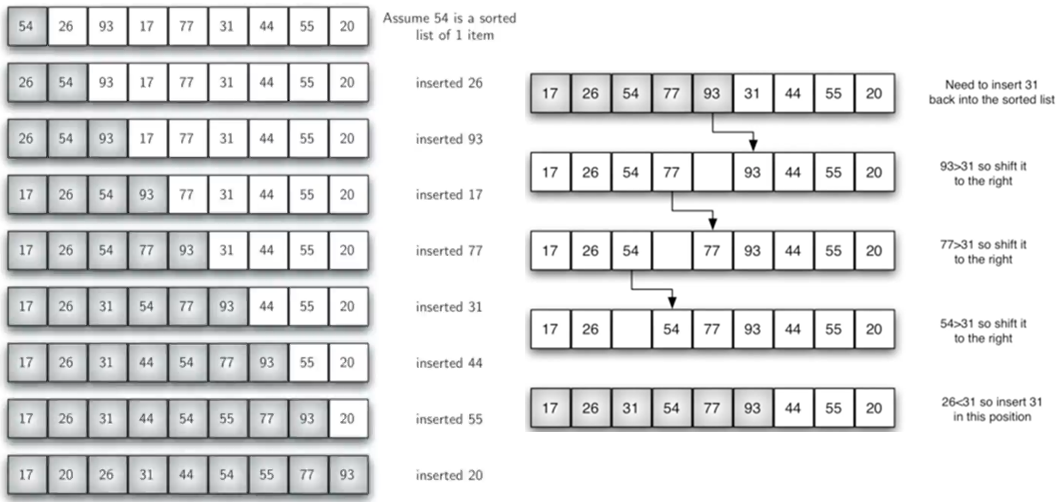</div>

In [48]:
def insertion_sort(arr):
    
    for i in range(1,len(arr)): # there are n-1 passes to solve n items
        currentvalue = arr[i]
        position = i
        
        while position > 0 and arr[position-1] > currentvalue: # if the number before you is bigger than you
            arr[position] = arr[position-1] # move this larger number to your place
            position = position - 1
        arr[position] = currentvalue
    
    return arr

In [49]:
arr =[3,5,4,6,8,1,2,12,41,25]
insertion_sort(arr)

[1, 2, 3, 4, 5, 6, 8, 12, 25, 41]

## 4. Shell Sort

The **shell sort** improves on the insertion sort by breaking the original list into a number of smaller sublists. The unique way that these sublists are chosen is the key to the shell sort - instead of breaking the list into sublists of contiguous items, the shell sort uses an increment "i" (also called a **gap**) to create a sublist by choosing all items that are "i" items apart.

Given a list of 9 items, and if you use an increment of 3, then there are three sublists, and each of which can be sorted by an insertion sort for the shaded boxes only. By doing the insertion sorts for those three shaded boxes, you will get the second picture, then pull them all down to a single row. This list is not fully sorted yet, but it's closer to the final answer. 

<div>&nbsp;</div>
<div>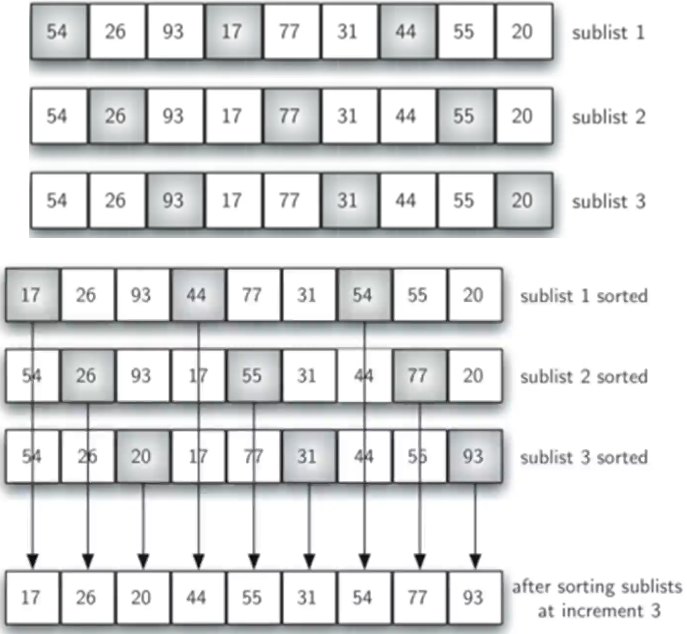</div>

Using the new row, you do an insertion sort again with an increment of 1. And by actually doing the above, you reduce the total number of shifting operations necessary to get the final order.

<div>&nbsp;</div>
<div>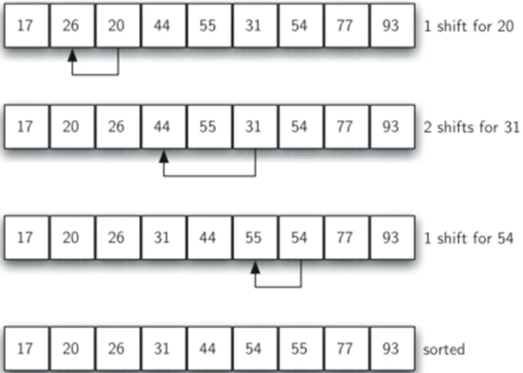</div>

This picture depicts how to select those unique numbers to be sorted in that sublist. You can start a first case with $\frac{n}{2}$ sublists, and on the next pass perform $\frac{n}{4}$ and etc. and eventually a single list is sorted with the basic insertion sort.

<div>&nbsp;</div>
<div>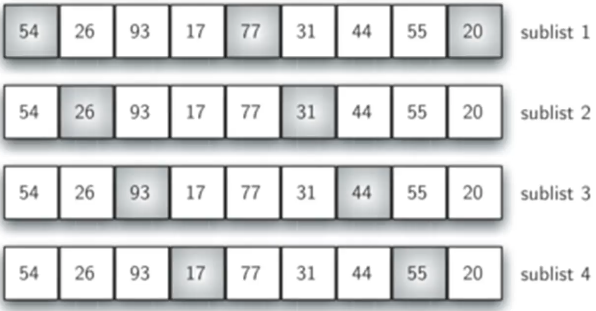</div>

In [58]:
def shell_sort(arr):
    sublistcount = len(arr)//2
    while sublistcount > 0:
        for start in range(sublistcount):
            gap_insertion_sort(arr,start,sublistcount) # sublistcount is gap. this line insertions sorts each sublist.
        print(f'After increments of size: {sublistcount}')
        print(f'The list is {arr}')
        sublistcount = sublistcount//2
    return arr

def gap_insertion_sort(arr,start,gap): # where sublistcount is gap
    for i in range(start+gap,len(arr),gap): # this entire below is exactly the same as insertion sorting, just increment by gap instead of default 1.
        currentvalue = arr[i]
        position = i
        while position >= gap and arr[position-gap] > currentvalue: # insertion sorting. while 2nd element > 1st element, switch places. 
            arr[position] = arr[position-gap]
            position = position - gap
        arr[position] = currentvalue

In [59]:
arr = [45,67,23,45,21,24,7,2,6,4,90] # 11 letters
shell_sort(arr)

After increments of size: 5
The list is [24, 7, 2, 6, 4, 45, 67, 23, 45, 21, 90]
After increments of size: 2
The list is [2, 6, 4, 7, 24, 21, 45, 23, 67, 45, 90]
After increments of size: 1
The list is [2, 4, 6, 7, 21, 23, 24, 45, 45, 67, 90]


[2, 4, 6, 7, 21, 23, 24, 45, 45, 67, 90]

## 5. Merge Sort

This is a recursive algorithm that continually splits a list in half. If the list is empty or has one item, it is sorted by definition (the base case). The if the list has more than one item, we split the list and recursively invoke a merge sort on both halves.

Once the two halves are sorted, the fundamental operation called a **merge** is performed. Merging is the process of taking two smaller sorted lists and combining them together into a single sorted new list.

<div>&nbsp;</div>
<div>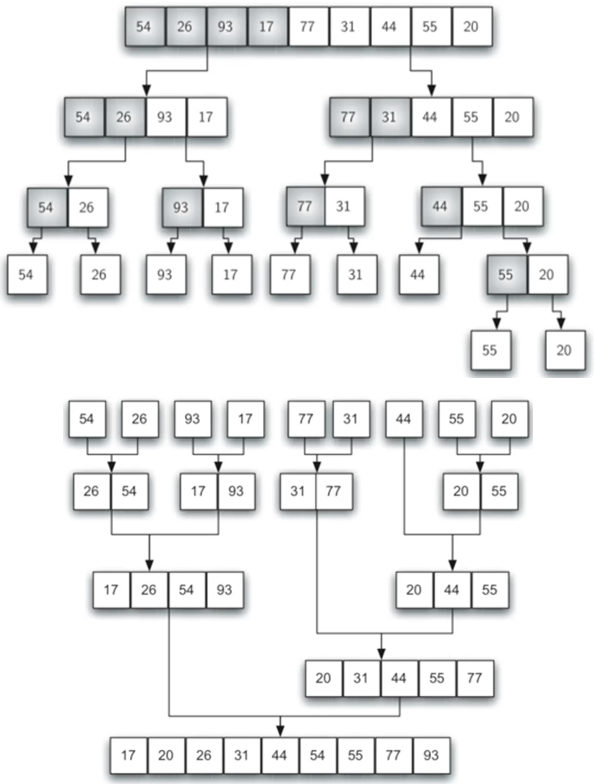</div>

In [2]:
def merge_sort(arr):
    
    if len(arr) > 1: # because no need to do this if only 1 ele
        mid = len(arr)//2
        lefthalf = arr[:mid]
        righthalf = arr[mid:]
        merge_sort(lefthalf) # keep on splitting half until 1 ele. if 1 ele, this code wouldn't run anymore cos if len > 1 only!
        merge_sort(righthalf)
        
        i = 0 # for the left half
        j = 0 # for the right half
        k = 0 # for the array
        
        # all these below is to merge two smaller sorted lists into a larger sorted list
        while i < len(lefthalf) and j < len(righthalf): # means if there are unsorted eles (more than 1)
            if lefthalf[i] < righthalf[j]: # if left < right (good), assign first index to this smaller number
                arr[k] = lefthalf[i]
                i += 1 # used up a lefthalf ele
            else: # if not, the first element will be the ele from the righthalf
                arr[k] = righthalf[j]
                j += 1 # used up a righthalf ele
            k += 1 # move to next index in array
        
        # to handle cases where only 1 ele left to assign into array
        while i < len(lefthalf):
            arr[k] = lefthalf[i]
            i += 1
            k += 1    
        while j < len(righthalf):
            arr[k] = righthalf[j]
            j += 1
            k += 1
    
    print(f'Merging {arr}')
    return arr

In [3]:
arr = [11,2,5,4,7,56,2,12,23]
merge_sort(arr)

Merging [11]
Merging [2]
Merging [2, 11]
Merging [5]
Merging [4]
Merging [4, 5]
Merging [2, 4, 5, 11]
Merging [7]
Merging [56]
Merging [7, 56]
Merging [2]
Merging [12]
Merging [23]
Merging [12, 23]
Merging [2, 12, 23]
Merging [2, 7, 12, 23, 56]
Merging [2, 2, 4, 5, 7, 11, 12, 23, 56]


[2, 2, 4, 5, 7, 11, 12, 23, 56]

## 6. Quick Sort

The **quick sort** uses divide and conquer as well to gain the same advantages as merge sort, while not using additional storage. As a trade-off however, it is possible that the list may not be divided in half. When this happens, the performance is diminished.

A quick sort first select a value called the **pivot value**. Its role is to assist with splitting the list. The actual position where the pivot value belongs in the final sorted list, commonly called the **split point**, will be used to divide the list for subsequent calls to the quick sort.

Assume that 54 is our first pivot value. The **partition** process will then happen to find the split point and at the same time, move other items to the appropriate side of the list, either less than or greater than the pivot value. There will also be a **leftmark** and **rightmark** that converge to the split point as the pivot value heads towards it as well.

The leftmark first begins at 26. Since 26 < 54, the leftmark goes to the right. Then since 93 > 54, we stop. The rightmark at 20 will then say 20 < 54, so it will stop. Whenever the leftmark > PV or rightmark < PV, stop, and prepare for exchange.

The next step will be to exchange those two values at the leftmark and rightmark.

Then we continue on moving the leftmark and rightmark as follows. We continue everything until they **cross each other** and the rightmark < leftmark. We then say we found our **split point**. We then exchange our PV with the split point (rightmark). 

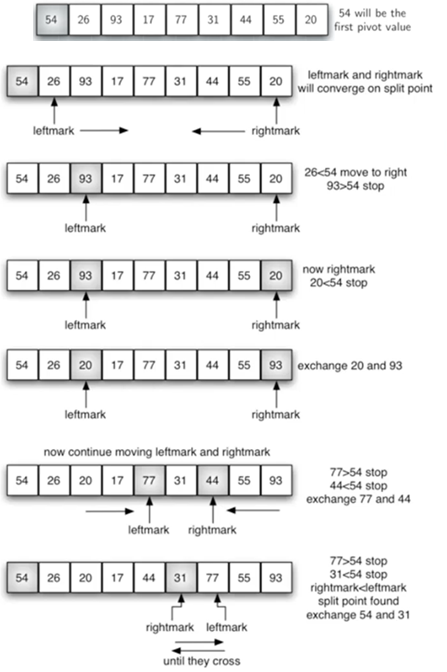

In [7]:
def quick_sort(arr):
    quick_sort_help(arr,0,len(arr)-1)
    return arr

def quick_sort_help(arr,first,last): # this is basically merge sort
    if first < last: # execute only if leftmark < rightmark
        splitpoint = partition(arr,first,last)
        quick_sort_help(arr,first,splitpoint-1)
        quick_sort_help(arr,splitpoint+1,last)

def partition(arr,first,last):
    pivotvalue = arr[first]
    leftmark = first + 1
    rightmark = last
    done = False
    while not done:
        while leftmark <= rightmark and arr[leftmark] <= pivotvalue:
            leftmark += 1 # advance leftmark if no cross + sorted already
        while arr[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark -= 1 # advance rightmark if no cross + sorted already
        if rightmark < leftmark:
            done = True # stop advancing if cross
        else: # if no cross yet and both stopped, do the switch
            temp = arr[leftmark]
            arr[leftmark] = arr[rightmark]
            arr[rightmark] = temp
    temp = arr[first] # if crossed, swap the PV and the rightmark. This works cos if list is sorted, it'll swap itself in and out. Will always swap a value <= the PV.
    arr[first] = arr[rightmark]
    arr[rightmark] = temp
    return rightmark # the number here is at its correct spot. return it, and repeat for the sublists on its left and right.

In [8]:
arr = [2,5,4,6,7,3,1,4,12,11]
quick_sort(arr)

[1, 2, 3, 4, 4, 5, 6, 7, 11, 12]

## Searching & Sorting Interview Problems

Most common interview questions for sorting are just implementation questions. One key note is that you have to know binary search well because sometimes they will ask you to USE it to get an answer rather than just implementing it.

### Sorting Interview 1: Implement Binary Search

As above.

### Sorting Interview 2: Bubble Sort

As above.

### Sorting Interview 3: Selection Sort

As above.

### Sorting Interview 4: Insertion Sort

As above.

### Sorting Interview 5: Shell Sort

As above.

### Sorting Interview 6: Merge Sort

As above.

### Sorting Interview 7: Quick Sort

As above.

# Graphs

**Graphs** are a more general structure than trees _(but we can think of a tree as a special kind of graph)_. They can be used to represent many real-world things like systems of roads, airline flights from city to city, how the Internet is connected etc. Once we have a good representation for a problem, we can use some standard graph algorithms to solve what otherwise might seem to be a very difficult problem. Furthermore, computers operate well with information presented as a graph. 

<div>&nbsp;</div>
<div>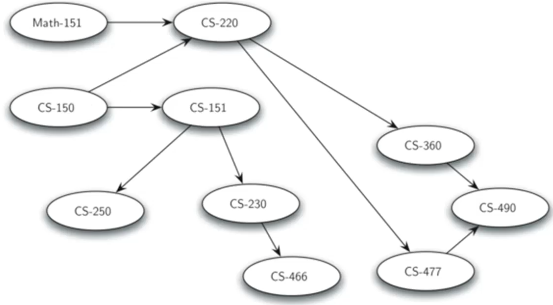</div>

_Picture of a graph on the requirements for a CS degree._

<ins>Jargon</ins>
- A **vertex / node** is a fundamental part of a graph. It can also have a name called **key**, and other additional information called **payload**.
- An **edge** connects two vertices to show that there is a relationship between them. They can be **one-way** or **two-way**. If all the edges in a graph are one-way, then that is a **directed graph / digraph**. The above picture is an example of a digraph, where you must take some classes before others.
- Edges may be **weighted** to show that there is a **cost** to go from one vertex to another. For example, in a graph of roads that connect one city to another, the weight on the edge might represent the distance between the two cities.
- A **path** is a sequence of vertices that are connected by edges. We would define a path as **$w_{1}$,$w_{2}$,...,$w_{n}$** such that **($w_{i}$, $w_{i+1}$)∈E** for all **1$\leq$i$\leq$n-1**.
    - The unweighted path length is the number of edges in the path, which is **n-1**.
    - The weighted path length is the sum of the weights of all edges in the path.
- A **cycle** in a directed graph is a path that starts and ends at the same vertex. A graph with no cycles is called an **acyclic graph**. A directed graph with no cycles is called a **directed acyclic graph / DAG**. A DAG is useful in solving several important problems.

<ins>Formal Definition</ins>
- A graph is represented by **G** where **G = (V, E)**.
- For the graph **G**, **V** is a set of vertices and **E** is a set of edges.
- Each edge is a tuple **(v, w)** where **v,w ∈ V**. AKA v and w are vertices / nodes that already exist, and an edge is just (v,w).
- We can add a third component to the edge tuple to represent a weight.
- A subgraph **s** is a set of edges **e** and verticies **v** such that **e⊂E** and **v⊂V**, i.e. a subgraph is part of its original graph.
<div>&nbsp;</div>
<div>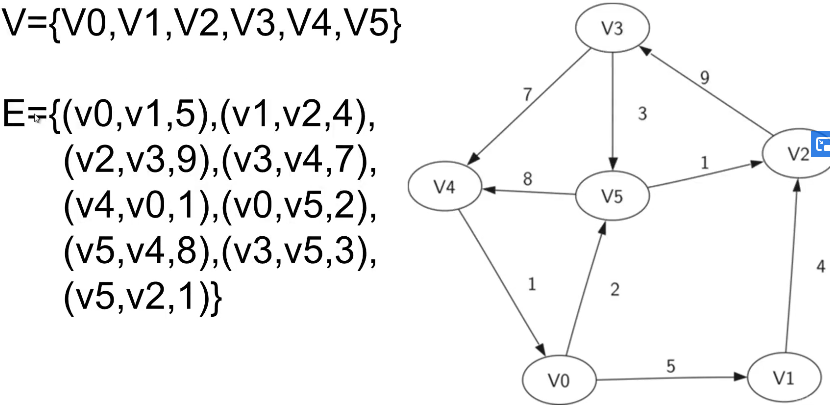</div>

Also:
- The path from **V3** to **V1** is the sequence of vertices **(V3,V4,V0,V1)**. The edges are **{(v3,v4,7),(v4,v0,1),(v0,v1,5)}**.
- The path **(V5,V2,V3,V5)** is a cycle, as it starts and ends on the same vertex.

## Adjacency Matrix & Adjacency Lists

These are basically methods to implement a graph.

### Adjacency Matrix

In this 2D matrix, each of the rows and columns represent a vertex in the graph. The value that is stored in the cell at the intersection of row **v** and column **w** indicates if there is an edge from vertex **v** to vertex **w**. When two vertices are connected by an edge, we say that they are **adjacent**.

<div>&nbsp;</div>
<div>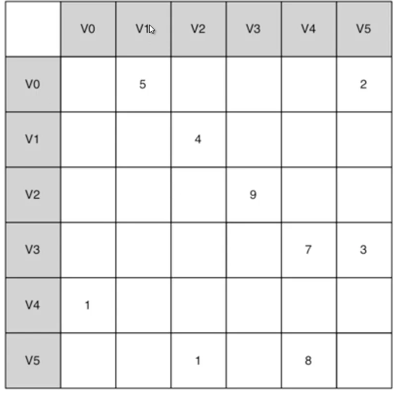</div>

The advantage is that it is simple, and for small graphs it is easy to see which nodes are connected to other nodes. However, notice that most cells are empty, i.e. the matrix is **sparse**. This is not a very efficient way as it stores sparse data.

Yet, it is a good implementation for a graph when the number of edges is large. Since there is one row and one column for every vertex in the graph, the number of edges required to fill the matrix is $|V|^2$. A matrix is full when every vertex is connected to every other vertex.

In real life, such graphs while they exist but they are not common. We usually do not use adjacency matrices and so will use adjacency lists instead.

### Adjacency List

This is a more space-efficient way to implement a sparsely connected graph. The implementation is we keep a master list of all the vertices in the Graph object and then each vertex object in the graph maintains a list of the other vertices that it is connected to. 

In our implementations of the Vertex class, we will use a dictionary rather than a list where the dictionary keys are the vertices, and the values are the weights.

<div>&nbsp;</div>
<div>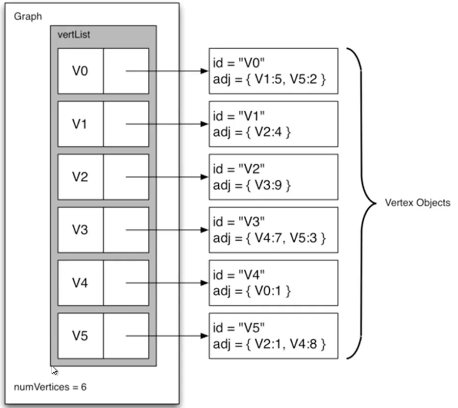</div>

The advantage is that it allows us to compactly represent a sparse graph (no empty spaces), and also allows us to easily find all the links that are directly connected to a particular vertex.

#### Implementation

Using dictionaries, it is easy to implement the adjacency list in Python. In our implementation of the Graph abstract data type we will create two classes: **Graph**, which holds the master list of vertices, and **Vertex**, which will represent each vertex in the graph.

Each Vertex uses a dictionary to keep track of the vertices to which it is connected, and the weight of each edge. This dictionary is called **connectedTo**. The constructor simply initializes the id, which will typically be a string, and the **connectedTo** dictionary. The **addNeighbor** method is used add a connection from this vertex to another. The **getConnections** method returns all of the vertices in the adjacency list, as represented by the **connectedTo** instance variable. The **getWeight** method returns the weight of the edge from this vertex to the vertex passed as a parameter.

In [28]:
class Vertex:
    
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}
    
    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight
    
    def getConnections(self):
        return self.connectedTo.keys()
    
    def getId(self):
        return self.id
    
    def getWeight(self,nbr): # weight of an edge to this nbr
        return self.connectedTo[nbr]
    
    def __str__(self): # happens when you "print"
        return str(self.id) + ' connected to: ' + str([x.id for x in self.connectedTo])

In order to implement a Graph as an Adjacency List what we need to do is define the methods our Adjacency List object will have:

- **Graph()** creates a new, empty graph.
- **addVertex(vert)** adds an instance of Vertex to the graph.
- **addEdge(fromVert, toVert)** Adds a new, directed edge to the graph that connects two vertices.
- **addEdge(fromVert, toVert, weight)** Adds a new, weighted, directed edge to the graph that connects two vertices.
- **getVertex(vertKey)** finds the vertex in the graph named vertKey.
- **getVertices()** returns the list of all vertices in the graph.
- **in** returns True for a statement of the form *vertex in graph*, if the given vertex is in the graph, False otherwise.

In [29]:
class Graph:
    
    def __init__(self):
        self.vertList = {} # adjacency list of vertices (but actually dict)
        self.numVertices = 0
        
    def addVertex(self,key):
        self.numVertices += 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex
    
    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None
    
    def addEdge(self,f,t,cost=0): # from, to, cost
        if f not in self.vertList: # checks if f and t even exist first. if not, create them.
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost) # the actual add edge, using the method from the Vertex class
        
    def getVertices(self):
        return self.vertList.keys()
    
    def __iter__(self):
        return iter(self.vertList.values()) # grab all values in the vertList dict, then make it into an iterable object. So whenever you run "for x in Graph", it will iterate the values in this vertList dict.
    
    def __contains__(self,n):
        return n in self.vertList

In [30]:
g = Graph()

for i in range(6):
    g.addVertex(i)

g.vertList

{0: <__main__.Vertex at 0x1effbe41518>,
 1: <__main__.Vertex at 0x1effbe41128>,
 2: <__main__.Vertex at 0x1effbe412b0>,
 3: <__main__.Vertex at 0x1effbe410b8>,
 4: <__main__.Vertex at 0x1effbe41780>,
 5: <__main__.Vertex at 0x1effbe41898>}

In [32]:
g.addEdge(0,1,2) # add an edge from V0 to V1 with weight 2
g.addEdge(0,2,5)
g.addEdge(4,3,3)

for vertex in g:
    print(vertex)
    print(vertex.getConnections(), "\n")

0 connected to: [1, 2]
dict_keys([<__main__.Vertex object at 0x000001EFFBE41128>, <__main__.Vertex object at 0x000001EFFBE412B0>]) 

1 connected to: []
dict_keys([]) 

2 connected to: []
dict_keys([]) 

3 connected to: []
dict_keys([]) 

4 connected to: [3]
dict_keys([<__main__.Vertex object at 0x000001EFFBE410B8>]) 

5 connected to: []
dict_keys([]) 



## Graphs - Word Ladder Problem

You have to transform the word "FOOL" into the word "SAGE". In a **word ladder puzzle**, you must make the change gradually by changing one letter at a time. At each step, you must transform one word into another word, and you are not allowed to transform a word into a non-word.

    FOOL
    POOL
    POLL
    POLE
    PALE
    SALE
    SAGE

We can solve this problem with a graph algorithm by: (i) representing the relationships between the words as a graph, and (ii) use the graph algorithm known as **breadth first search** to find an efficient path from the starting word to the ending word.

Thus, we must: (i) figure out how to turn a large collection of words into a graph, (ii) there is an edge from one word to another if the two words are only different by a single letter, and (iii) any path from one word to another is a solution to the word ladder puzzle.

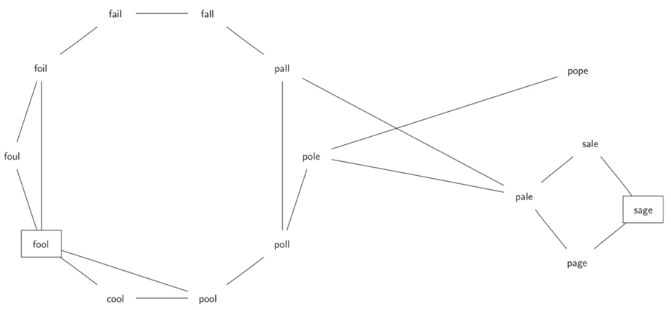

Notice how the edges are unweighted and undirected.

Initially, you might use this method:
- Imagine you have all these words of same length.
- Create a vertex in the graph for every word in the list. 
- To figure out how to connect the words, you would compare each word in the list with every other. If two words differ by only one letter, connect them.

But this method is terrible for large sets of words, and the algorithm is O(n^2) because you have to do a comparison for each word to every other word, as if a nested for loop.

What we can do is instead treat that we have a huge number of buckets, each of them with a four-letter word on the outside, except that one of the letters in the label has been replaced by an underscore, as if it is a **wildcard**.

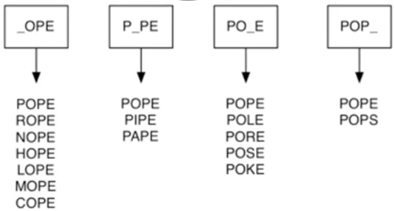

We will then implement this scheme using a dictionary, with labels on the bucket as keys, and the value is the list of words.

Once we have the dictionary built we can create the graph. We start our graph by creating a vertex for each word in the graph, and we create edges between all the vertices we find for words found under the same key in the dictionary.

In [33]:
# THE SAME AS ON TOP
class Vertex:
    def __init__(self,key):
        self.id = key
        self.connectedTo = {}

    def addNeighbor(self,nbr,weight=0):
        self.connectedTo[nbr] = weight

    def __str__(self):
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        return self.connectedTo.keys()

    def getId(self):
        return self.id

    def getWeight(self,nbr):
        return self.connectedTo[nbr]
    
class Graph:
    def __init__(self):
        self.vertList = {}
        self.numVertices = 0

    def addVertex(self,key):
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self,n):
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self,n):
        return n in self.vertList

    def addEdge(self,f,t,cost=0):
        if f not in self.vertList:
            nv = self.addVertex(f)
        if t not in self.vertList:
            nv = self.addVertex(t)
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        return self.vertList.keys()

    def __iter__(self):
        return iter(self.vertList.values())

In [34]:
# THE FOCUS OF THIS SECTION
# Remember key,value is buckets,listofwords
def buildGraph(wordFile):
    d = {}
    g = Graph()
    wfile = open(wordFile,'r') # wordFile containing all the words
    
    # create buckets of words that differ by one letter
    for line in wfile:
        print(line)
        word = line[:-1] # to handle extra linebreaks
        print(word)
        for i in range(len(word)): # [0 1 2 3] for our example
            bucket = word[:i] + '_' + word[i+1:]
            if bucket in d:
                d[bucket].append(word)
            else:
                d[bucket] = [word]
                
    # add vertices and edges for words in the same bucket
    for bucket in d.keys():
        for word1 in d[bucket]:
            for word2 in d[bucket]:
                if word1 != word2:
                    g.addEdge(word1,word2)
                    
    return g

In [51]:
d = {}
d['_OOL'] = [1]
d['_OOL'].append(2)

[x for x in d.items()]

[('_OOL', [1, 2])]

## Breadth First Search (BFS)

https://www.youtube.com/watch?v=s-CYnVz-uh4

We can use BFS as the shortest solution to the word ladder problem. The **breadth first search BFS** is one of the easiest algorithms for searching a graph. It also serves as a prototype for several other important graph algorithms that we will study later.

Given a graph **G** and a starting vertex **s**, a BFS proceeds by exploring edges in the graph to find all the vertices in **G** for which there is a path from **s**. The remarkable thing about BFS is that it finds *all* the vertices that are a distance **k** from **s** before it finds *any* vertices that are a distance **k+1**.

One good way to visualise what the BFS algorithm does is to imagine that it is building a tree, one level of the tree at a time. A BFS adds all children of the starting vertex before it begins to discover any of the grandchildren.

To keep track of its progress, BFS colours each of the vertices white, gray, or black. All the vertices are initialised to white when they are constructed. A white vertex is an undiscovered vertex. When a vertex is initially discovered, it becomes gray. When it is fully discovered, it becomes black. This means that once a vertex is coloured black, it has no white vertices adjacent to it. OTOH, a gray node may have some white vertices adjacent to it, indicating that there are still additional vertices to explore.

<ins>Method</ins>
- BFS begins at the starting vertex **s** and with a gray colour to show that it is currently being explored. 2 other values, the distance and the predecessor, are initialised to 0 and None respectively for this starting vertex.
- A "start" is placed on a Queue.
- The next step is to begin systematically explore vertices at the front of the queue. We explore each new node at the front of the queue by iterating over its adjacency list. As each node on the adjacency list is examined, its colour is checked.
    - If it is white, the vertex is unexplored, and 4 things happen:
        - The new unexplored vertex **nbr** is coloured gray.
        - The predecessor (the "parent") of **nbr** is set to the current node **currentVert**.
        - The distance to **nbr** is set to the distance to **currentVert + 1**.
        - **nbr** is added to the end of the queue. Adding **nbr** to the end of the queue effectively schedules this node for further exploration, but not until all the other vertices on the adjaceny list of **currentVert** have been explored.
        
With BFS, we also solve another problem: we can start at ANY vertex in the BFS tree and follow the predecessor arrows back to the root to find the shortest word ladder from any word back to the start!

## Depth First Search (DFS) and the Knight's Tour Problem

The **knight's tour puzzle** is played on a chess board with a single chess piece, the knight. The objective is to find a sequence of moves that allow the knight to visit every square on the board exactly once.

We will solve the problem using two main steps:
1. Represent the legal moves of a knight on a chessboard as a graph.
2. Use a graph algorithm to find a path of length **rows x columns - 1** where every vertex on the graph is visited at least once.

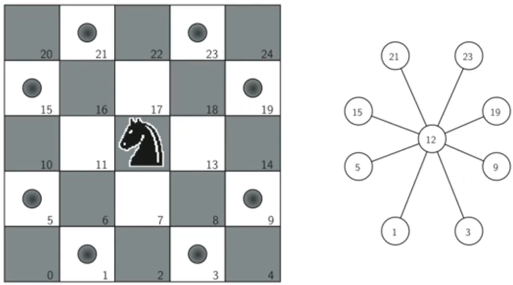
*Take note that despite you see a 5x5 board here, a chess board is actually 8x8. We just want to show where he can go.*

The below picture shows all possible moves on an 8x8 board, with 336 edges exactly. 
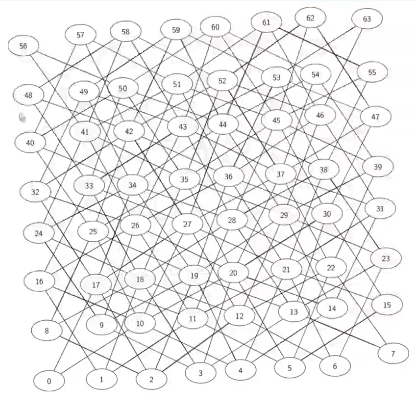

Interesting things to note:
- The vertices at the circumference have fewer edges.
- This is actually quite sparse. If it were fully connected, there would have been 30,468 edges. This means if you had used an adjacency matrix, it would only be 8% full. This drives home why adjacency lists are better.

### Depth First Search (DFS)

The search algorithm we will use is the **depth first search (DFS)**. Whereas in the BFS algorithm which builds a search tree one level at a time, a DFS creates a search tree by exploring one branch of the tree as deeply as possible, i.e. there is **NO BRANCHING**. Interesting note is that a DFS *implicitly* uses a stack, while BFS uses a queue.

There are 2 algorithms that do a DFS:
1. The first one directly solves the knight's tour problem by explicitly forbidding a node to be visited more than once.
2. The second one is more general, but allows nodes to be visited more than once as the tree is constructed.

#### DFS First Algorithm: Only Once

The depth first exploration of the graph is exactly what we need in order to find a path that has exactly 63 edges. We will see that when the depth first search algorithm finds a dead end (a place in the graph where there are no more moves possible), it backs up the tree to the next deepest vertex that allows it to make a legal move.

The **knightTour** function is a recursive function that takes 4 parameters:
- **n**, the current depth in the search tree
- **path**, a list of vertices visited up to this point
- **u**, the vertex in the graph we wish to explore
- **limit** the number of nodes in the path

<ins>Example</ins>
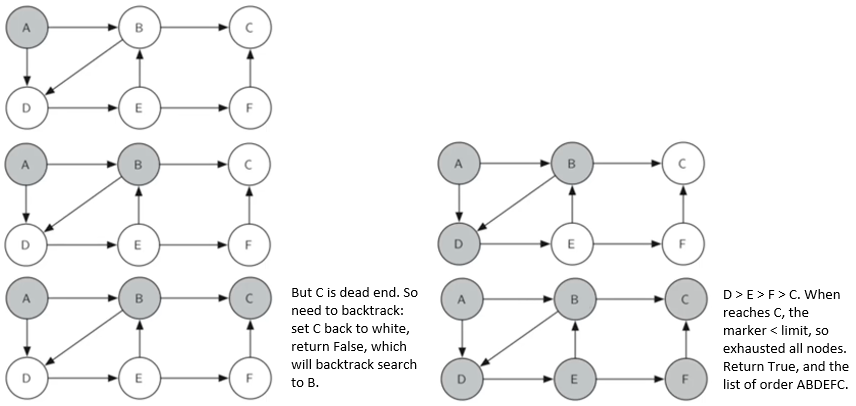

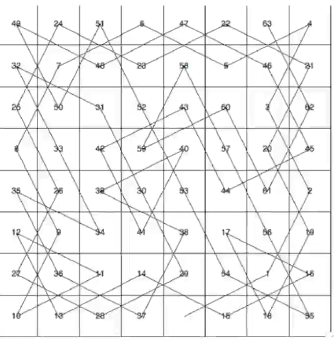

In [52]:
def knightGraph(bdSize):
    ktGraph = Graph()
    for row in range(bdSize):
        for col in range(bdSize):
            nodeId = posToNodeId(row,col,bdSize)
            newPositions = genLegalMoves(row,col,bdSize)
            for e in newPositions:
                nid = posToNodeId(e[0],e[1],bdSize)
                ktGraph.addEdge(nodeId,nid)
    return ktGraph

def posToNodeId(row, column, board_size):
    return (row * board_size) + column

def genLegalMoves(x,y,bdSize):
    newMoves = []
    moveOffsets = [(-1,-2),(-1,2),(-2,-1),(-2,1),
                   ( 1,-2),( 1,2),( 2,-1),( 2,1)]
    for i in moveOffsets:
        newX = x + i[0]
        newY = y + i[1]
        if legalCoord(newX,bdSize) and \
                        legalCoord(newY,bdSize):
            newMoves.append((newX,newY))
    return newMoves

def legalCoord(x,bdSize):
    if x >= 0 and x < bdSize:
        return True
    else:
        return False
    
def knightTour(n,path,u,limit):
        u.setColor('gray')
        path.append(u)
        if n < limit:
            nbrList = list(u.getConnections())
            i = 0
            done = False
            while i < len(nbrList) and not done:
                if nbrList[i].getColor() == 'white':
                    done = knightTour(n+1, path, nbrList[i], limit)
                i = i + 1
            if not done:  # prepare to backtrack
                path.pop()
                u.setColor('white')
        else:
            done = True
        return done

#### DFS Second Algorithm: General DFS

This general DFS is actually easier. Its goal is to search as deeply as possible, connecting as many nodes in the graph as possible and branching where necessary.

It is also possible that a DFS will create more than one tree. When the algorithm creates a group of trees, we call this a **depth first forest**. As with the BFS, our DFS makes use of predecessor links to construct the tree. In addition, the DFS will make use of 2 additional instance variables in the Vertex class: the **discovery time** and the **finish time**. The **discovery time** tracks the number of steps in the algorithm before a vertex is first encountered, while the **finish time** is the number of steps in the algorithm before a vertex is coloured black.

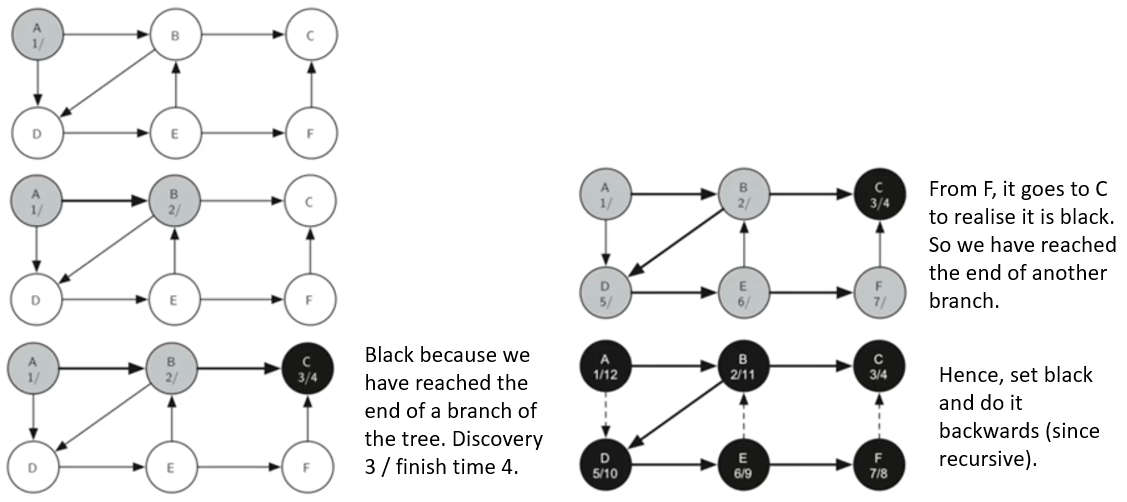

These starting and finishing times for each node displays a property called the **parenthesis property**, which means that all the children of a particular node in the depth first tree have a later discovery time and an earlier finish time than their parent.

## Interesting Links

- [DFS & BFS](https://jeremykun.com/2013/01/22/depth-and-breadth-first-search/)
- [Adjacency List](https://en.wikipedia.org/wiki/Adjacency_list)
- [Python Gotchas](https://developmentality.wordpress.com/2010/08/23/python-gotcha-default-arguments/)
- [Generators](https://wiki.python.org/moin/Generators)

## Implementation of a Graph Overview

For this, we want to implement a **simple graph** by focusing on the Node class. Tje graph will be directed and the edges can hold weights.

We will have 3 classes: a State class, a Node class, and finally the Graph class. We do this because sometimes an interview want you to fill out some code based off a node instead of an edge. We will also use [OrderedDict](https://docs.python.org/2/library/collections.html#collections.OrderedDict) and [Enum](https://docs.python.org/3/library/enum.html).

**OrderedDict**: *Return an instance of a dict subclass, supporting the usual dict methods. An OrderedDict is a dict that remembers the order that keys were first inserted. If a new entry overwrites an existing entry, the original insertion position is left unchanged. Deleting an entry and reinserting it will move it to the end.*

**Enum**: *Is a dictionary but in a Class form.*

In [53]:
from enum import Enum

class State(Enum):
    unvisited = 1 # white
    visited = 2 # black
    visiting = 3 # grey
    
# we use OrderedDict to keep track of the order the keys are added to the dict
from collections import OrderedDict

class Node:
    def __init__(self,num):
        self.num = num
        self.visit_state = State.unvisited
        self.adjacent = OrderedDict() # key = node, val = weight
    def __str__(self):
        return str(self.num) # returns its number
    
# finally the Graph
class Graph:
    def __init__(self):
        self.nodes = OrderedDict() # key = node id, val = node
    def add_node(self,num):
        node = Node(num)
        self.nodes[num] = node
        return node
    def add_edge(self, source, dest, weight=0):
        if source not in self.nodes:
            self.add_node(source)
        if dest not in self.nodes:
            self.add_node(dest)
        self.nodes[source].adjacent[self.nodes[dest]] = weight

In [68]:
g = Graph()
g.add_node(2)
g.add_edge(0,1,5)
g.add_edge(0,2,3)
g.nodes, g.nodes[0].visit_state

(OrderedDict([(2, <__main__.Node at 0x1effb660f60>),
              (0, <__main__.Node at 0x1effb660ef0>),
              (1, <__main__.Node at 0x1effb660e48>)]),
 <State.unvisited: 1>)

## Implementation of DFS

This algorithm we will be discussing is Depth-First search which as the name hints at, explores possible vertices (from a supplied root) down each branch before backtracking. This property allows the algorithm to be implemented succinctly in both iterative and recursive forms. Below is a listing of the actions performed upon each visit to a node.

- Mark the current vertex as being visited.
- Explore each adjacent vertex that is not included in the visited set.

We will assume a simplified version of a graph in the following form:

In [80]:
graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

### Connected Component

The first implementation below uses the stack data-structure to build-up and return a set of vertices that are accessible within the subjects connected component. Using Python’s overloading of the subtraction operator to remove items from a set, we are able to add only the unvisited adjacent vertices.

The second implementation provides the same functionality as the first, however, this time we are using the more succinct recursive form. Due to a common Python gotcha with default parameter values being created only once, we are required to create a new visited set on each user invocation. Another Python language detail is that function variables are passed by reference, resulting in the visited mutable set not having to reassign upon each recursive call.

In [95]:
def dfs1(graph, start):
    visited_set, visited_list, stack = set(), [], [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited_set:
            visited_set.add(vertex)
            visited_list.append(vertex)
            stack.extend(graph[vertex] - visited_set) # extend stack by the unvisited neighbours of current node
            print(visited_list, stack)
    return visited_list, visited_set # set is problematic, not ordered

print("for dfs1:", dfs1(graph, 'A'))

visited_list = []
def dfs2(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    visited_list.append(start)
    print(visited, visited_list)
    for nxt in graph[start] - visited:
        dfs2(graph, nxt, visited)
    print(visited, "###")
    return visited, visited_list

print("for dfs2:", dfs2(graph, 'A'))

['A'] ['B', 'C']
['A', 'C'] ['B', 'F']
['A', 'C', 'F'] ['B', 'E']
['A', 'C', 'F', 'E'] ['B', 'B']
['A', 'C', 'F', 'E', 'B'] ['B', 'D']
['A', 'C', 'F', 'E', 'B', 'D'] ['B']
for dfs1: (['A', 'C', 'F', 'E', 'B', 'D'], {'D', 'A', 'E', 'F', 'B', 'C'})
{'A'} ['A']
{'A', 'B'} ['A', 'B']
{'D', 'A', 'B'} ['A', 'B', 'D']
{'D', 'A', 'B'} ###
{'D', 'A', 'E', 'B'} ['A', 'B', 'D', 'E']
{'D', 'A', 'E', 'F', 'B'} ['A', 'B', 'D', 'E', 'F']
{'D', 'A', 'E', 'F', 'B', 'C'} ['A', 'B', 'D', 'E', 'F', 'C']
{'D', 'A', 'E', 'F', 'B', 'C'} ###
{'D', 'A', 'E', 'F', 'B', 'C'} ###
{'D', 'A', 'E', 'F', 'B', 'C'} ###
{'D', 'A', 'E', 'F', 'B', 'C'} ###
{'D', 'A', 'E', 'F', 'B', 'C'} ['A', 'B', 'D', 'E', 'F', 'C', 'C']
{'D', 'A', 'E', 'F', 'B', 'C'} ###
{'D', 'A', 'E', 'F', 'B', 'C'} ###
for dfs2: ({'D', 'A', 'E', 'F', 'B', 'C'}, ['A', 'B', 'D', 'E', 'F', 'C', 'C'])


### Paths

We are able to tweak both of the previous implementations to return all possible paths between a start and goal vertex. The implementation below uses the stack data-structure again to iteratively solve the problem, yielding each possible path when we locate the goal. Using a generator allows the user to only compute the desired amount of alternative paths.

In [75]:
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for nxt in graph[vertex] - set(path):
            if nxt == goal:
                yield path + [nxt]
            else:
                stack.append((nxt, path + [nxt]))

list(dfs_paths(graph, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

## Implementation of BFS

An alternative algorithm called Breath-First search provides us with the ability to return the same results as DFS but with the added guarantee to return the shortest-path first. This algorithm is a little more tricky to implement in a recursive manner instead using the queue data-structure, as such I will only being documenting the iterative approach. The actions performed per each explored vertex are the same as the depth-first implementation, however, replacing the stack with a queue will instead explore the breadth of a vertex depth before moving on. This behavior guarantees that the first path located is one of the shortest-paths present, based on number of edges being the cost factor.

Use the DFS Graph form.

### Connected Component

Similar to the iterative DFS implementation the only alteration required is to remove the next item from the beginning of the list structure instead of the stacks last.

In [99]:
def bfs(graph, start):
    visited, queue, visited_list = set(), [start], []
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            visited_list.append(vertex)
            print(visited_list)
            queue.extend(graph[vertex] - visited)
    return visited, visited_list

bfs(graph, 'A')

['A']
['A', 'B']
['A', 'B', 'C']
['A', 'B', 'C', 'D']
['A', 'B', 'C', 'D', 'E']
['A', 'B', 'C', 'D', 'E', 'F']


({'A', 'B', 'C', 'D', 'E', 'F'}, ['A', 'B', 'C', 'D', 'E', 'F'])

### Paths

This implementation can again be altered slightly to instead return all possible paths between two vertices, the first of which being one of the shortest such path.

Knowing that the shortest path will be returned first from the BFS path generator method we can create a useful method which simply returns the shortest path found or ‘None’ if no path exists. As we are using a generator this in theory should provide similar performance results as just breaking out and returning the first matching path in the BFS implementation.

In [101]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

print(list(bfs_paths(graph, 'A', 'F')))

def shortest_path(graph, start, goal):
    try:
        return next(bfs_paths(graph, start, goal))
    except StopIteration:
        return None

print(shortest_path(graph, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]
['A', 'C', 'F']


## Graph Interview 1: Implement a Graph Class

We already did 2: one with adjacency lists, and the other is adjacency lists using the Node class.

## Graph Interview 2: Implement a DFS Algorithm

As above.

## Graph Interview 3: Implement a BFS Algorithm

As above.

# Riddles & Brainteasers

They were famous in the past thanks to Google and Microsoft, who have now banned them as they had little to correlate with actual performance on the job. However, interviewers these days sometimes still like to ask them.

There are 3 types:
- Trick Questions
- Estimation Problems, e.g. estimate average time a person spends on Gmail?
- Maths Puzzles (the algorithmic kinds)

## Riddle 1: Bridge Crossing / Bridge and Torch

**Problem Statement**

A group of four travelers comes to a bridge at night. The bridge can hold the weight of at most only two of the travelers at a time, and it cannot be crossed without using a flashlight.

The travelers have one flashlight among them. Each traveler walks at a different speed: The first can cross the bridge in 1 minute, the second in 2 minutes, the third in 5 minutes, and the fourth takes 10 minutes to cross the bridge. If two travelers cross together, they walk at the speed of the slower traveler.

What is the least amount of time in which all the travelers can cross from one side of the bridge to the other?

**Solution**

This is part of a common group of [river crossing](https://en.wikipedia.org/wiki/River_crossing_puzzle) puzzles. Its know as the [Bridge and Torch problem](https://en.wikipedia.org/wiki/Bridge_and_torch_problem) (sometimes the times assigned to each person are different).

The solution to this version is:

    Move             | Time
    (1) & (2) cross  | 2 mins
    (1) return       | 1 min
    (5) & (10) cross | 10 min <<< the secret
    (2) return       | 2 min
    (1) & (2) cross  | 2 min
                     | 17 MINS
                     

## Riddle 2: Coins and a Scale

**Problem Statement**

You have eight coins and a two-pan scale. All the coins weigh the same, except for one which is heavier than all the others. The coins are otherwise indistinguishable. You may make no assumptions about how much heavier the heavy coin is. What is the minimum number of weighings needed to be certain of identifying the heavy coin?

**Solution**

Begin by dividing the coins into two groups of three, which you put on the scale, and one group of two, which you leave off. If the two sides weigh the same, the heavy coin is in the group of two, and you can find it with one more weighing, for a total of two weighings. On the other hand, if either side of the scale is heavier, the heavy coin must be in that group of three. You can eliminate all the other coins, and place one coin from this group on either side of the scale, leaving the third coin aside. If one side is heavier, it contains the heavy coin; if neither side is heavier, the heavy coin is the one you didn’t place on the scale. This is also a total of two weighings, so you can always find the heavy coin in a group of eight using two weighings.

The real key to this question is not to be limited by only splitting into 2 groups, but by 3.

## Riddle 3: Egg Drop

This is probably the most common brain teaser riddle out of the group, so really try to think algorithmically about this problem before looking at the solution!

**Problem Statement**

A tower has 100 floors. You've been given two eggs. The eggs are strong enough that they can be dropped from a particular floor in the tower without breaking. You've been tasked to find the highest floor an egg can be dropped without breaking, in as few drops as possible. If an egg is dropped from above its target floor it will break. If it is dropped from that floor or below, it will be intact and you can test drop the egg again on another floor.

Show algorithmically how you would go about doing this in as few drops as possible. (Your answer should be a number of the fewest drops needed for testing 2 eggs on 100 floors)

**Solution**

Start from the 10th floor and go up to floors in multiples of 10.

If first egg breaks, say at 20th floor then you can check all the floors between 11th and 19th with the second egg to see which floor it will not break.

In this case, the worst-case number of drops is 19. If the threshold was 99th floor, then you would have to drop the first egg 10 times and the second egg 9 times in linear fashion.

**Best solution**: We need to minimize this worst-case number of drops. For that, we need to generalize the problem to have n floors. What would be the step value, for the first egg? Would it still be 10? Suppose we have 200 floors. Would the step value be still 10?

The point to note here is that we are trying to minimize the worst-case number of drops which happens if the threshold is at the highest floors. So, our steps should be of some value which reduces the number of drops of the first egg.

Let's assume we take some step value m initially. If every subsequent step is m-1, then:

<p style="text-align: center;">m + m−1 + m−2 +.....+ 1 = n</p>    

This is

<p style="text-align: center;">$\frac{m ∗ (m+1)}{2}$ = n</p>

If n =100, then m would be 13.65 which since we can't drop from a decimal of a floor, we actually use 14. So, the worst case scenario is now when the threshold is in the first 14 floors with number of drops being 14.

Note that this is simply a binary search!

## Riddle 4: Hallway Lockers

**Problem Statement**

You are in a hallway lined with 100 lockers. You start with one pass and open the lockers, so that the opened lockers are now with their doors opened out. You begin by closing **every second** locker. Then you go to close **every third** locker and **close it if it is open or open it if it’s closed** — we will refer to this as "toggling" the lockers. You continue toggling every nth locker on pass number n. After your hundredth pass of the hallway, in which you toggle only locker number 100, how many lockers are open?

**Solution**

Obviously you can't just brute force and count out this problem, there are just too many passes, so we will need to think about this algorithmically.

Let's begin solving this problem by choosing an arbitrary locker and see if we can detect a pattern. Let's choose locker 12, it has been toggled open on your first pass.

To start off we know we won't have to toggle it on any pass greater than 12. So now we only have to think of the passes that occur on 2-11. We can actualy count these out:

- On pass 2: 2,4,6,8,10,12
- On pass 3: 3,6,9,12
- On pass 4: 4,8,12
- On pass 5: 5,10 **No toggle on this pass**
- On pass 6: 6,12
- On pass 7: 7,14 **No toggle on this pass**
- etc...

You'll notice the pattern that emerges, we only toggle the locker when the pass number is a factor of the locker number. We can begin to make the generalization that all lockers started open after the first pass and alternate between being open and closed. So lockers are closed after the second, fourth, sixth, and so on, times they are toggled — in other words, if a locker is toggled an even number of times, then it ends closed; otherwise, it ends open. You know that a locker is toggled once for every factor of the locker number, so you can say that a locker ends open only if it has an odd number of factors.

**The task has now been reduced to finding how many numbers between 1 and 100 have an odd number of factors!**

We can think about this in the following manner:

If a number **i** is a factor of **n**, what does that mean? It means that i times some other number j is equal to n. Because multiplication is commutative (i × j = j × i), that means that j is a factor of n, too, so the number of factors is usually even because factors tend to come in pairs. If you can find the numbers that have unpaired factors, you will know which lockers will be open. **Multiplication is a binary operation**, so two numbers will always be involved, but what if they are both the same number (that is, i = j)? In that case, a single number would effectively form both halves of the pair, and there would be an odd number of factors. When this is the case, i × i = n. Therefore, n must be a perfect square. Try a perfect square to check this solution. For example, for 16, the factors are 1, 2, 4, 8, 16; operations are open, close, open, close, open — as expected, it ends open.

Based on this reasoning, you can conclude that only lockers with numbers that are perfect squares end up open. The perfect squares between 1 and 100 (inclusive) are 1, 4, 9, 16, 25, 36, 49, 64, 81, and 100. So 10 lockers would remain open.

**Summary**: All numbers have an even number of factors, including 1. The only exceptions are perfect squares because they multiply themselves.

## Riddle 5: Jugs of Water

**Problem Statement**

You have a five gallons jug and a three gallons jug, and an unlimited supply of water (but no measuring cups) How would you come up with exactly four gallons of water?

**Solution**

This problem has a cameo in the movie Die Hard 3. The solution is below:

In [102]:
from IPython.display import Image
Image(url='http://mindyourdecisions.com/blog/wp-content/uploads/2013/02/water-jug-riddle-1.png')

## Riddle 6: Light Switches

**Problem Statement**

You are in a hallway next to three light switches, all of which are off. Each switch activates a different incandescent light bulb in the room at the end of the hall. You cannot see the lights from where the switches are. Your task is to determine which light corresponds to each switch. However, you may go into the room with the lights only once.

**Note: This is a "trick" question, so don't spend too much time on it. Although it is more on the "fun" side of brain teaser type questions.**

**Solution**

This is a bit of a trick question and hopefully you don't get asked this type of question in an interview, since its not really math or logic based. The solution is to realize that you can leave an incandescent light bulb on for awhile until it heats up.

So the solution is to turn on switch 1 and wait for 15 minutes until that corrresponding bulb is hot. Then turn it off and turn on switch 2 then head to the room. Then you know that:

- The bulb which is hot corresponds to switch 1
- The bulb which is on corresponds to switch 2
- The bulb which is off corresponds to switch 3

## Riddle 7: Ropes Burning

**Problem Statement**

You have two ropes. Each takes exactly 60 minutes to burn.

They are made of different material so even though they take the same amount of time to burn, they burn at separate rates. In addition, each rope burns inconsistently.

How do you measure out exactly 45 minutes?

**Solution**

- Take one rope and burn it at both ends. (measures 30 mins)
- At the same time, burn one end of the other rope.
- When the first rope finishes burning, light the other end of the remaining rope. (should have half left - so if burn at both ends should be 15 mins)
- When it burns out, that's 45 minutes.

# Non-Technical Questions

    Tell me about yourself?
    How did you hear about the position?
    What do you know about the company?
    What are your greatest professional strengths?
    What do you consider to be your weaknesses?
    What is your greatest professional achievement?
    Tell me about a challenge or conflict you've faced at work, and how you dealt with it.
    What other companies are you interviewing with?
    What are you looking for in a new position?
    What type of work environment do you prefer?
    What's your management style?
    What's a time you exercised leadership?
    What's a time you disagreed with a decision that was made at work?
    How would your boss and co-workers describe you?
    What do you want to do here?
    What is your favorite programming language?
    What is your work style?
    What can you tell me about your experience?
    What are your career goals?
    Why are you looking to change jobs?
    What salary are you expecting?
    What is your salary history?
    Why should we hire you?
    Why do you want to work for this company?
    If you could do anything, what would be your ideal job?
    Can you describe an environment or scenario where you would not thrive instantly?
    Apart from your technical expertise, why should we hire you?
    How do you keep yourself updated with the latest technologies and programming languages?
    When you can’t figure out how to solve a problem with your code, who do you turn to?
    What was the most difficult conflict you ever experienced with another colleague? How did you handle it?
    Are you currently working on any passion projects? What are you most proud of in these projects?
    What’s an example of a time you helped a non-technical person with a technical problem, and how did you explain it to them?
    Have you worked with QA (quality assurance) before? What were your feelings about it and how would you improve the process?
    Have you ever worked in a customer support or client facing role?
    What are your hobbies?
    What do you like about your current work environment, and what do you not like about it?
    
## After-Interview Questions

    What does a typical day look like?
    What are the biggest challenges someone in this position would face? How should I prepare for it?
    How will I be trained? How will my performance be reviewed?
    What are the performance expectations of this position over the first 12 months?
    What are the most immediate projects that need to be addressed?
    What types of skills is the team missing that you're looking to fill with a new hire?
    Is there anything that concerns you about my background being a fit for this role?
    Turnover, culture, growth opportunities.
    What is your favourite part about working here?
    What did you do before? Why did you come here?

# Company Interviews

## E-Commerce Company

2 eggs, 100 floors.

### Q1

**Problem**

You've been given a list of historical stock prices for a single day for Amazon stock. The index of the list represents the timestamp, so the element at index of 0 is the initial price of the stock, the element at index 1 is the next recorded price of the stock for that day, etc. Your task is to write a function that will return the maximum profit possible from the purchase and sale of a single share of Amazon stock on that day. Keep in mind to try to make this as efficient as possible.

For example, if you were given the list of stock prices:

    prices = [12,11,15,3,10]

Then your function would return the maximum possible profit, which would be 7 (buying at 3 and selling at 10).

**Solution**

Let's think about a few things before we start coding. One thing to think about right off the bat is that we can't just find the maximum price and the lowest price and then subtract the two, because the max could come before the min.

The brute force method would be to try every possible pair of price combinations, but this would be O(N^2), pretty bad. Also since this is an interview setting you should probably already know that there is a smarter solution.

In this case we will use a [greedy algorithm](https://en.wikipedia.org/wiki/Greedy_algorithm) approach. We will iterate through the list of stock prices while keeping track of our maximum profit.

That means for every price we will keep track of the lowest price so far and then check if we can get a better profit than our current max.

In [106]:
def profit(stock_prices):
    
    # Start minimum price marker at first price
    min_stock_price = stock_prices[0]
    
    # Start off with a profit of zero
    max_profit = 0
    
    for price in stock_prices:
        
        # Check to set the lowest stock price so far
        min_stock_price = min(min_stock_price,price)
        
        # Check the current price against our minimum for a profit comparison against the max_profit
        comparison_profit = price - min_stock_price
        
        # Compare against our max_profit so far
        max_profit = max(max_profit,comparison_profit)
        
        print(price,min_stock_price,comparison_profit,max_profit)
        
    return max_profit

profit([10,12,14,12,13,11,8,7,6,13,23,45,11,10])

10 10 0 0
12 10 2 2
14 10 4 4
12 10 2 4
13 10 3 4
11 10 1 4
8 8 0 4
7 7 0 4
6 6 0 4
13 6 7 7
23 6 17 17
45 6 39 39
11 6 5 39
10 6 4 39


39

Currently we're finding the max profit in one pass O(n) and in constant space O(1). However, we still aren't thinking about any edge cases. For example, we need to address the following scenarios:

- Stock price always goes down
- If there's less than two stock prices in the list.

We can take care of the first scenario by returning a negative profit if the price decreases all day (that way we can know how much we lost). And the second issue can be solved with a quick len() check. Let's see the full solution:

In [110]:
def profit2(stock_prices):
    
    # Check length
    if len(stock_prices) < 2:
        raise Exception('Need at least two stock prices!')
    
    # Start minimum price marker at first price
    min_stock_price = stock_prices[0]
    
    # Start off with an initial max profit
    max_profit = stock_prices[1] - stock_prices[0]
    
    # Skip first index of 0
    for price in stock_prices[1:]:

        # NOTE THE REORDERING HERE DUE TO THE NEGATIVE PROFIT TRACKING
        
        # Check the current price against our minimum for a profit comparison against the max_profit
        comparison_profit = price - min_stock_price
        
        # Compare against our max_profit so far
        max_profit = max(max_profit,comparison_profit)
        
        # Check to set the lowest stock price so far
        min_stock_price = min(min_stock_price,price)
        
    return max_profit

In [111]:
profit2([10,12,14,12,13,11,8,7,6,13,23,45,11,10]), profit2([30,22,21,5])

(39, -1)

### Q2

**Problem**

Given a list of integers, write a function that will return a list, in which for each index the element will be the product of all the integers except for the element at that index

For example, an input of [1,2,3,4] would return [24,12,8,6] by performing [2×3×4,1×3×4,1×2×4,1×2×3]

**Requirements**

**You can not use division in your answer! Meaning you can't simply multiply all the numbers and then divide by eahc element for each index!**

**Solution**

If you look at the list above with the multiplication you'll notice we are repeating multiplications, such as 2 times 3 or 3 times 4 for multiple entries in the new list.

We'll want to take a greedy approach and keep track of these results for later re-use at other indices. We'll also need to think about what if a number is zero!

In order to find the products of all the integers (except for the integer at that index) we will actually go through our list twice in a greedy fashion.

On the first pass we will get the products of all the integers **before** each index, and then on the second pass we will go **backwards** to get the products of all the integers after each index.

Then we just need to multiply all the products before and after each index in order to get the final product answer! It uses O(n) time and O(n) space complexity.

In [127]:
def index_prod(lst):
    
    # Create an empty output list
    output = [None] * len(lst)
    product = 1 # Set initial product and index for greedy run forward
    i = 0
    
    while i < len(lst):
        output[i] = product # Set index as cumulative product
        product *= lst[i] # Cumulative product
        i +=1 # Move forward
        print(output)
        
    # Now for our Greedy run Backwards
    product = 1
    i = len(lst) - 1 # Start index at last (taking into account index 0)
    
    # Until the beginning of the list
    while i >=0:
        # Same operations as before, just backwards
        output[i] *= product
        product *= lst[i]
        i -= 1
        print(output)
        
    return output

In [128]:
index_prod([1,2,3,4]), index_prod([0,1,2,3,4])

[1, None, None, None]
[1, 1, None, None]
[1, 1, 2, None]
[1, 1, 2, 6]
[1, 1, 2, 6]
[1, 1, 8, 6]
[1, 12, 8, 6]
[24, 12, 8, 6]
[1, None, None, None, None]
[1, 0, None, None, None]
[1, 0, 0, None, None]
[1, 0, 0, 0, None]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[1, 0, 0, 0, 0]
[24, 0, 0, 0, 0]


([24, 12, 8, 6], [24, 0, 0, 0, 0])

### Q3

**Problem**

Given two rectangles, determine if they overlap. The rectangles are defined as a Dictionary. If the rectangles do overlap, return the dictionary which describes the overlapping section.


**Solution**

This is a problem where it helps a lot to draw out your thinking. There are a few things we will need to think about:

- How can we determine an intersection?
- What if a rectangle is fully inside another rectangle?
- What if there is no intersection, but the rectangles share an edge?

The key to solving this problem is to break it up in to sub-problems. We can split up the problem into an x-axis problem and a y-axis problem.

We will create a function that can detect overlap in 1 dimension. Then we will split the rectangles into x and width, and y and height components. We can then determine that if there is overlap on both dimensions, then the rectangles themselves intersect!

In order to understand the **calc_overlap** function, draw out two flat lines and follow along with the function and notice how it detects an overlap!

Let's begin by creating a general function to detect overlap in a single dimension:


In [135]:
# Rectangle Sample
r1 = {  # x and y coordinates of the bottom-left corner of the rectangle
        'x': 2 , 'y': 4,
         
        # Width and Height of rectangle
        'w':5,'h':12}

# To detect overlap in a single dimension
def calc_overlap(coor1,dim1,coor2,dim2):
    """
    Takes in 2 coordinates and their length in that dimension
    """
    
    # Find greater of the two coordinates
    # (this is either the point to the most right
    #  or the higher point, depending on the dimension)
    
    # The greater point would be the start of the overlap
    greater = max(coor1,coor2)
    
    # The lower point is the end of the overlap
    lower = min(coor1+dim1,coor2+dim2)
    
    # Return a tuple of Nones if there is no overlap
    if greater >= lower:
        return (None,None)
    
    # Otherwise, get the overlap length
    overlap = lower-greater
    return (greater,overlap)

# To actually detect if overlap. Our solution is O(1) for both time and space!
def calc_rect_overlap(r1,r2):
    
    x_overlap, w_overlap = calc_overlap(r1['x'],r1['w'],r2['x'],r2['w'])
    y_overlap, h_overlap = calc_overlap(r1['y'],r1['h'],r2['y'],r2['h'])
    
    # If either returned None tuples, then there is no overlap!
    if not w_overlap or not h_overlap:
        print('There was no overlap!')
        return None
    
    # Otherwise return the dictionary format of the overlapping rectangle
    return { 'x':x_overlap,'y': y_overlap,'w':w_overlap,'h':h_overlap}

In [136]:
r1 = {'x': 2 , 'y': 4,'w':5,'h':12}
r2 = {'x': 1 , 'y': 5,'w':7,'h':14}
calc_rect_overlap(r1,r2)

{'x': 2, 'y': 5, 'w': 5, 'h': 11}

## Search Engine Company

Write a function that computes the Nth fibonacci number. Use any method below, but see this performance time chart.

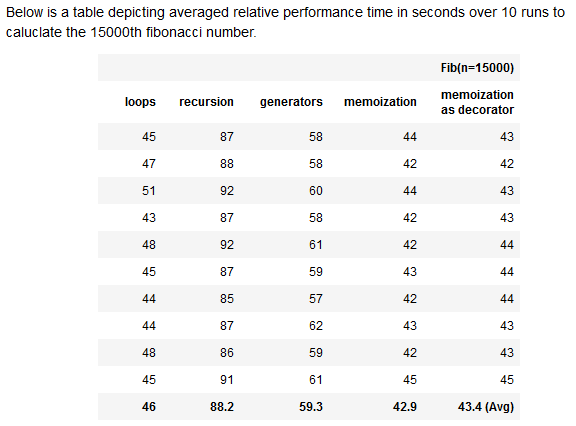

In [177]:
## Example 1: Using looping technique
def fib(n):
    
    a,b = 1,1
    for i in range(n-1):
        a,b = b,a+b
    return a

print(fib(7))
    
# Using recursion    
def fibR(n):
    if n==1 or n==2:
        return 1
    return fib(n-1)+fib(n-2)

print(fibR(7))
 
## Example 3: Using generators
a,b = 0,1
def fibI():
    global a,b
    while True:
        a,b = b, a+b
        yield a
f=fibI()
f.__next__()
f.__next__()
f.__next__()
f.__next__()
f.__next__()
f.__next__()
print(f.__next__())

 
## Example 4: Using memoization
def memoize(fn, arg):
    memo = {}
    if arg not in memo:
        memo[arg] = fn(arg)
    return memo[arg]
 
## fib() as written in example 1.
fibm = memoize(fib,7)
print(fibm)
 
## Example 5: Using memoization as decorator
class Memoize:
    def __init__(self, fn):
        self.fn = fn
        self.memo = {}
    def __call__(self, arg):
        if arg not in self.memo:
            self.memo[arg] = self.fn(arg)
            return self.memo[arg]
 
@Memoize
def fib(n):
    a,b = 1,1
    for i in range(n-1):
        a,b = b,a+b
    return a
print(fib(7))

13
13
13
13
13


### Q1

**Question**

Given a dice which rolls 1 to 7 (with uniform probability), simulate a 5 sided dice. Preferably, write your solution as a function. 

**SOLUTION**

This is a new problem we haven't seen directly before! Many times this question is asked in the form of functions e.g. your given a function random_7() and you have to take it as an input and create random_5()

The key to solving this problem is to make sure you focus on the requirement that the final distribution of the rolls be uniform, also you were not given any requirements on Time and Space, so the solution is actually very simple, just keep re-rolling if you get a number greater than 5!

In [152]:
from random import randint
 
def dice7():
    return randint(1, 7)
 
# Our Solution
def convert7to5():
    
    # Starting roll (just needs to be larger than 5)
    roll = 7
    
    while roll > 5: # hence we will never return 6 or 7.
        roll = dice7()
        print('dice7() produced a roll of ',roll)
    print(' Your final returned roll is below:')
    return roll

convert7to5()

dice7() produced a roll of  7
dice7() produced a roll of  2
 Your final returned roll is below:


2

### Q2

**Question**

Given a dice which rolls from 1 to 5, simulate a uniform 7 sided dice! 

**SOLUTION**

Because the 5 sided dice can not produce 7 possible outcomes on a single roll, we immediately know that we need to roll the dice at least twice.

If we roll the dice twice we have 25 possible combinations of the results of the two rolls. While 25 is not divisible by 7, 21 is. This means we can implement our previous strategy of throwing out rolls not in our intended range.

It's also important to note that we can't expand the solution to implement more rolls in order to not throw any out, because 5 and 7 are both prime which means that no exponent of 5 will be divisible by 7 no matter how high you go.

We will define our range as a section of the 25 possible combinations of rolls. A good way to do this is by converting the two rolls into a unique outcome number in the range 1 through 25.

We will create this number by taking the rolls, then we take the first roll and after subtracting 1 from it we multiply it by 5. Now the first roll corresponds with a value of 0, 5, 10, 15 and 20.

Then we take the second roll and add it to the result of the first manipulation. Giving us a range of 1-25.

So our final solution is to roll the dice twice. Check the manipulated range from 1 to 25, if its greater than 21, do a reroll.

In [155]:
from random import randint
 
def dice5():
    return randint(1, 5)

def convert5to7():
    while True: # For constant re-roll purposes

        # Roll the dice twice
        roll_1 = dice5()
        roll_2 = dice5()
        print('The rolls were {} and {}'.format(roll_1,roll_2))

        # Convert the combination to the range 1 to 25
        num = ( (roll_1-1) * 5 ) +  ( roll_2 ) 
        print('The converted range number was:',num)
        if num > 21:
            continue # re-roll if we are out of range

        return num %7 + 1   

convert5to7()

The rolls were 3 and 3
The converted range number was: 13


7

### Q3

Given a string, write a function that uses recursion to reverse it. 

**SOLUTION**

Hopefully you remember this problem, you've already seen it! The solution is:

In [156]:
def reverse(s):
    
    # Base Case
    if len(s) <= 1:
        return s

    # Recursion
    return reverse(s[1:]) + s[0]

### Q4

Find the squareroot of a given number rounded down to the nearest integer, without using the sqrt function. For example, squareroot of a number between [9, 15] should return 3, and [16, 24] should be 4.

**Solution**

The squareroot of a (non-negative) number N always lies between 0 and N/2. The straightforward way to solve this problem would be to check every number k between 0 and N/2, until the square of k becomes greater than or equal to N. If k^2 becomes equal to N, then we return k. Otherwise, we return k-1 because we're rounding down. Here's the code:

In [158]:
def solution(num): 
    if num<0: 
        raise ValueError 
    if num==1: 
        return 1 
    for k in range(1+(num//2)): 
        if k**2==num: 
            return k 
        elif k**2>num: 
            return k-1 
    return k  

print(solution(14),solution(15),solution(16))

3 3 4


The complexity of this approach is O(N), because we have to check N/2 numbers in the worst case. This linear algorithm is pretty inefficient, we can use some sort of binary search to speed it up. We know that the result is between 0 and N/2, so we can first try N/4 to see whether its square is less than, greater than, or equal to N. If it’s equal then we simply return that value. If it’s less, then we continue our search between N/4 and N/2. Otherwise if it’s greater, then we search between 0 and N/4. In both cases we reduce the potential range by half and continue, this is the logic of binary search. We’re not performing regular binary search though, it’s modified. We want to ensure that we stop at a number k, where k^2<=N but (k+1)^2>N. For example:

In [174]:
def better_solution(num): 
    if num<0: 
        raise ValueError 
    if num==1: 
        return 1 
    low=0 
    high=(num//2)+1 
    
    while low+1<high: 
        mid=low+(high-low)//2 
        square=mid**2 
        print("results: ",low,mid,high,square)
        if square==num: 
            return mid 
        elif square<num: 
            low=mid # to take the higher range
        else: 
            high=mid # to take the lower range
            
    return low

print(better_solution(14))
print(better_solution(15))
print(better_solution(16))

results:  0 4 8 16
results:  0 2 4 4
results:  2 3 4 9
3
results:  0 4 8 16
results:  0 2 4 4
results:  2 3 4 9
3
results:  0 4 9 16
4


One difference from regular binary search is the condition of the while loop, it’s low+1<high instead of low<high. Also we have low=mid instead of low=mid+1, and high=mid instead of high=mid-1. These are the modifications we make to standard binary search. The complexity is still the same though, it’s logarithmic O(logN). Which is much better than the naive linear solution.

There’s also a constant time O(1) solution which involves a clever math trick. Here it is:

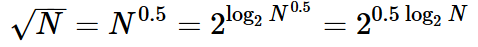

This solution exploits the property that if we take the exponent of the log of a number, the result doesn’t change, it’s still the number itself. So we can first calculate the log of a number, multiply with 0.5, take the exponent, and finally take the floor of that value to round it down. This way we can avoid using the sqrt function by using the log function. Logarithm of a number rounded down to the nearest integer can be calculated in constant time, by looking at the position of the leftmost 1 in the binary representation of the number. For example, the number 6 in binary is 110, and the leftmost 1 is at position 2 (starting from right counting from 0). So the logarithm of 6 rounded down is 2. This solution doesn’t always give the same result as above algorithms though, because of the rounding effects. And depending on the interviewer’s perspective this approach can be regarded as either very elegant and clever, or tricky and invalid. Either way, you should let your interviewer know that you are capable of the shortcut!

## Ride Sharing Company

If you were given a list of n integers and knew that they were sorted, how quickly could you check if a given integer was in the list? Elaborate on your reasoning and search methods in general
Requirements

**Solution**

Hopefully this problem sounds familiar! We can use a binary search to search for an intger since the list is already sorted! This means we can find the item in O(logn) time and O(1) space!

### Q1

Given a list of integers, find the largest product you could make from 3 integers in the list. Assume list always has at least 3 integers.

**Solution**

We can solve this problem in O(n) time with O(1) space, we should also be able to take into account negative numbers, so that a list like: [-5,-5,1,3] returns (-5)(-5)(3) = 75 as its answer.

Hopefully you've begun to realize the similarity between this problem and the Amazon stock problem from the E-Commerce Company mock interview questions! You could brute force this problem by just simply trying every single combination of three digits, but this would require O(n^3) time!

How about we use a greedy approach and keep track of some numbers. In the stock problem we kept track of max profit so far, in this problem we are actually going to keep track of several numbers:

- The highest product of 3 numbers so far
- The highest product of 2 numbers so far
- The highest number so far

Since we want to keep negative numbers in account, we will also keep track of the lowest product of two and the lowest number:

- The lowest product of 2
- The lowest number

Once we iterate through the list and reach the end we will have the highest posiible product with 3 numbers. At each iteration we will take the current highest product of 3 and compare it to the current integer multiplied by the highest and lowest products of 2.

**My Comments**: Why do we keep the highest/lowest prod2 and the single high/low? Because to calculate high_prod3, it is made up of prod2 * num, and prod2 is in turn made up of high/low * num. And btw, the lowest product is needed in case the num is negative which can flip the whole thing around.

In [186]:
def solution(lst):
    
    # Start at index 2 (3rd element) and assign highest and lowest 
    # based off of first two elements
    high = max(lst[0],lst[1]) # Highest Number so far
    low = min(lst[0],lst[1]) # Lowest number so far
    
    # Initialise Highest and lowest products of two numbers
    high_prod2 = lst[0]*lst[1]
    low_prod2 = lst[0]*lst[1]
    
    # Initialise highest product of 3 numbers
    high_prod3 = lst[0]*lst[1]*lst[2]
    
    print("start: ",high_prod3, high_prod2, low_prod2, high, low)
    # Iterate through list
    for num in lst[2:]:
        
        # Compare possible highest product of 3 numbers
        high_prod3 = max(high_prod3,num*high_prod2,num*low_prod2)
        print("high_prod3: ", num, high_prod3,num*high_prod2,num*low_prod2)
        # Check for possible new highest products of 2 numbers
        high_prod2 = max(high_prod2,num*high,num*low)
        print("high_prod2: ", num, high_prod2,num*high,num*low)
        # Check for possible new lowest products of 2 numbers
        low_prod2 = min(low_prod2,num*high,num*low)
        print("low_prod2", num, low_prod2,num*high,num*low)
        # Check for new possible high
        high = max(high,num)
        print("high: ", num, high, num)
        # Check for new possible low
        low = min(low,num)
        print("low: ", num, low, num)
        print("END: ", high_prod3, high_prod2, low_prod2, high, low, "\n")
        
    return high_prod3

l = [99,-82,82,40,75,-24,39, -82, 5, 30, -25, -94, 93, -23, 48, 50, 49,-81,41,63]
solution(l)

start:  -665676 -8118 -8118 99 -82
high_prod3:  82 -665676 -665676 -665676
high_prod2:  82 8118 8118 -6724
low_prod2 82 -8118 8118 -6724
high:  82 99 82
low:  82 -82 82
END:  -665676 8118 -8118 99 -82 

high_prod3:  40 324720 324720 -324720
high_prod2:  40 8118 3960 -3280
low_prod2 40 -8118 3960 -3280
high:  40 99 40
low:  40 -82 40
END:  324720 8118 -8118 99 -82 

high_prod3:  75 608850 608850 -608850
high_prod2:  75 8118 7425 -6150
low_prod2 75 -8118 7425 -6150
high:  75 99 75
low:  75 -82 75
END:  608850 8118 -8118 99 -82 

high_prod3:  -24 608850 -194832 194832
high_prod2:  -24 8118 -2376 1968
low_prod2 -24 -8118 -2376 1968
high:  -24 99 -24
low:  -24 -82 -24
END:  608850 8118 -8118 99 -82 

high_prod3:  39 608850 316602 -316602
high_prod2:  39 8118 3861 -3198
low_prod2 39 -8118 3861 -3198
high:  39 99 39
low:  39 -82 39
END:  608850 8118 -8118 99 -82 

high_prod3:  -82 665676 -665676 665676
high_prod2:  -82 8118 -8118 6724
low_prod2 -82 -8118 -8118 6724
high:  -82 99 -82
low:  -82

763092

### Q2

Write a function that given a target amount of money and a list of possible coin denominations, returns the number of ways to make change for the target amount using the coin denominations

**Solution**

This is a classic interview problem, so classic that you've already seen a very similar problem in the recursion section! Make sure to review that problem first before reading our solution here!

In this solution we will use a bottom-up algorithm.

- As we iterate through each coin, we are adding the ways of making arr[i - coin] to arr[i]
- If we have 2 ways of making 4, and are now iterating on a coin of value 3, there should be 2 ways of making 7.
- We are essentially adding the coin we are iterating on to the number of ways of making arr[i].

This solution results in O((m)(n)) with m being the number of coins, where we iterate about n operations. This is O(n) space.

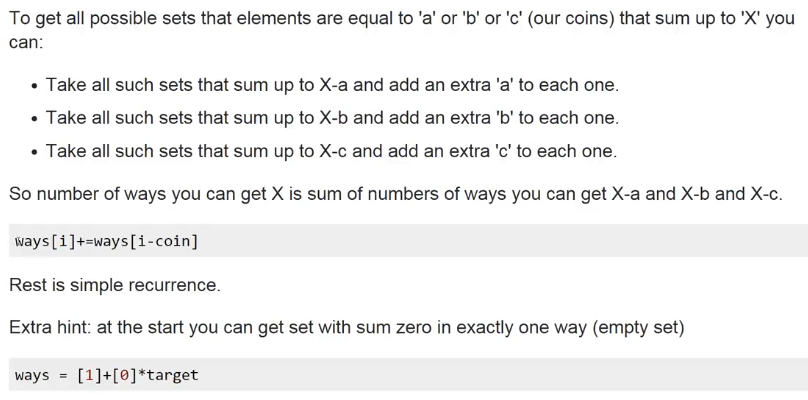

In [199]:
def solution(n, coins):
    
    # Set up our array for tracking results
    arr = [1] + [0] * n
    jth = 0 # my tracker
    for coin in coins: # 1 2 3
        for i in range(coin, n + 1): # 1 2 3 ... 97 98 99 100
            arr[i] += arr[i - coin]
            jth += 1
            print(jth, arr)
    if n == 0:
        return 0
    else:
        return arr[n]
    
solution(100, [1, 2, 3])

1 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
3 [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4 [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

884

Don't understand? Let me try to help. Let's look at ways[7]. From the equation and with c = [1,2,3], then:

w[7]:
- Learning # ways that w[6] uses only 1.
- Learning # ways that w[5] uses only 1 and 2.
- Learning # ways that w[4] uses only 1 and 2 and 3.

Because each respective row means that it only needed to add a 1, or a 2, or a 3 respectively to every single combination inside to reach 7.

Similarly, if I want to find w[100], I will need to know:
- The # of ways w[99] uses only 1.
- The # of ways w[98] uses only 1 and 2.
- The # of ways w[97] uses only 1 and 2 and 3.

If the coins were c = [1,5,10], it will still be similar. To find w[100]:
- The # of ways w[99] uses only 1.
- The # of ways w[95] uses only 1 and 5.
- The # of ways w[90] uses only 1 and 5 and 10.

### Q3

Given a binary tree, check whether it’s a binary search tree or not.

**Solution**

The first solution that comes to mind is, at every node check whether its value is larger than or equal to its left child and smaller than or equal to its right child (assuming equals can appear at either left or right). However, this approach is [erroneous](https://stackoverflow.com/questions/53307389/check-if-a-binary-tree-is-a-binary-search-tree-why-doesnt-my-code-work) because it doesn’t check whether a node violates any condition with its grandparent or any of its ancestors.

So, we should keep track of the minimum and maximum values a node can take. And at each node we will check whether its value is between the min and max values it’s allowed to take. The root can take any value between negative infinity and positive infinity. At any node, its left child should be smaller than or equal than its own value, and similarly the right child should be larger than or equal to. So during recursion, we send the current value as the new max to our left child and send the min as it is without changing. And to the right child, we send the current value as the new min and send the max without changing.


In [188]:
class Node: 
    def __init__(self, val=None): 
        self.left, self.right, self.val = None, None, val   
        
INFINITY = float("infinity") 
NEG_INFINITY = float("-infinity")  

def isBST(tree, minVal=NEG_INFINITY, maxVal=INFINITY): 
    if tree is None:
        return True   
    if not minVal <= tree.val <= maxVal: 
        return False   
    
    return isBST(tree.left, minVal, tree.val) and isBST(tree.right, tree.val, maxVal)

There’s an equally good alternative solution. If a tree is a binary search tree, then traversing the tree inorder should lead to sorted order of the values in the tree. So, we can perform an inorder traversal and check whether the node values are sorted or not.

In [201]:
def isBST2(tree, lastNode=[NEG_INFINITY]): 
    
    if tree is None: 
        return True   
    
    if not isBST2(tree.left, lastNode):
        return False   
    
    if tree.val < lastNode[0]: 
        return False   
    
    lastNode[0]=tree.val   
    
    return isBST2(tree.right, lastNode)

## Social Network

### Q1

Remove duplicate characters in a given string keeping only the first occurrences. For example, if the input is ‘tree traversal’ the output will be ‘tre avsl’.

**Solution**

We need a data structure to keep track of the characters we have seen so far, which can perform efficient find operation. If the input is guaranteed to be in standard ASCII form, we can just create a boolean array of size 128 and perform lookups by accessing the index of the character’s ASCII value in constant time. But if the string is Unicode then we would need a much larger array of size more than 100K, which will be a waste since most of it would generally be unused.

Set data structure perfectly suits our purpose. It stores keys and provides constant time search for key existence. So, we’ll loop over the characters of the string, and at each iteration we’ll check whether we have seen the current character before by searching the set. If it’s in the set then it means we’ve seen it before, so we ignore it. Otherwise, we include it in the result and add it to the set to keep track for future reference. 

The time complexity of the algorithm is O(N) where N is the number of characters in the input string, because set supports O(1) insert and find. This is an optimal solution to one of the most common string interview questions.

In [202]:
def removeDuplicates(string): 
    result=[] 
    seen=set() 
    
    for char in string: 
        if char not in seen: 
            seen.add(char) 
            result.append(char)
            
    return ''.join(result) 

### Q2

Given a list of integers and a target number, write a function that returns a boolean indicating if its possible to sum two integers from the list to reach the target number.
 
You can not use an integer element twice. Optimize for time over space.

**Solution**

For this problem we will take advantage of a set data structure. We will make a single pass through the list of integers, treating each element as the first integer of our possible sum.

At each iteration we will check to see if there is a second integer which will allow us hit the target number, and we will use a set to check if we've already seen it in our list.

We will then update our seen set by adding the current number in the iteration to it.

In [204]:
def solution(lst,target):
    
    # Create set to keep track of duplicates
    seen = set()
    
    # We want to find if there is a num2 that sums with num to reach the target
    for num in lst:
        num2 = target - num
        if num2 in seen:
            return True
        seen.add(num)
        
    # If we never find a pair match which creates the sum
    return False

solution([1,3,5,1,7],4), solution([1,3,5,1,7],14)

(True, False)

### Q3

Given a list of account ID numbers (integers) which contains duplicates , find the one unique integer. (the list is guaranteed to only have one unique (non-duplicated) integer. Do not use built-in Python functions or methods
 
**Solution**

This should feel very familiar to one of the problems we did in the array section of the course! We can use an XOR operation. The **exclusive or** operations will take two sets of bits and for each pair it will return a 1 value if **one but not both** of the bits is 1.

In Python we can use the ^ symbol to perform an XOR.

Now for our solution we can simply XOR all the integers in the list. We start with a unique id set to 0, then every time we XOR a new id from the list, it will change the bits. When we XOR with the same ID again, it will cancel out the earlier change.

By the end, we wil be left with the ID that was unique and only appeared once!

In [226]:
def solution(id_list):
    
    # Initialise unique Id
    unique_id = 0
    
    # XOR for every id in id list
    for i in id_list:
        unique_id ^= i
#         print(unique_id)
    
    return unique_id

solution([1,2,3,4,5,4,3,2,1,2,3,6,7,8,5,6,8])
# solution assumes only double duplicates

6

In [224]:
print(1^2)
print(1^2^2)
print(1^2^3^2)
print(1^3^3^3^3^3^3^3^1^4)
print(3^4)

3
1
2
7
7


### Q4

Create a function that takes in a list of unsorted prices (integers) and a maximum possible price value, and return a sorted list of prices, i.e. you are given [3,7,4] and you know max is 7 - how to sort? Your function should be able to perform this in less than O(nlogn) time.

**Solution**

We can actually solve this problem by using a [counting sort](https://www.interviewcake.com/concept/java/counting-sort). Basically a counting sort works well when you know the range of integer values you will have ahead of time.

Read the wikipedia article linked above for a full break down, and an implementation is here below (using the prices situation described in the problem above).

In [227]:
def solution(unsorted_prices,max_price):
    
    # list of 0s at indices 0 to max_price
    prices_to_counts = [0]* (max_price+1)
    
    # populate prices
    for price in unsorted_prices:
        prices_to_counts[price] +=1
        
    # populate final sorted prices
    sorted_prices = []
    
    # For each price in prices_to_counts
    for price,count in enumerate(prices_to_counts):
        
        # for the number of times the element occurs
        for time in range(count):
            
            # add it to the sorted price list
            sorted_prices.append(price)
            
    return sorted_prices

solution([4,6,2,7,3,8,9],9)

[2, 3, 4, 6, 7, 8, 9]

Useful Facebook Hiring Links:
- https://steve-yegge.blogspot.com/2008/03/get-that-job-at-google.html